In [3]:
%load_ext autoreload
%autoreload 2
from data import *
from visualisation2 import *
import numpy as np
from image_processing import *

In [2]:
from visualisation import plot_timeframe
import numpy as np
from data import load_from_file, prepocess

import cv2

filename = "090342.npy"

data = load_from_file(filename)
# plot_timeframe(data)

img = data.to_numpy()

img = prepocess(img)
original_img = img.copy()

plot_numpy(img)



c:\Users\Wojtek\Documents\uczelnia\CV\moving-objects-DAS-system\visualisation2.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [3]:
# aspect_ratio = 12/16

# h,w = img.shape

# new_w = int(aspect_ratio * h)

# img = cv2.resize(img, (new_w, h), interpolation=cv2.INTER_NEAREST)
# plot_numpy(img)

In [4]:
# img2 = cv2.blur(img, (5,41))
# plot_numpy(img2)

In [5]:
# img =  frequency_lowpass(img, 0.25)
# plot_numpy(img)

In [6]:
img = cv2.fastNlMeansDenoising(img, templateWindowSize=10,searchWindowSize=31, h=20)
plot_numpy(img)


In [7]:
img = cv2.blur(img, (3,41))
plot_numpy(img)

In [8]:
# img = cv2.GaussianBlur(img, (3, 3), 0)
# plot_numpy(img)

In [9]:
img = cv2.morphologyEx(
            img, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_RECT, (3,9)), iterations=1
        )
plot_numpy(img)

In [10]:
tr, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# tr, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plot_numpy(img)


In [11]:
def proper_opening(image, kernel=(3,3), iterations=1):
    close1 = cv2.morphologyEx(
        image, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    
    open1 = cv2.morphologyEx(
        close1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    
    close2 = cv2.morphologyEx(
        open1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )

    return np.minimum(image, close2)

def proper_closing(image, kernel=(3,3), iterations = 1):
       
    open1 = cv2.morphologyEx(
        image, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    close1 = cv2.morphologyEx(
        open1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    open2 = cv2.morphologyEx(
        close1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )

    return np.maximum(image, open2)

def automedian_filter(image, kernel=(3,3), iterations = 1):
       
    open1 = cv2.morphologyEx(
        image, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    
    close1 = cv2.morphologyEx(
        open1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )

    open2 = cv2.morphologyEx(
        close1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    return np.maximum(open2, proper_opening(image, kernel, iterations))

# img = proper_opening(img, kernel=(7,7), iterations=1)
# img2 = img.copy()
# for i in range(3):
#     img2 = cv2.morphologyEx(
#             img2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)), iterations=1
#         )
#     img2 = cv2.morphologyEx(
#             img2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)), iterations=1
#        . )
# img2 = cv2.morphologyEx(
#             img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)), iterations=1
#         )
# img2 = automedian_filter(img, kernel=(5,5))
# (img2 != img).sum()
# plot_numpy(img)
img = cv2.morphologyEx(
            img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)), iterations=1
        )
plot_numpy(img)


In [12]:
img = cv2.resize(img, (w,h), interpolation=cv2.INTER_NEAREST)
plot_numpy(img)


NameError: name 'w' is not defined

In [ ]:
img.shape

(6250, 52)

In [ ]:
def generate_colors(num_colors):
    hsv_colors = [(i / num_colors, 1.0, 1.0) for i in range(num_colors)]
    rgb_colors = [plt.cm.hsv(h)[:3] for h, _, _ in hsv_colors]
    rgb_colors = (np.array(rgb_colors) * 255).astype(np.uint8)
    np.random.shuffle(rgb_colors)
    return rgb_colors

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

X = np.nonzero(img)
X = np.vstack(X).T

X.shape
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
clustering = DBSCAN(eps=0.08, min_samples=500).fit(X_scaled)

no_of_clusters = np.max(clustering.labels_)+1
print(no_of_clusters)


3


Number of clusters:  3


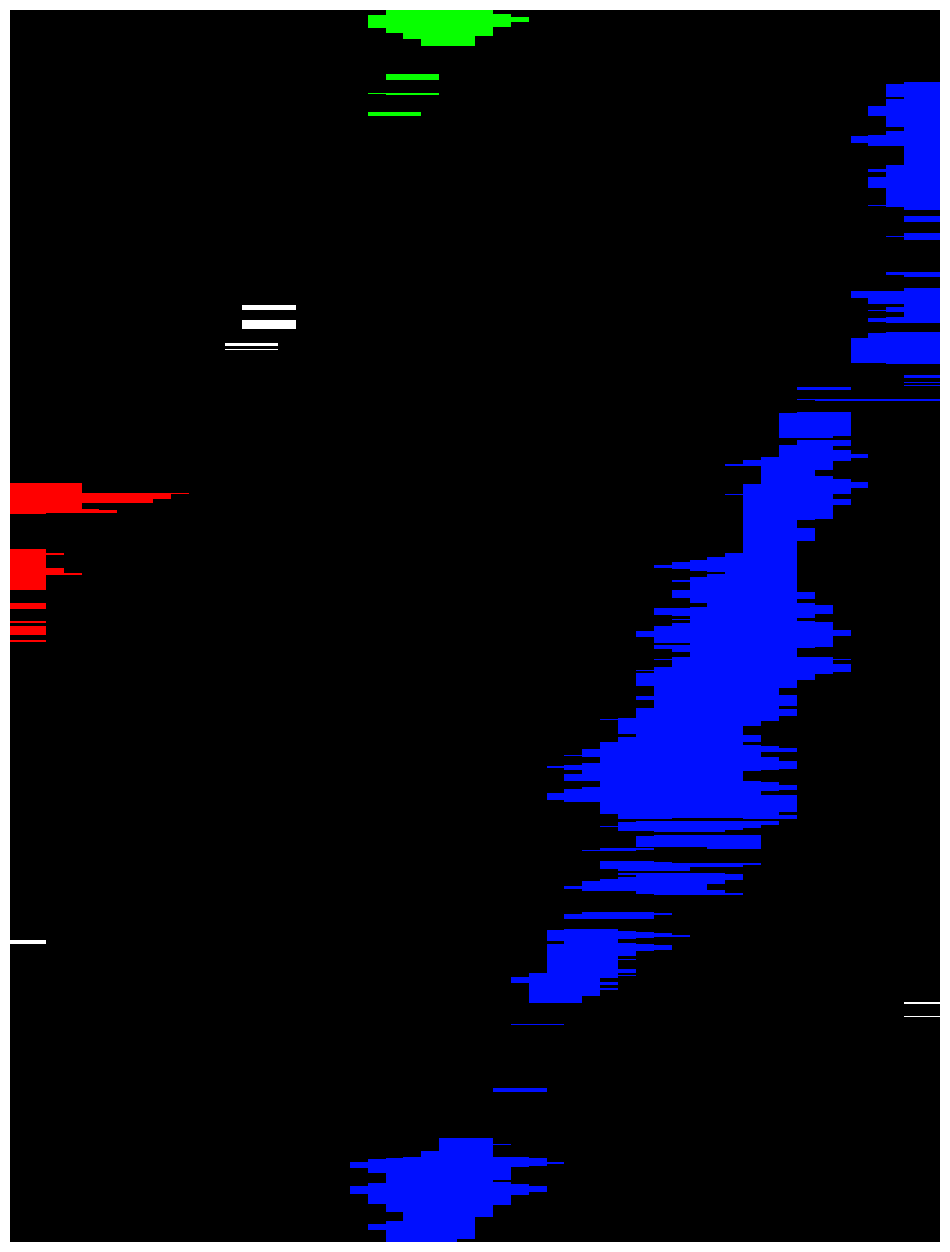

In [ ]:
colors = generate_colors(no_of_clusters) 
img_clusters = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

print("Number of clusters: ", no_of_clusters)
for cluster_id in range(no_of_clusters):
    idx = X[clustering.labels_ == cluster_id, :]
    # print(idx)
    # print(f"Cluster{cluster_id}: {np.sum(idx)} members")
    img_clusters[idx.T[0], idx.T[1],:] = colors[cluster_id]

plot_numpy(img_clusters)

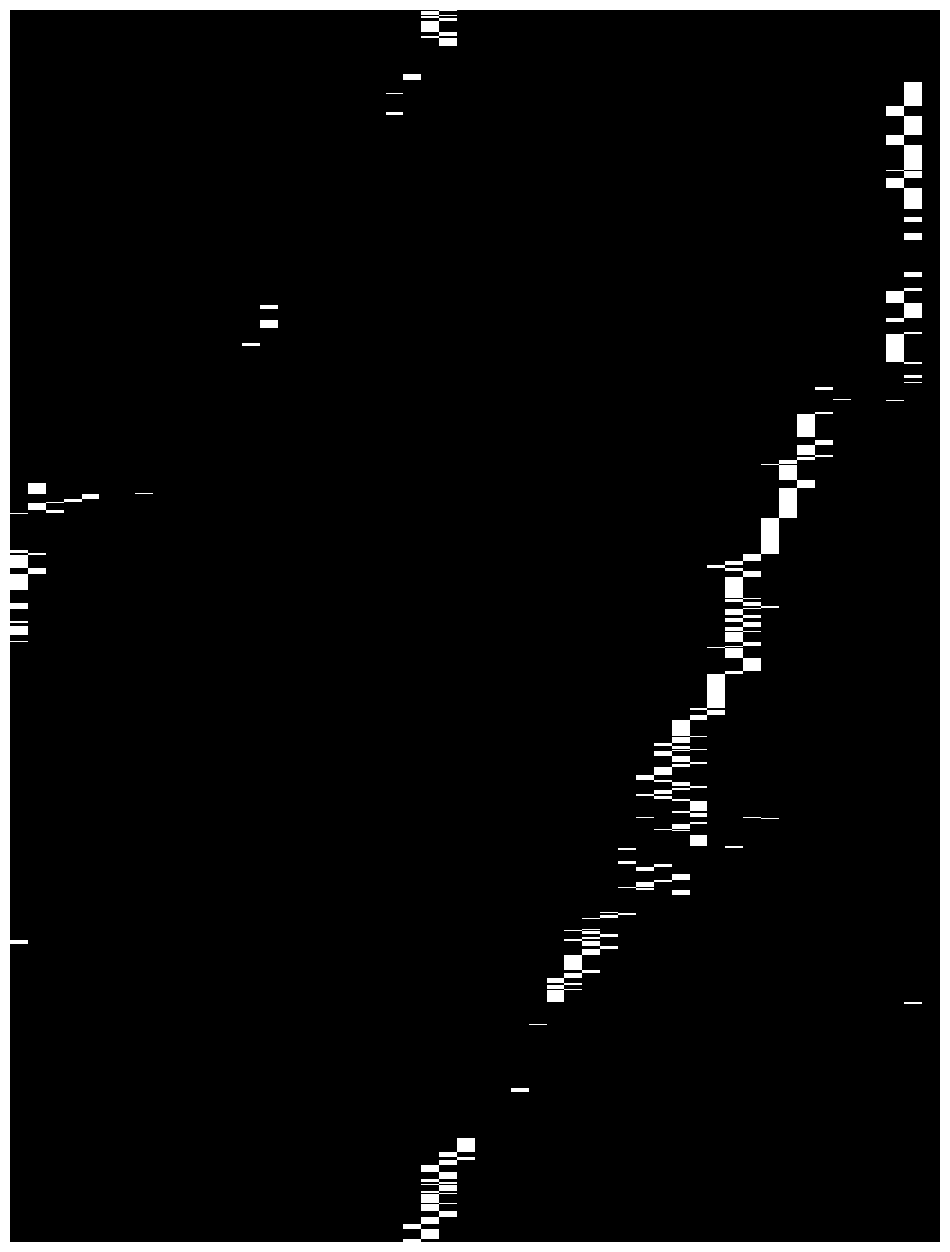

In [ ]:
from skimage.morphology import skeletonize
skeleton = skeletonize(img)
plot_numpy(255 * skeleton.astype(np.uint8))

R2 of cluster 0: 0.11540091497457394
Discarded cluster 0 with R2=0.11540091497457394
R2 of cluster 1: 0.872661090055187
Detected velocity: 18.36 m/s (66.1 km/h)

R2 of cluster 2: 0.22726661382017377
Discarded cluster 2 with R2=0.22726661382017377


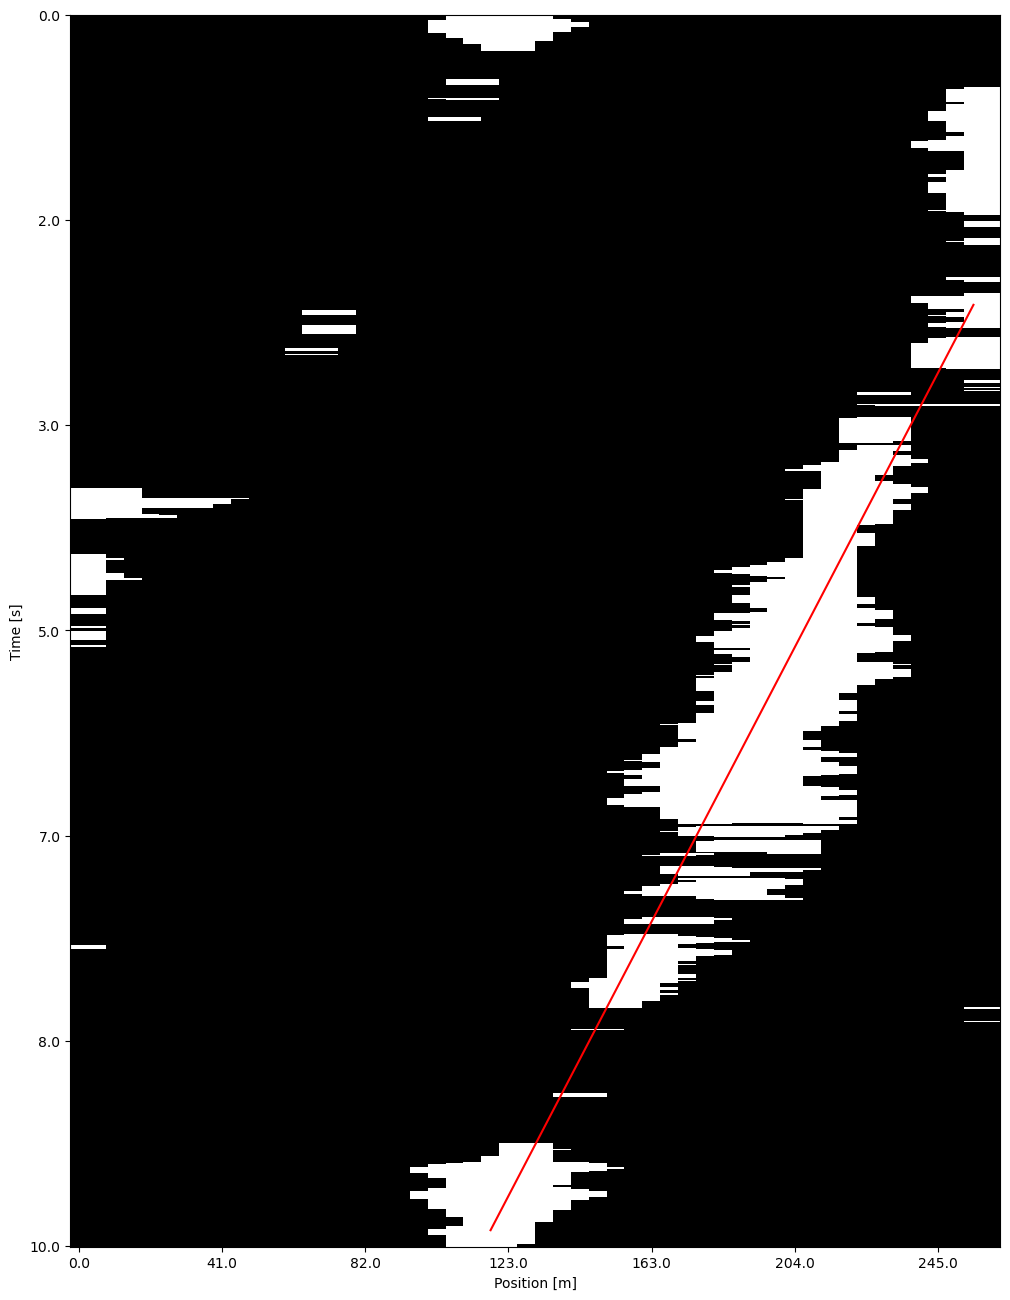

In [ ]:
from sklearn.linear_model import LinearRegression

lines = []

for cluster_id in range(no_of_clusters):
    idx = X[clustering.labels_ == cluster_id, :]
    x_coords = idx[:, 1].reshape(-1,1)
    y_coords = idx[:, 0]
    
    model = LinearRegression()
    model.fit(x_coords, y_coords)

    slope = model.coef_[0]
    intercept = model.intercept_

    x_start = np.min(x_coords)
    x_end = np.max(x_coords)
    
    # y_start = model.predict([[x_start]])
    # y_end = model.predict([[x_end]])
    r2 = model.score(x_coords, y_coords)
    print(f"R2 of cluster {cluster_id}: {r2}")

    #DISCARDING R2 < 0.5
    if r2 < 0.5:
        print(f"Discarded cluster {cluster_id} with R2={r2}")
        continue
    velocity = velocity_from_slope(slope)
    print(f"Detected velocity: {velocity} m/s ({ mps_to_kmph(velocity) } km/h)")
    print()
    lines.append((slope,intercept, x_start, x_end))
    

plot_numpy_with_lines(img, lines)



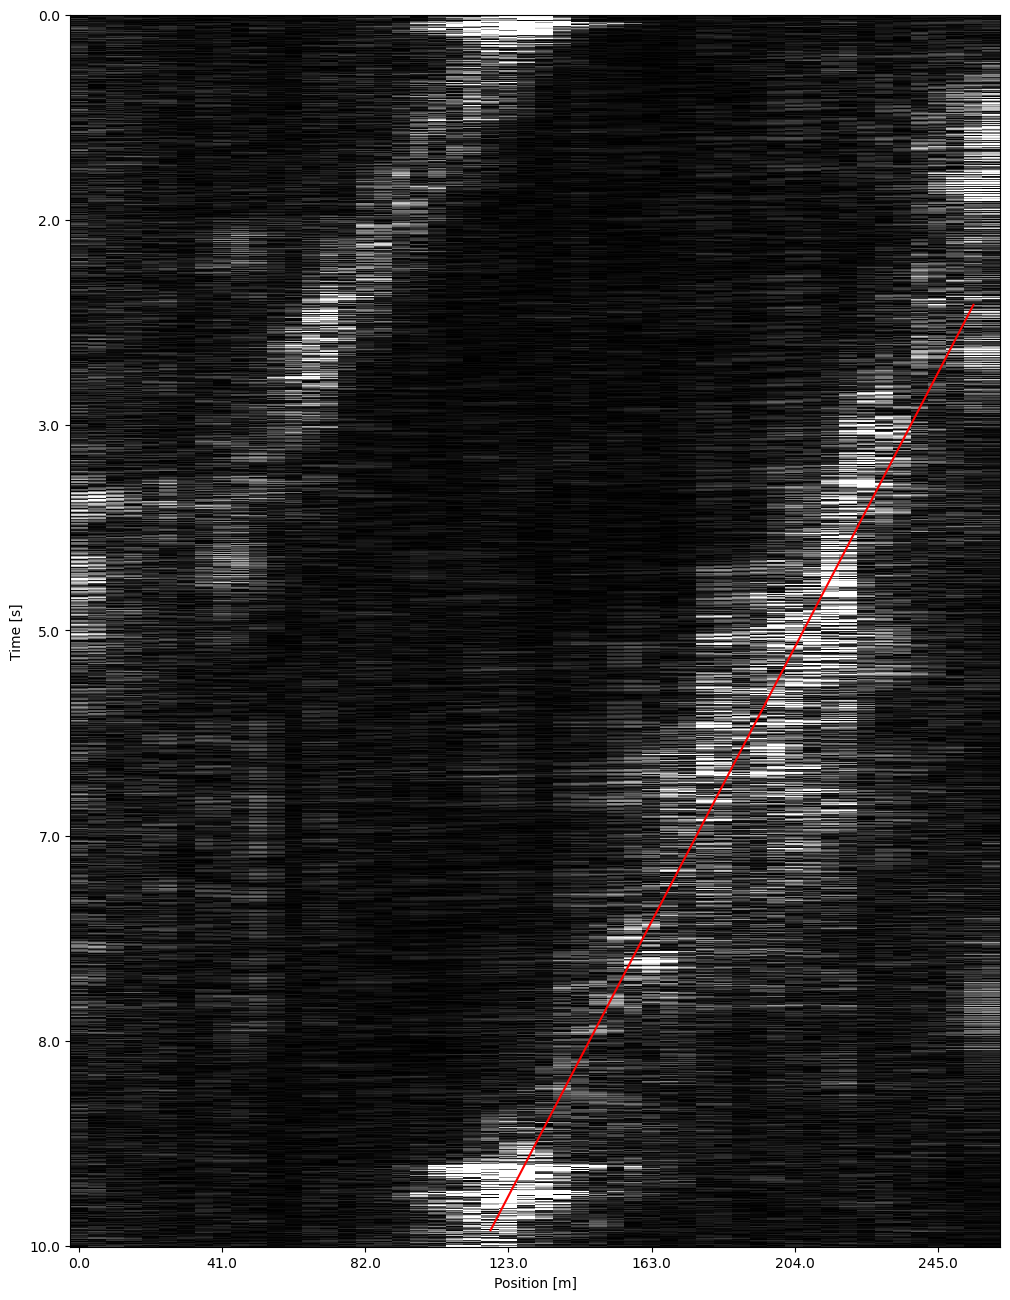

In [ ]:
plot_numpy_with_lines(original_img, lines)

In [4]:
from regression_pipeline import detect_velocities

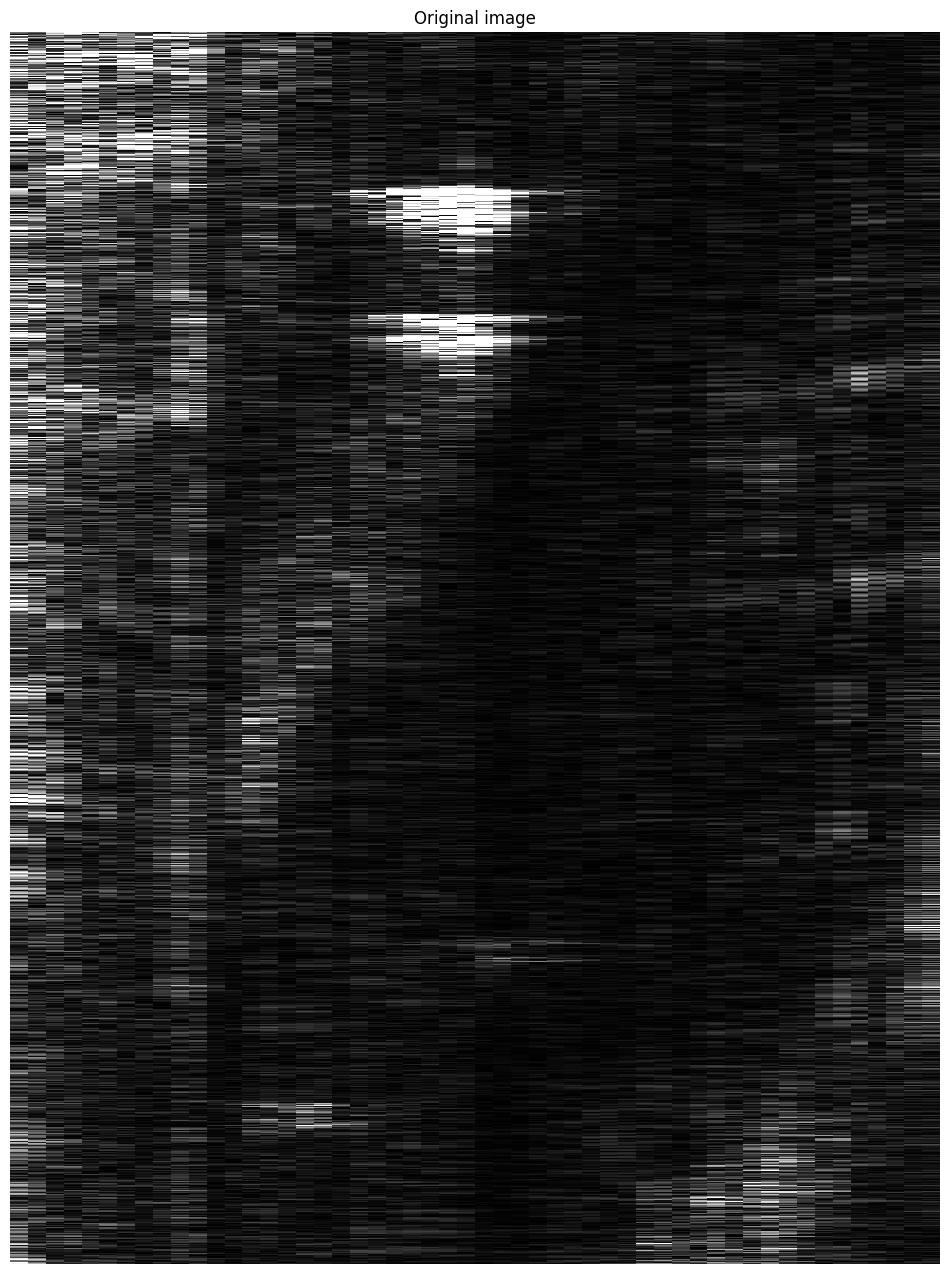

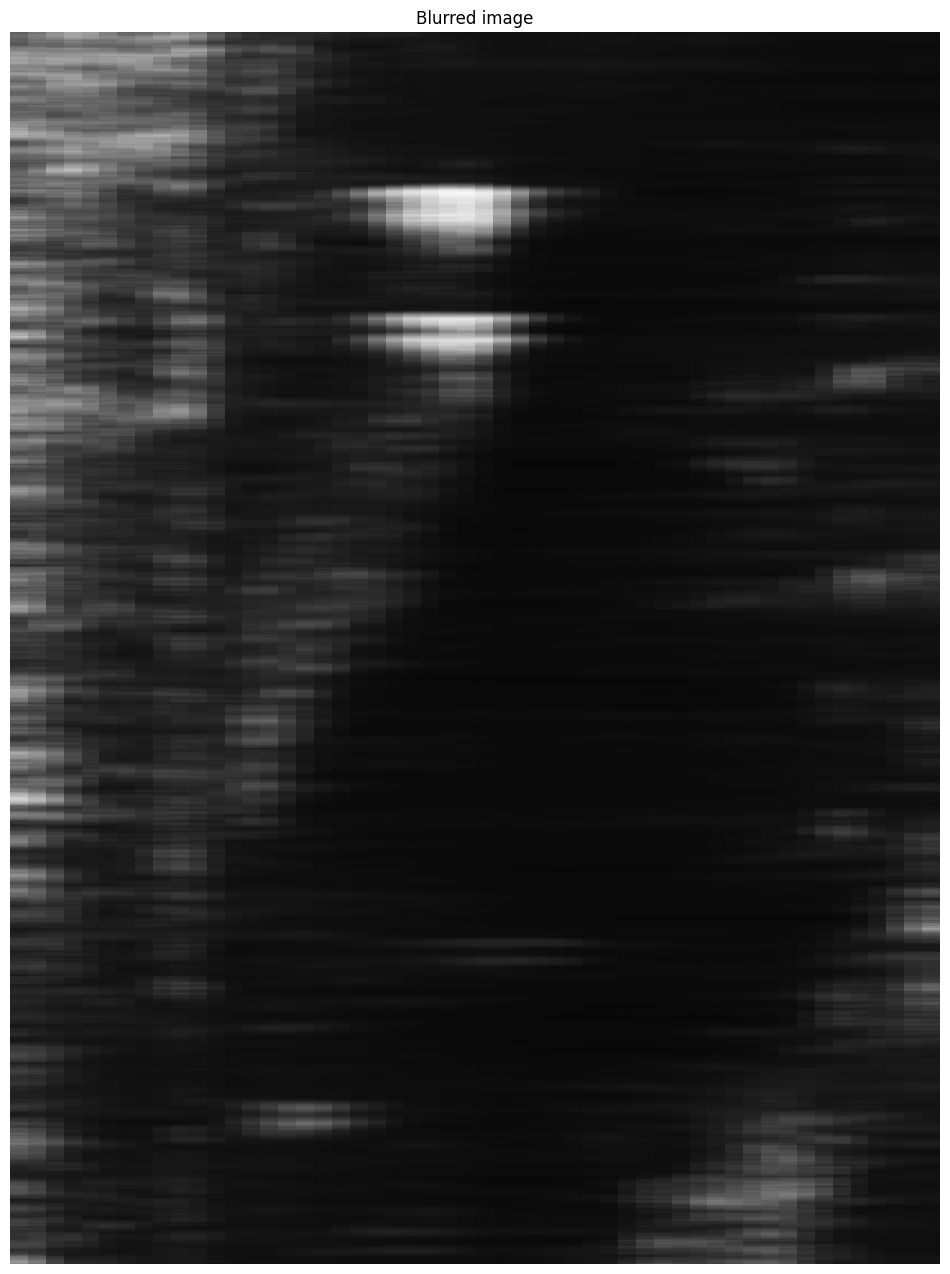

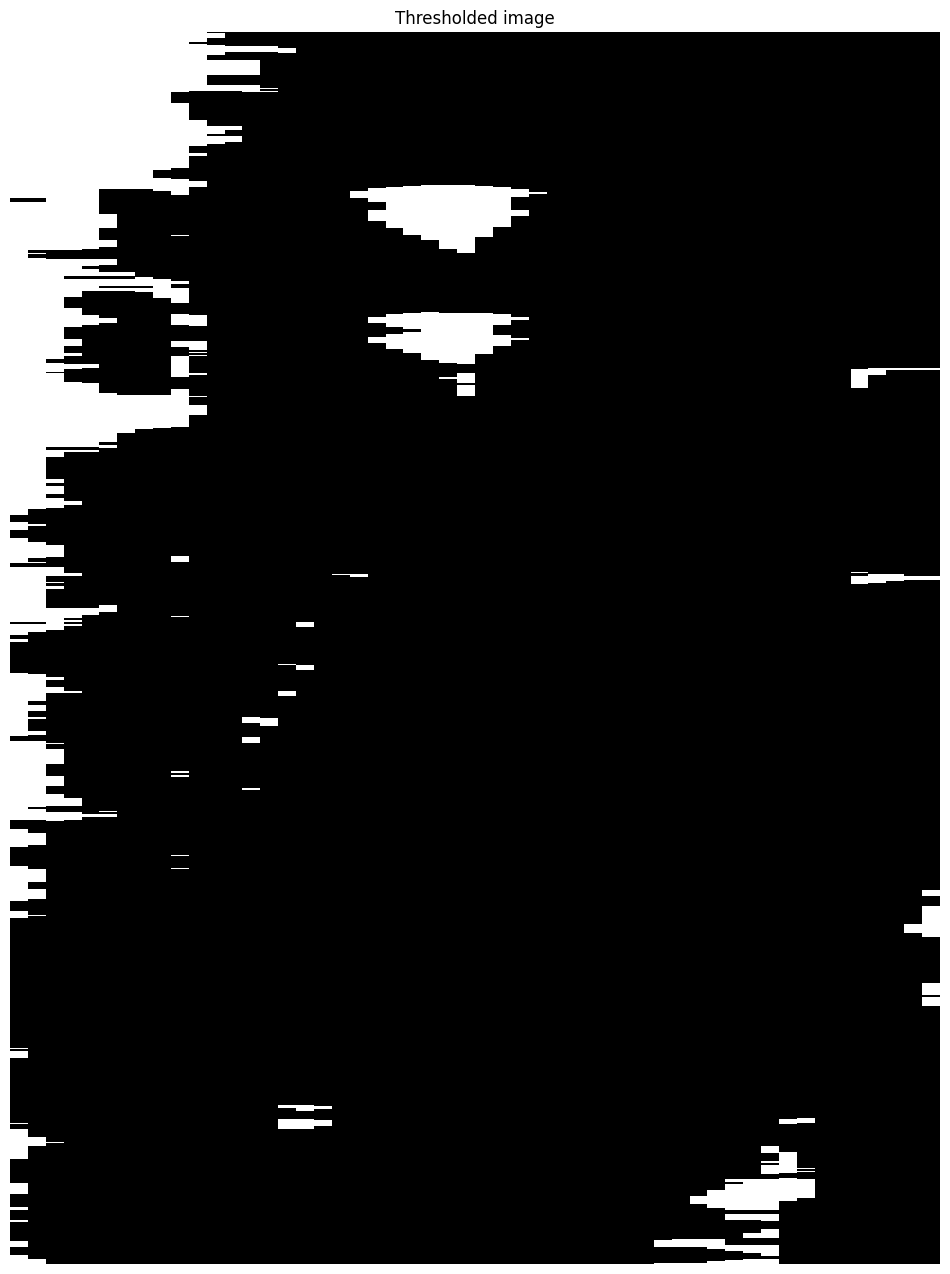

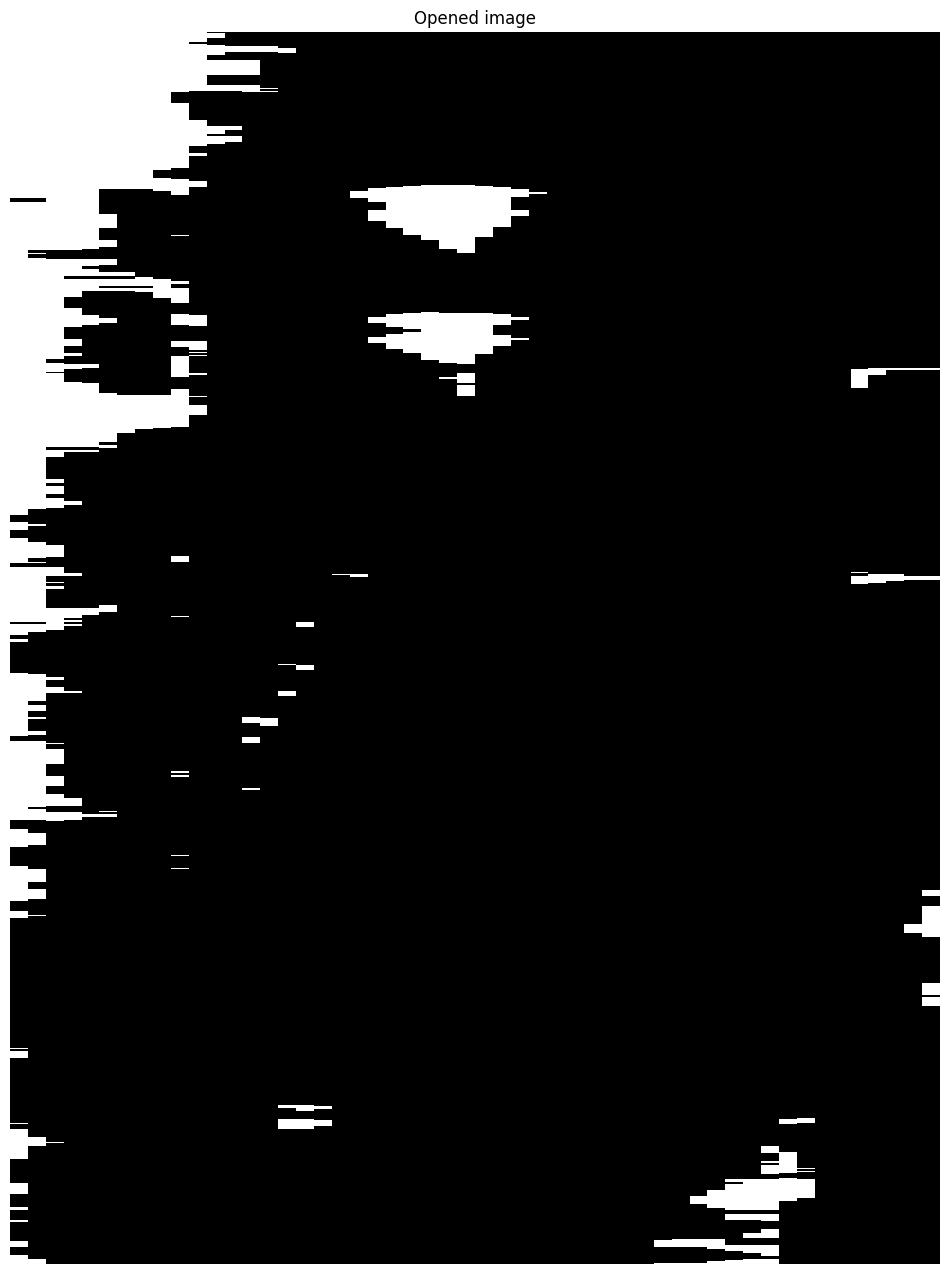

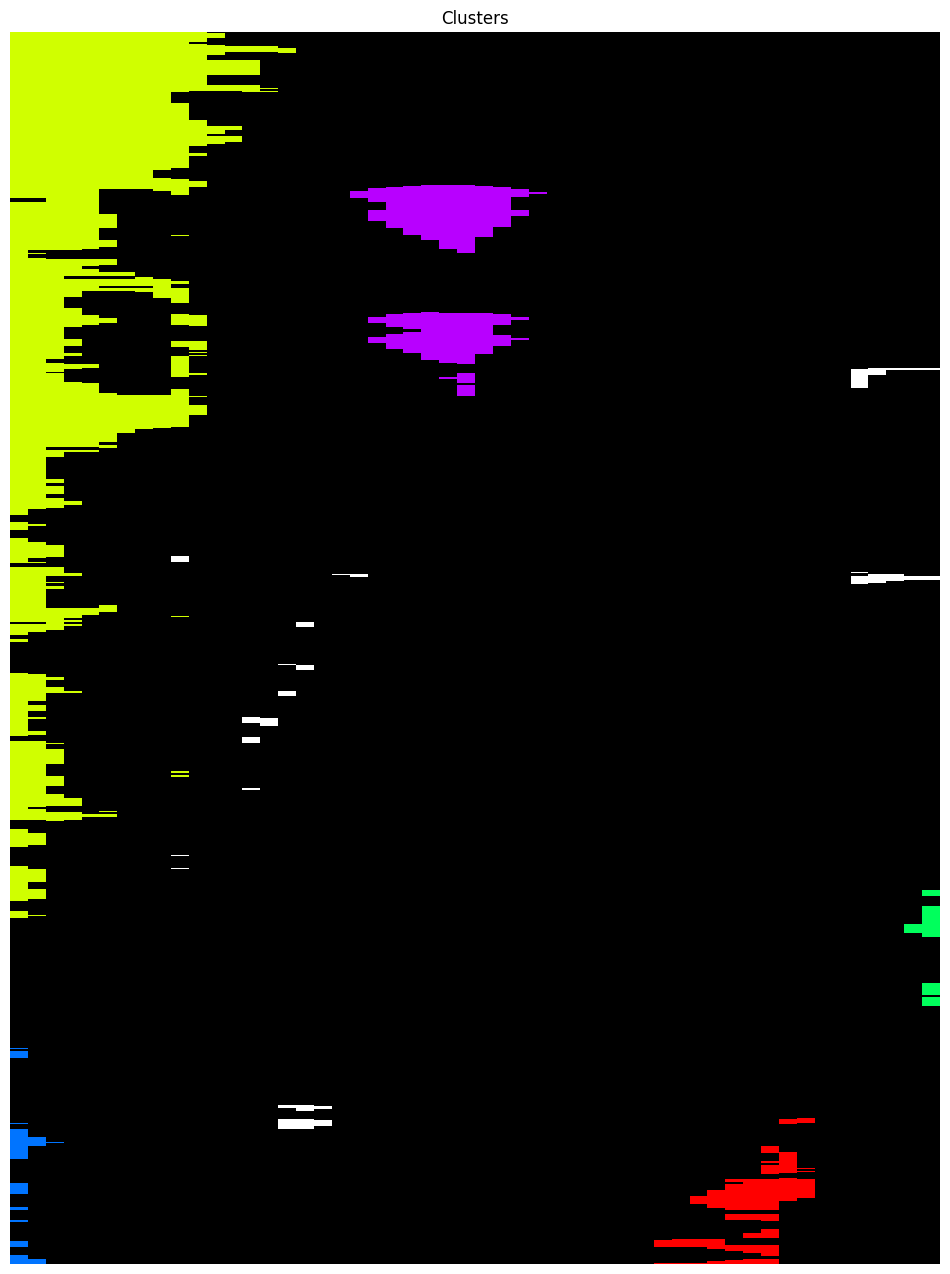

Discarded cluster 0 with R2=0.2055243912601169 (<0.5)
Discarded cluster 1 with R2=0.0018543840007526624 (<0.5)
Discarded cluster 2 with R2=0.021252171132782327 (<0.5)
Discarded cluster 3 with R2=0.29111476037704953 (<0.5)
Discarded cluster 4 with R2=0.003120557400801527 (<0.5)


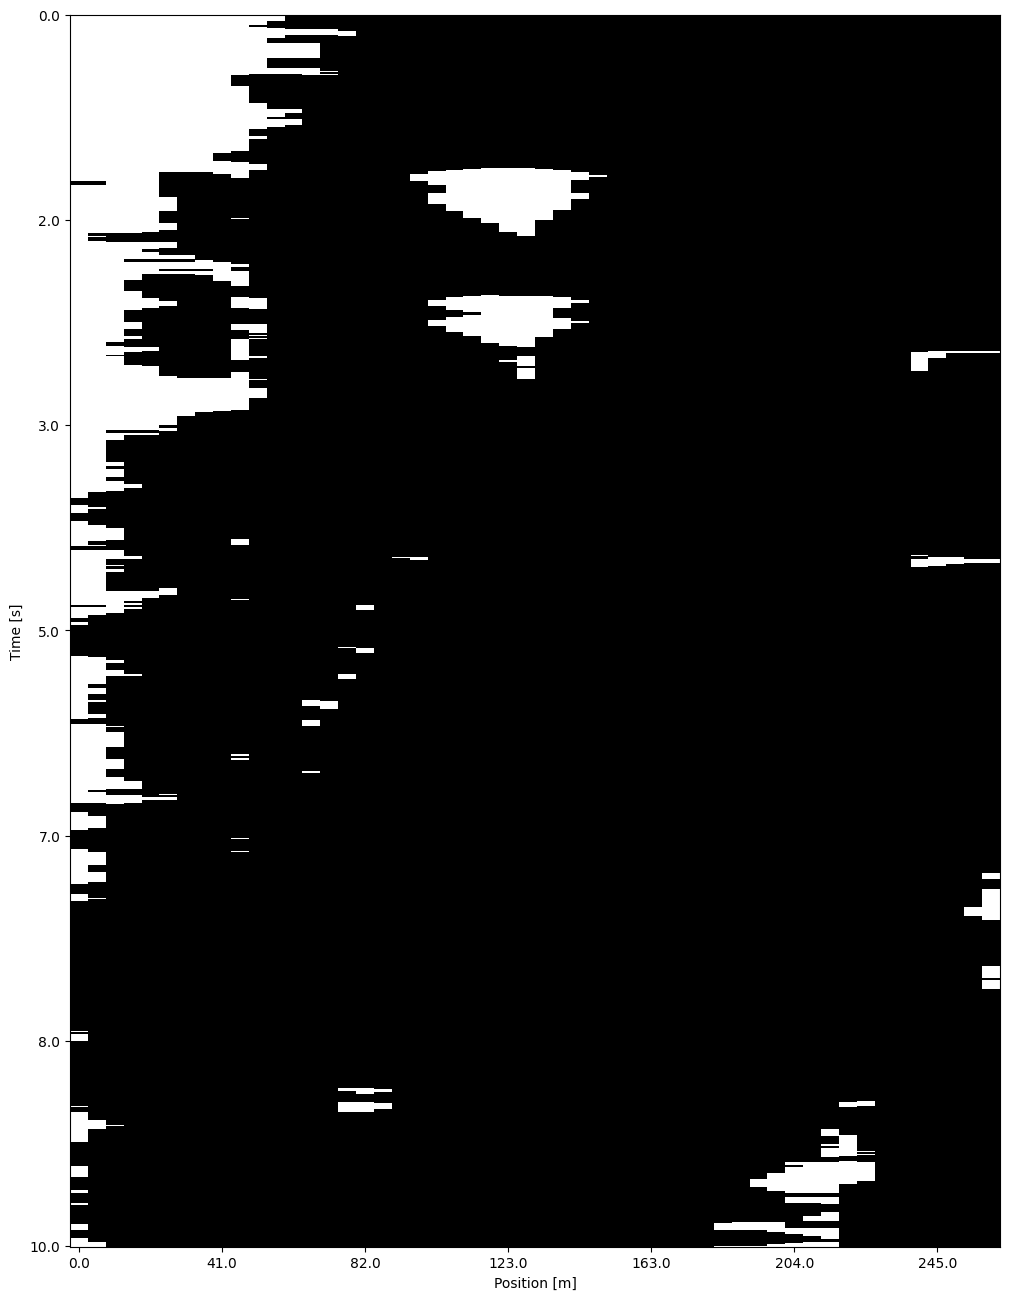

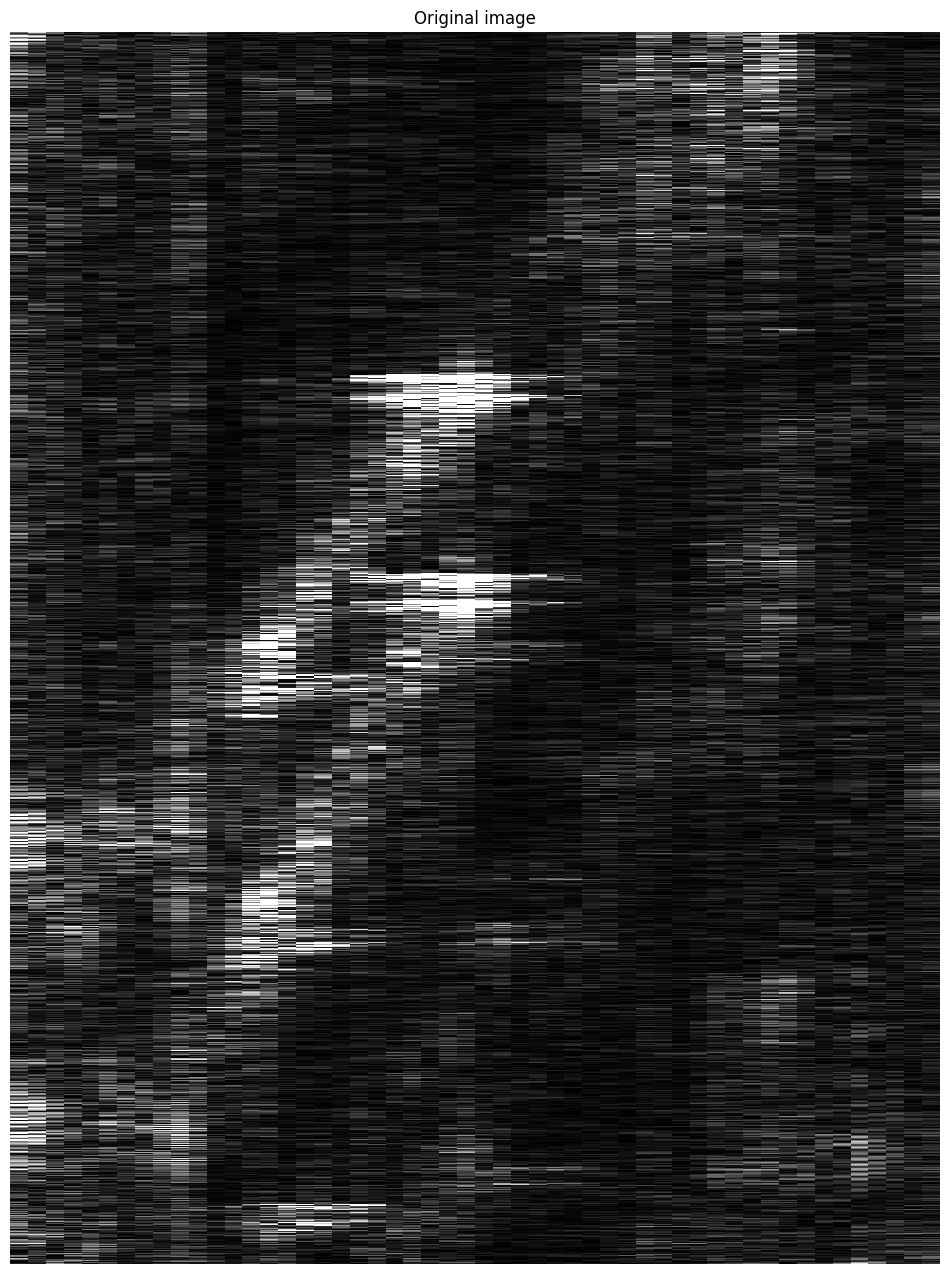

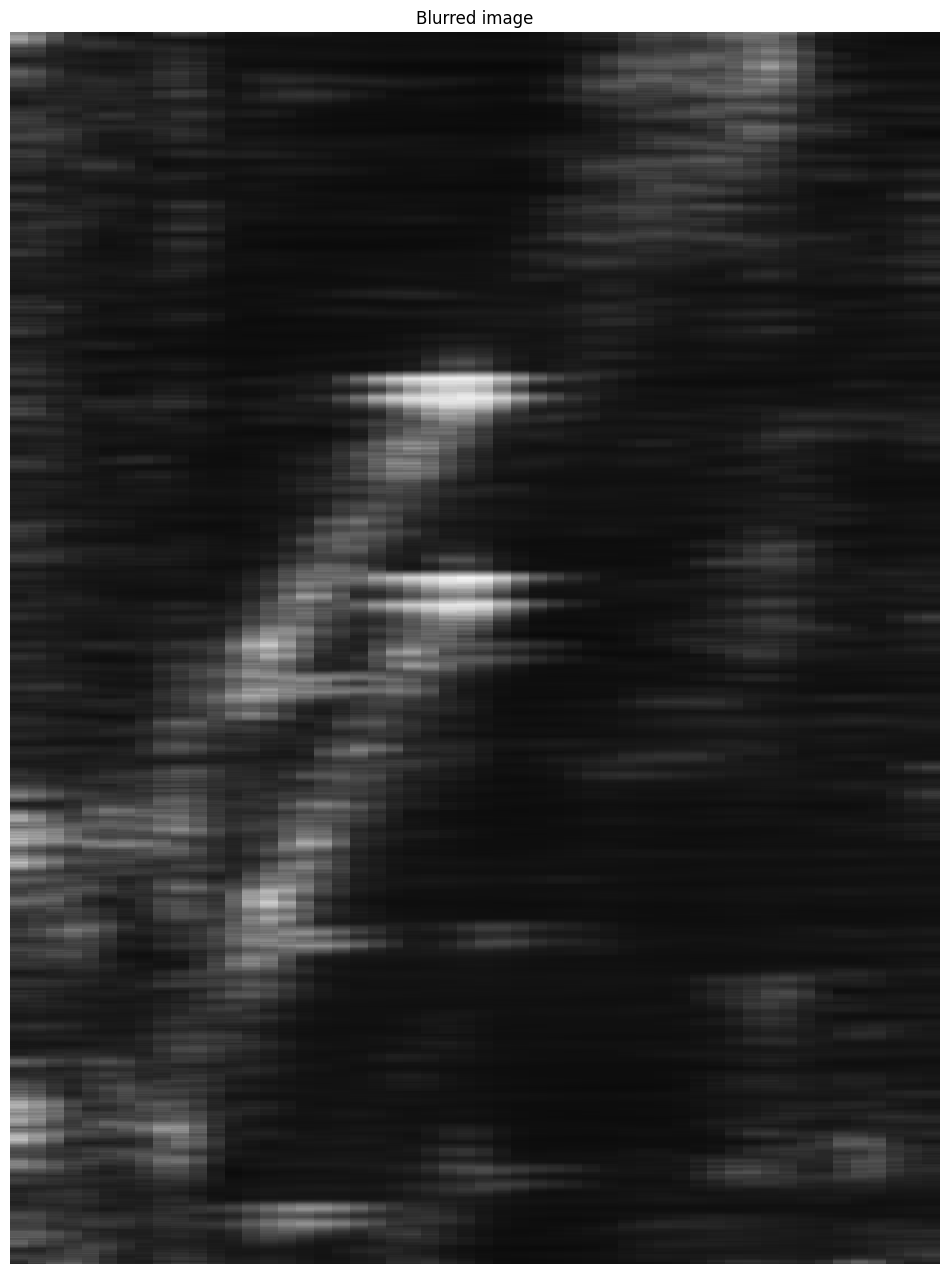

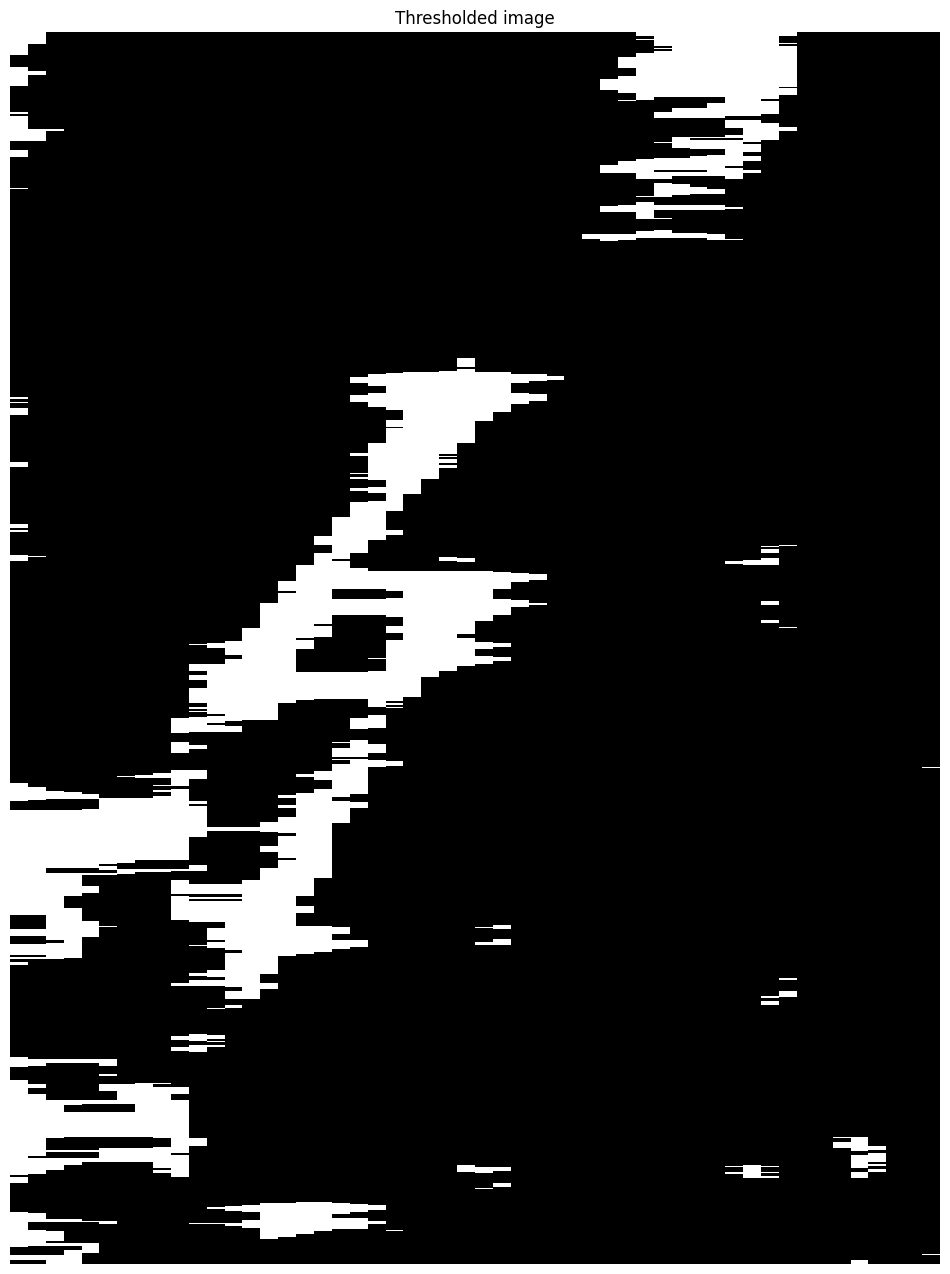

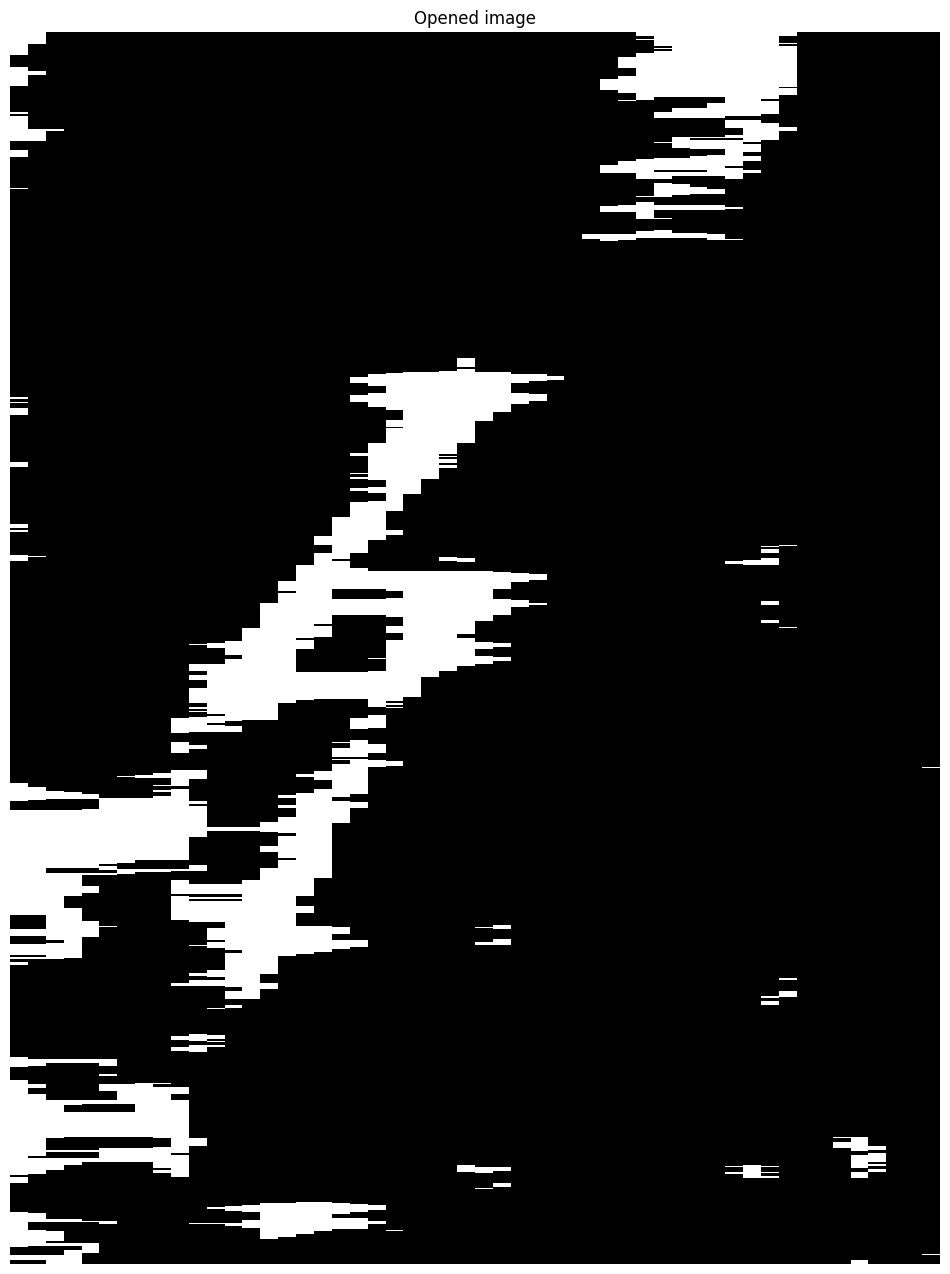

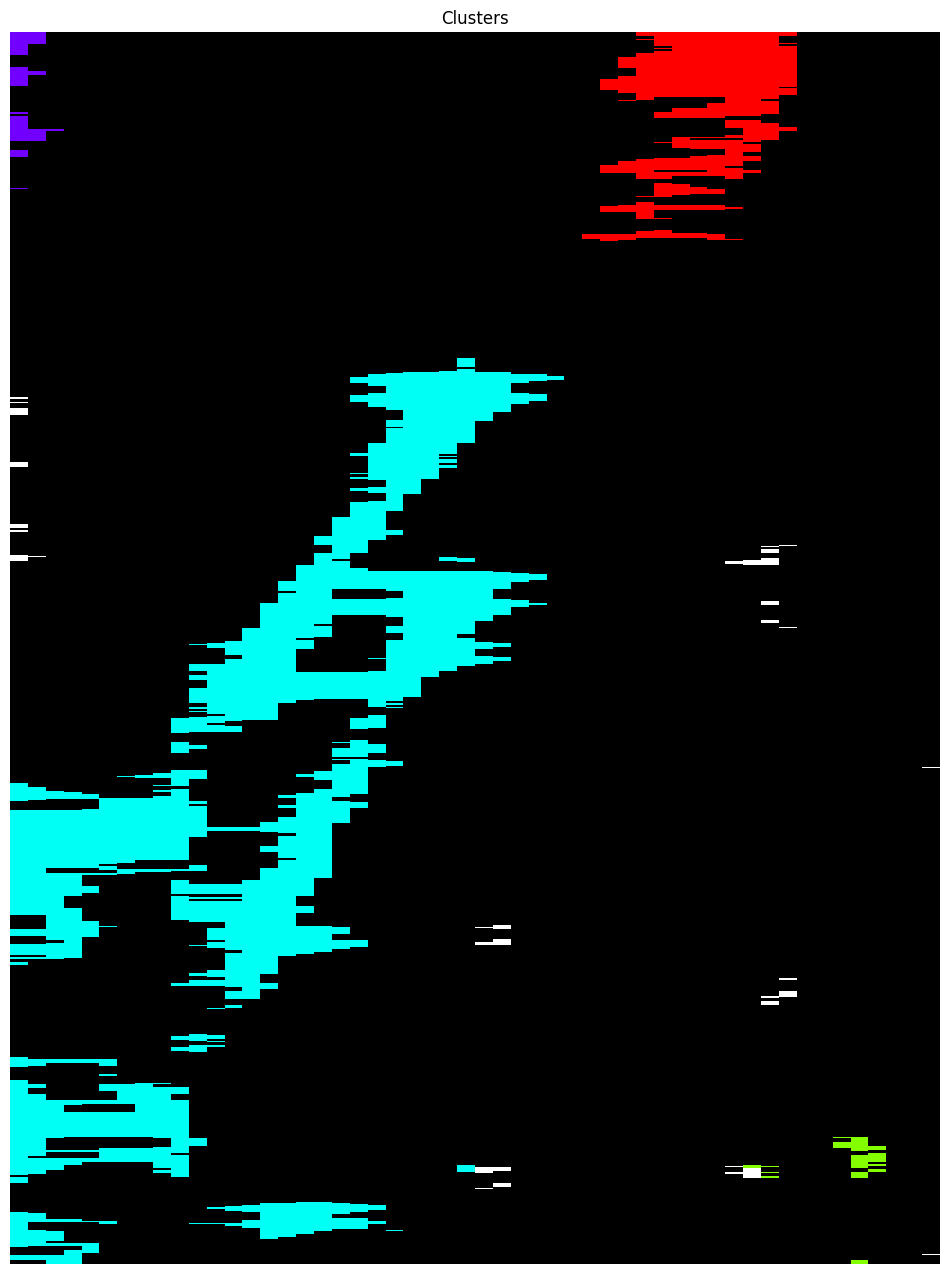

Discarded cluster 0 with R2=0.0022006235913533123 (<0.5)
Discarded cluster 1 with R2=0.10386230943537478 (<0.5)
Discarded cluster 2 with R2=0.49846357694693855 (<0.5)
Discarded cluster 3 with R2=0.00602178952380894 (<0.5)


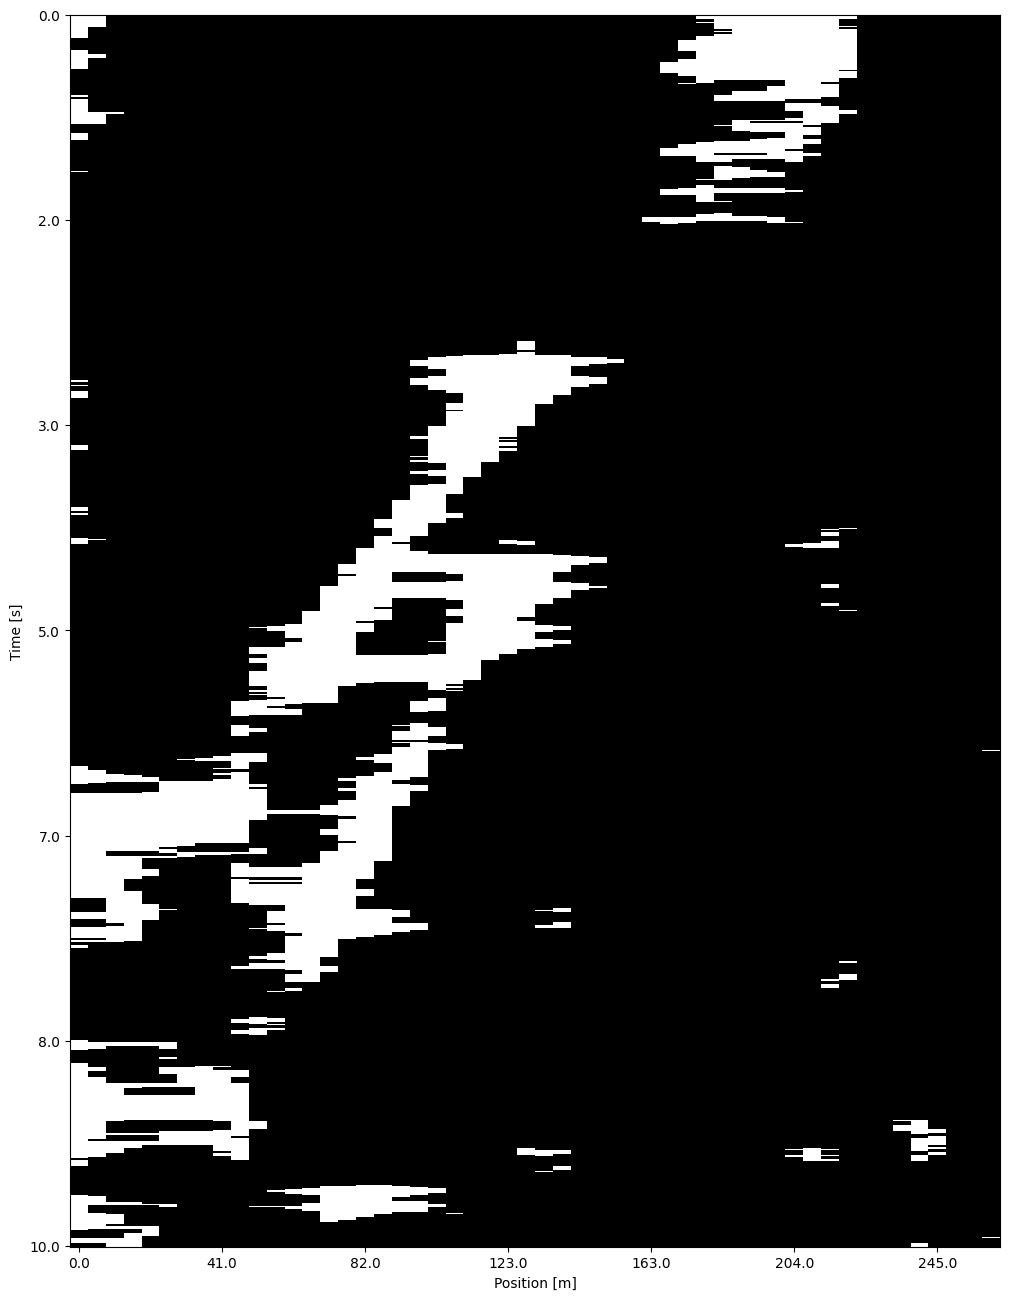

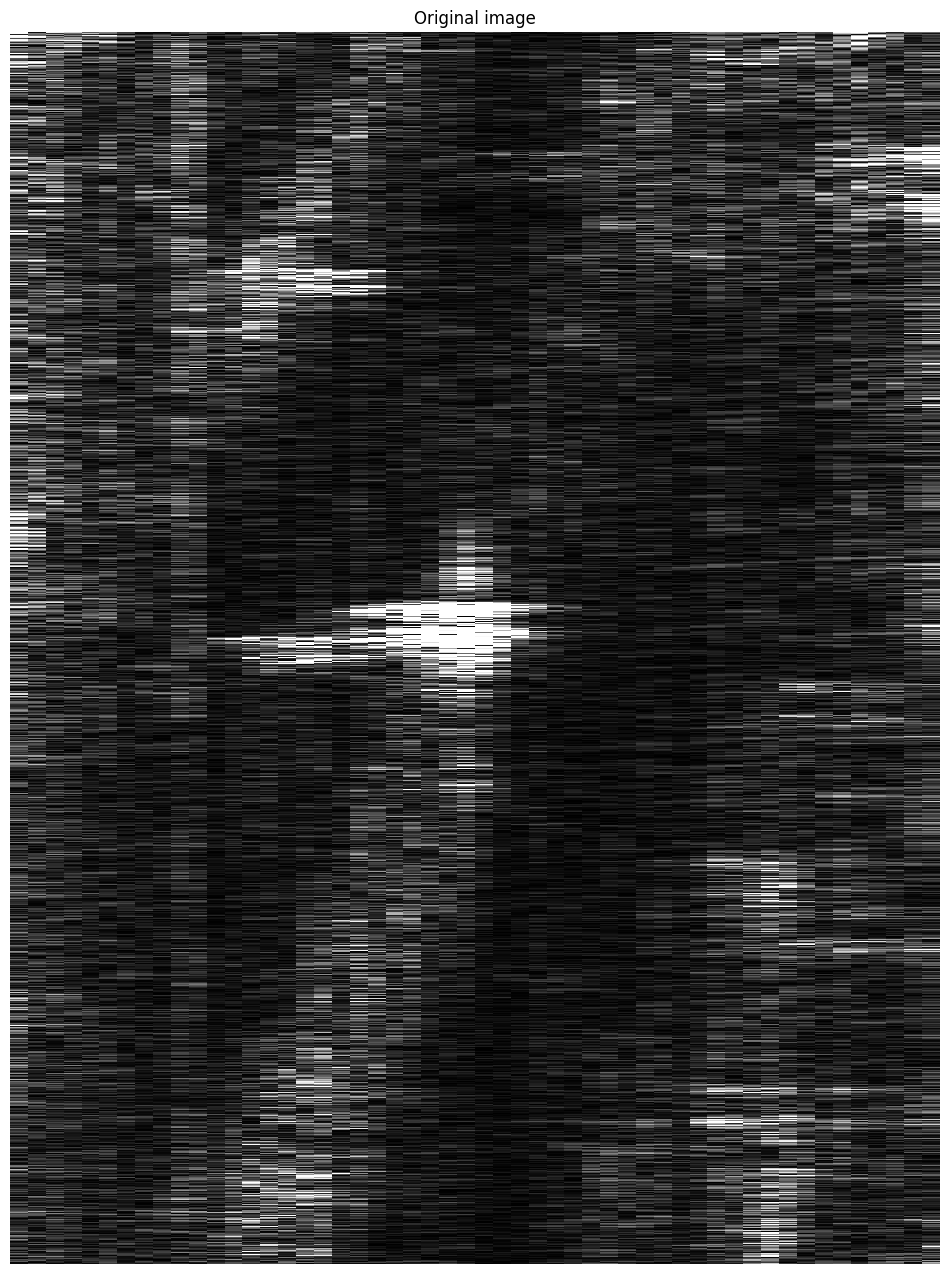

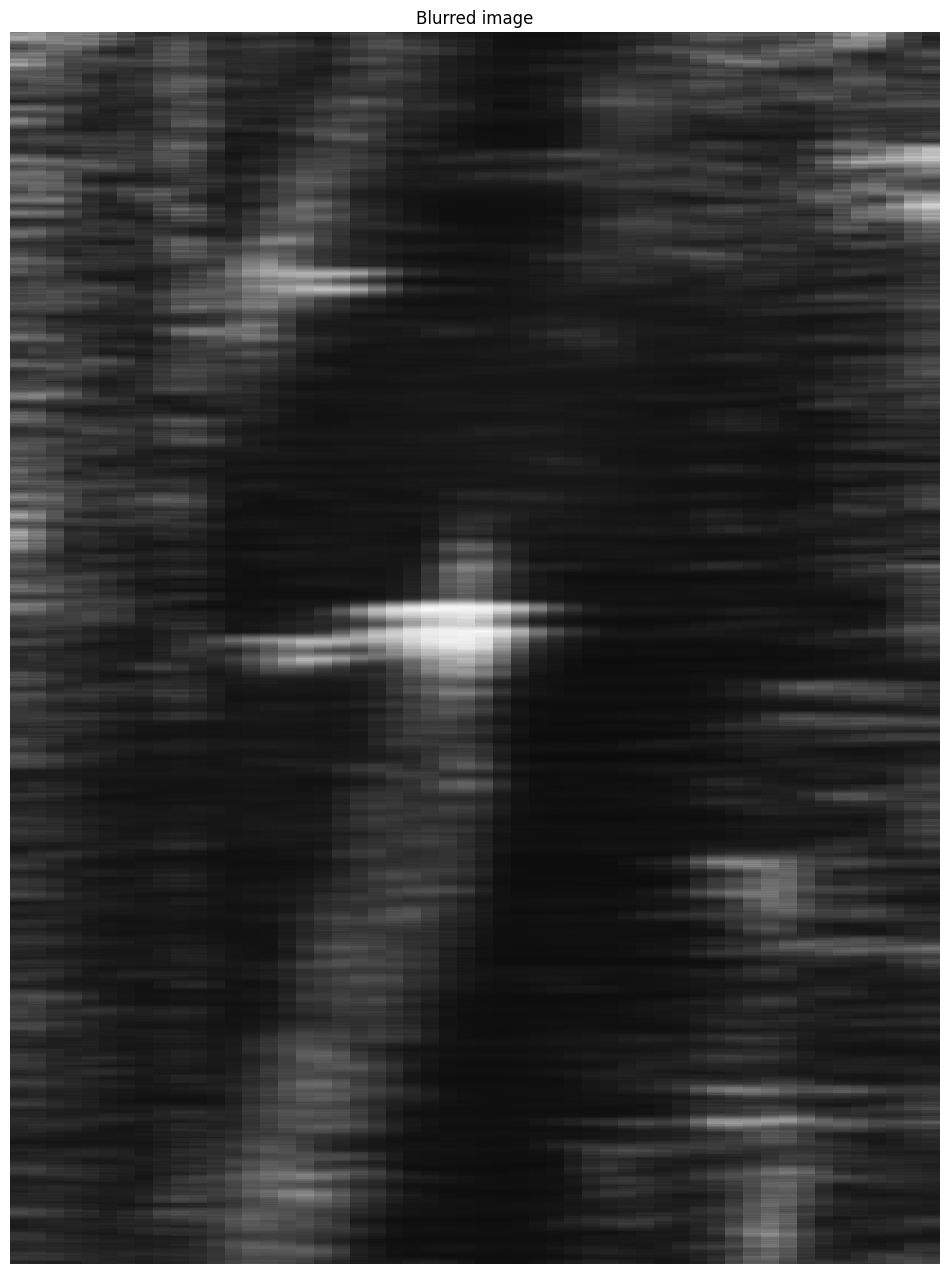

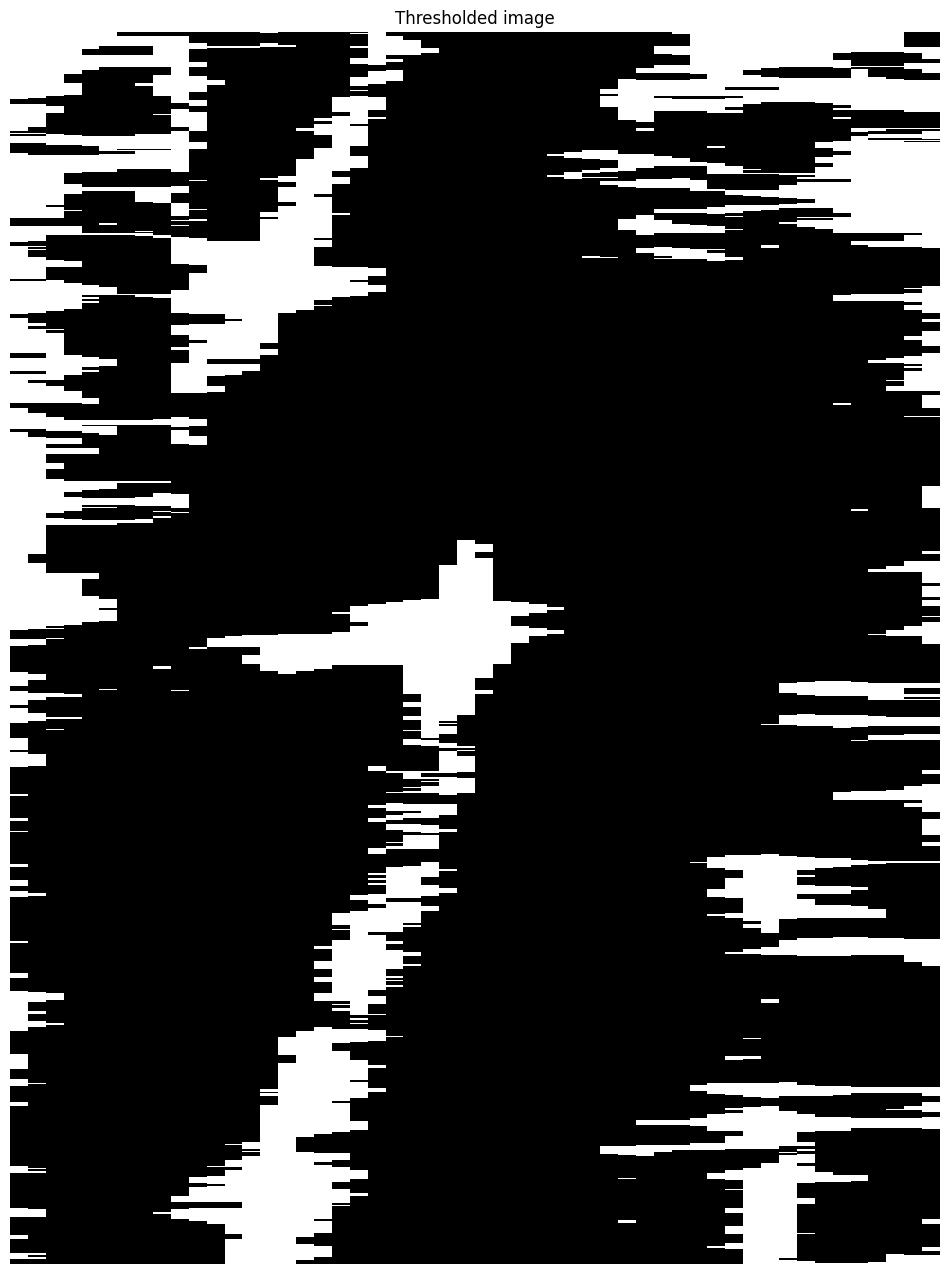

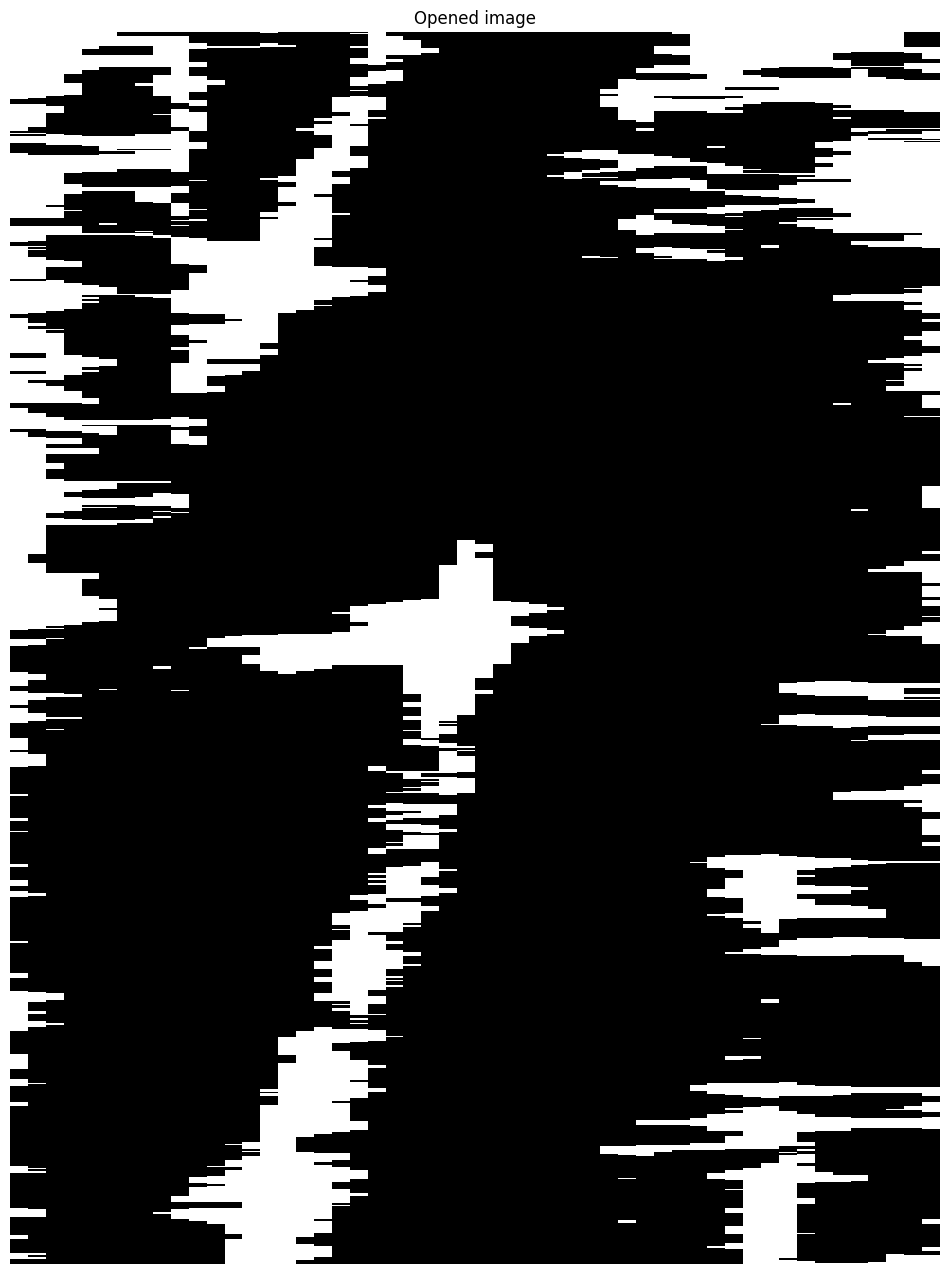

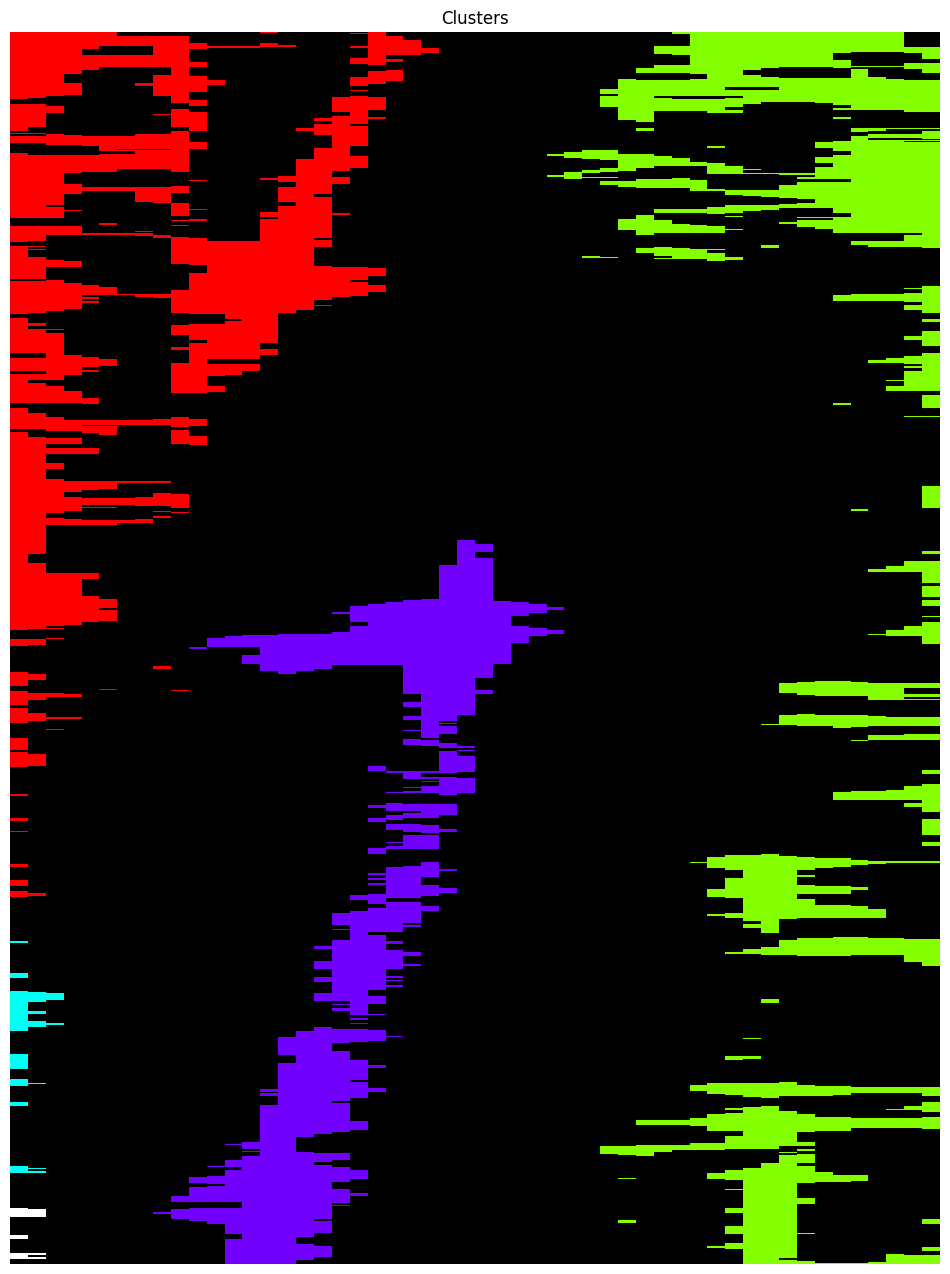

Discarded cluster 0 with R2=0.14475761139934196 (<0.5)
Discarded cluster 1 with R2=2.5837920095250766e-05 (<0.5)
Detected velocity: 16.13 m/s (58.07 km/h)

Discarded cluster 3 with R2=0.03204176749259158 (<0.5)


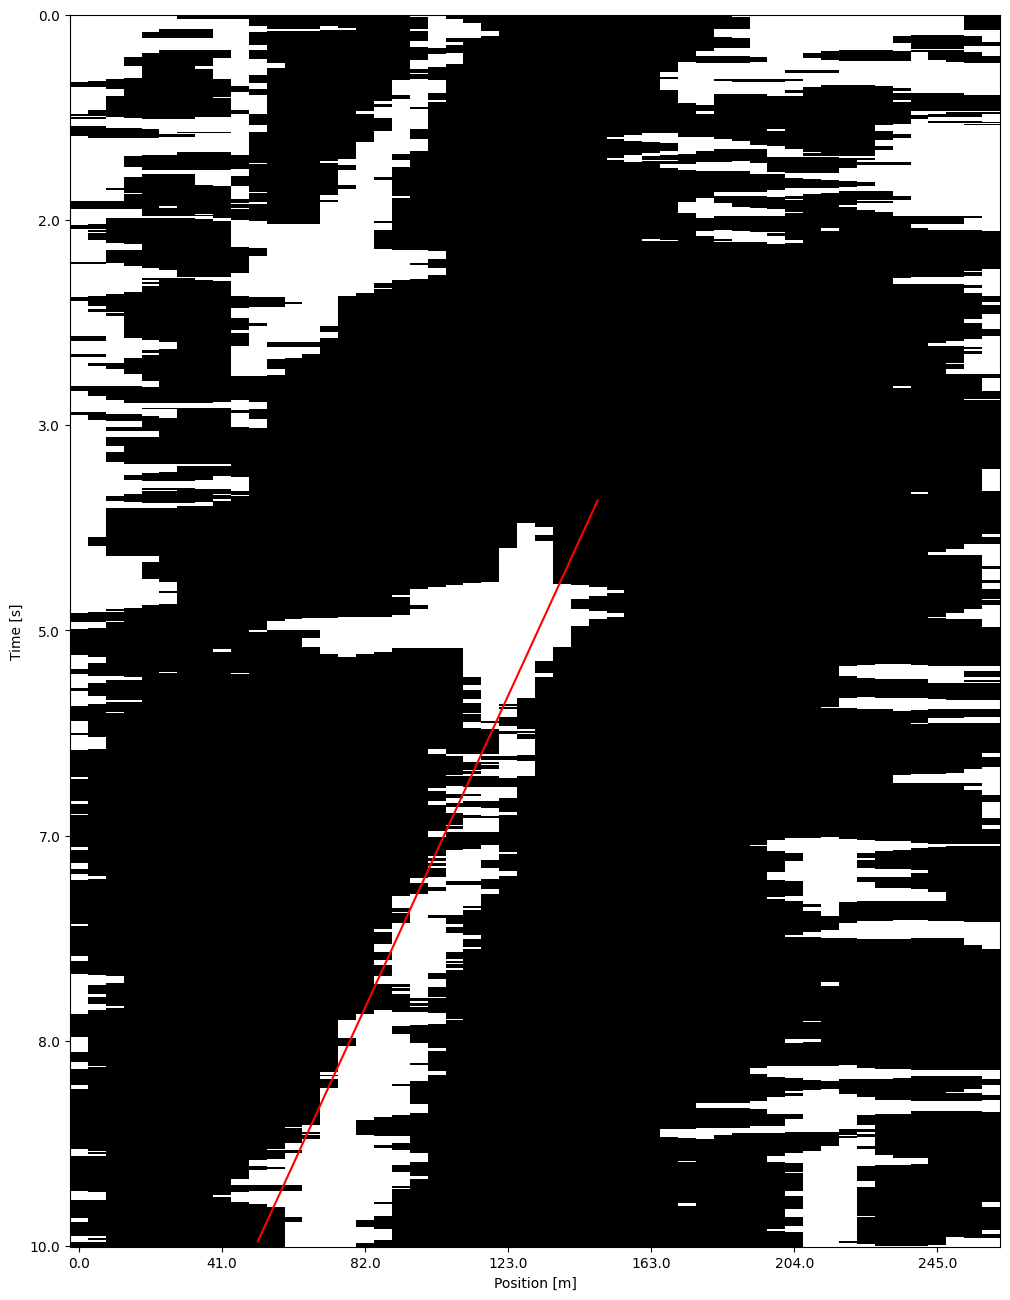

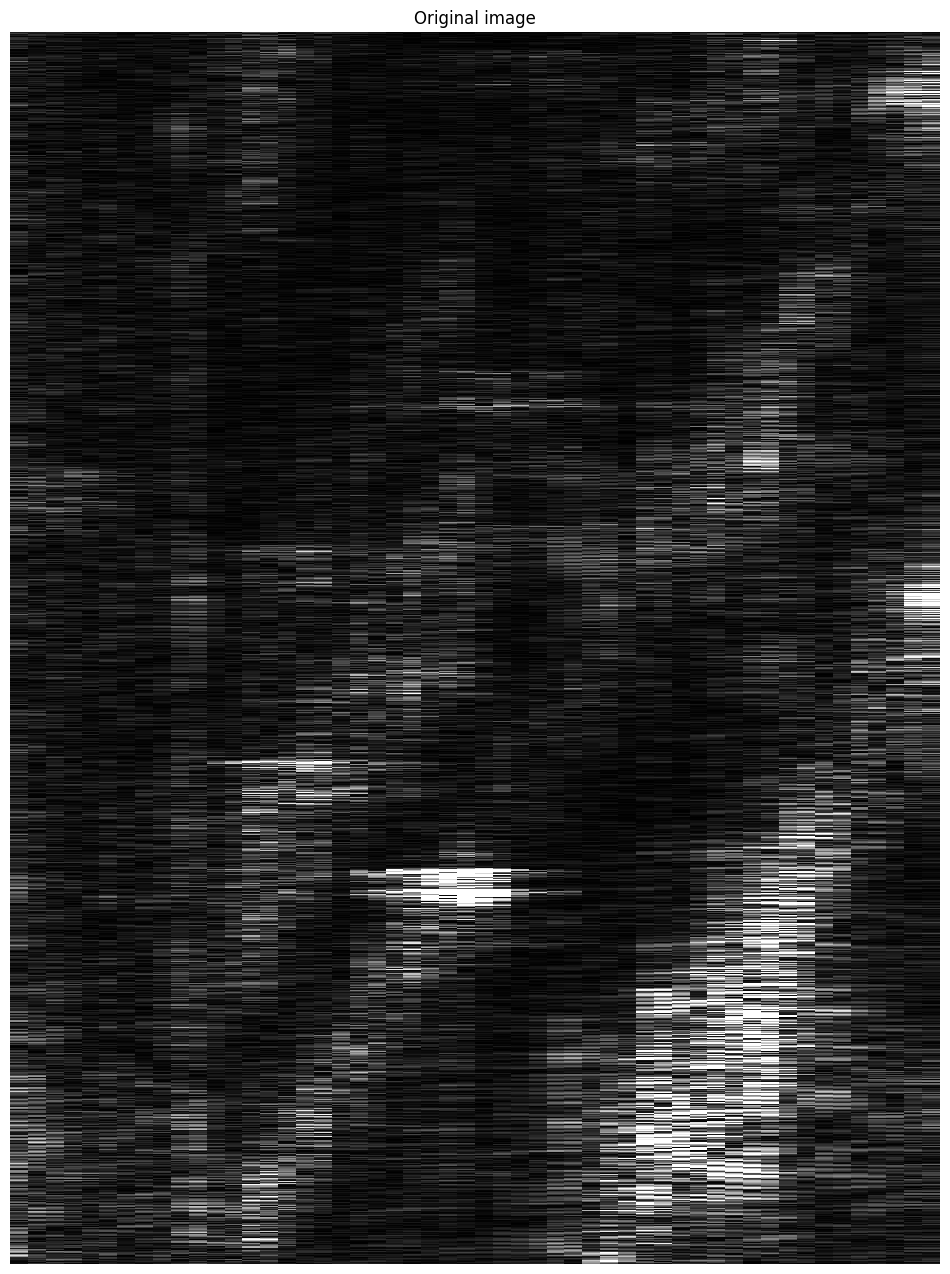

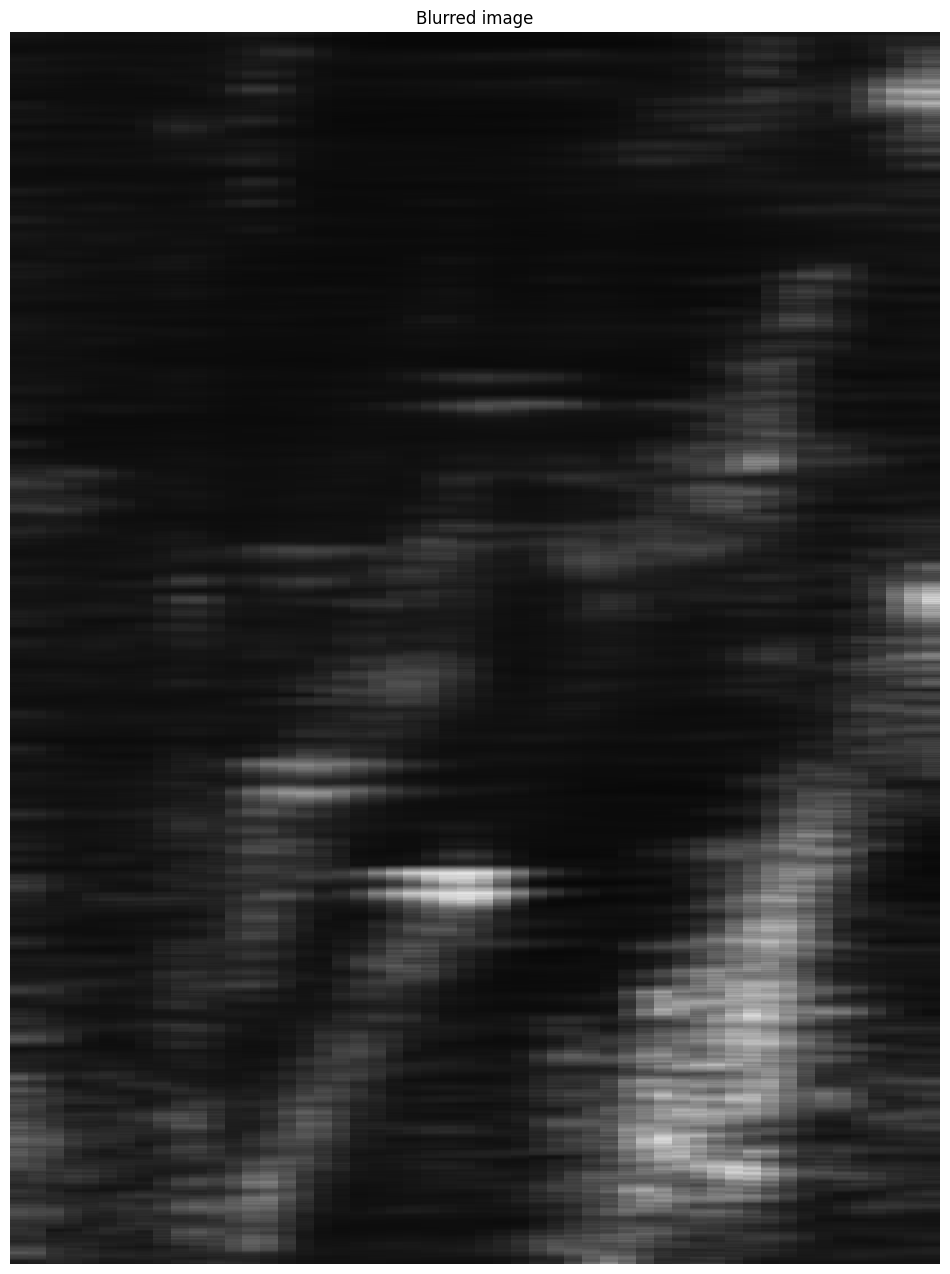

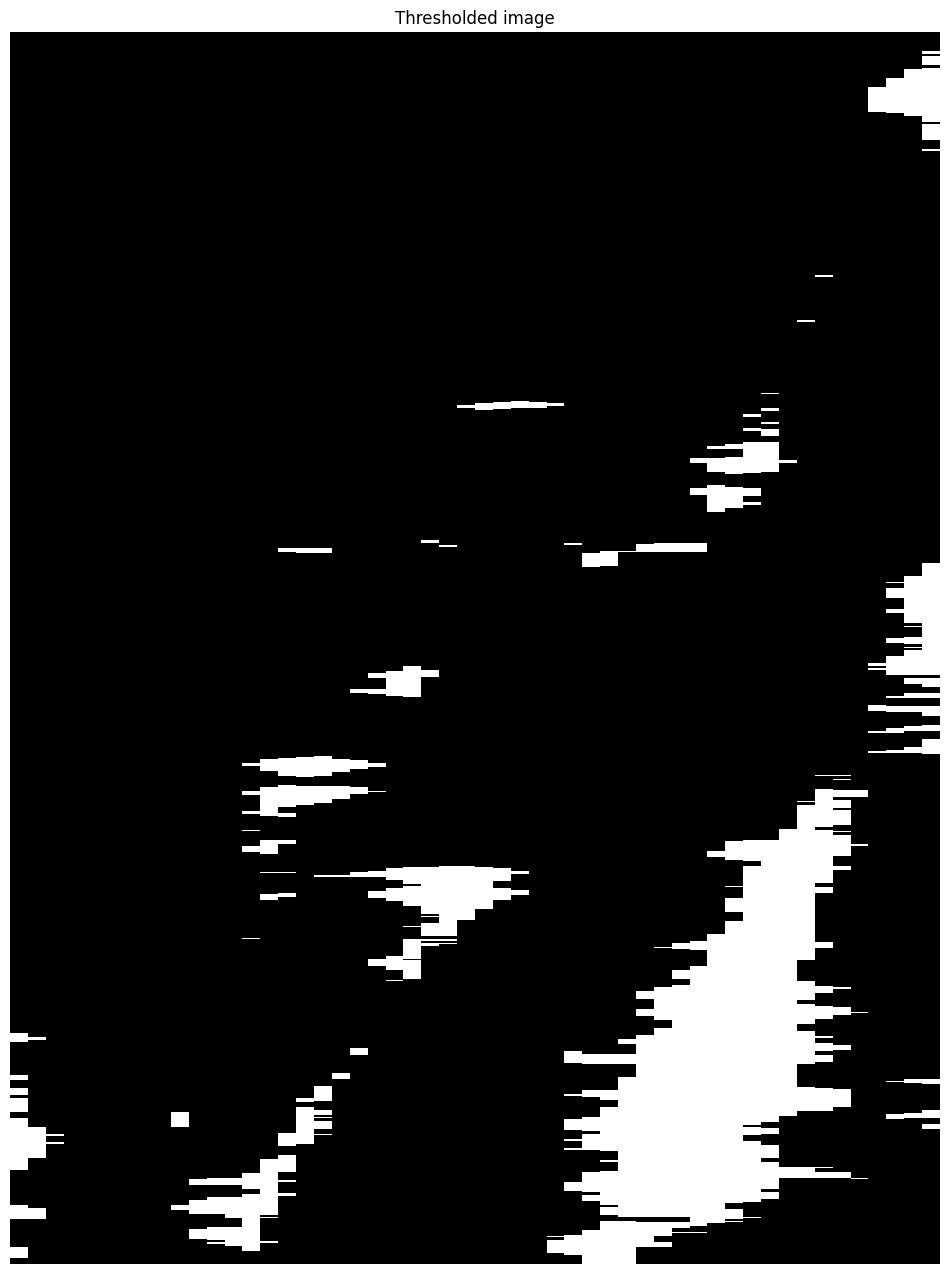

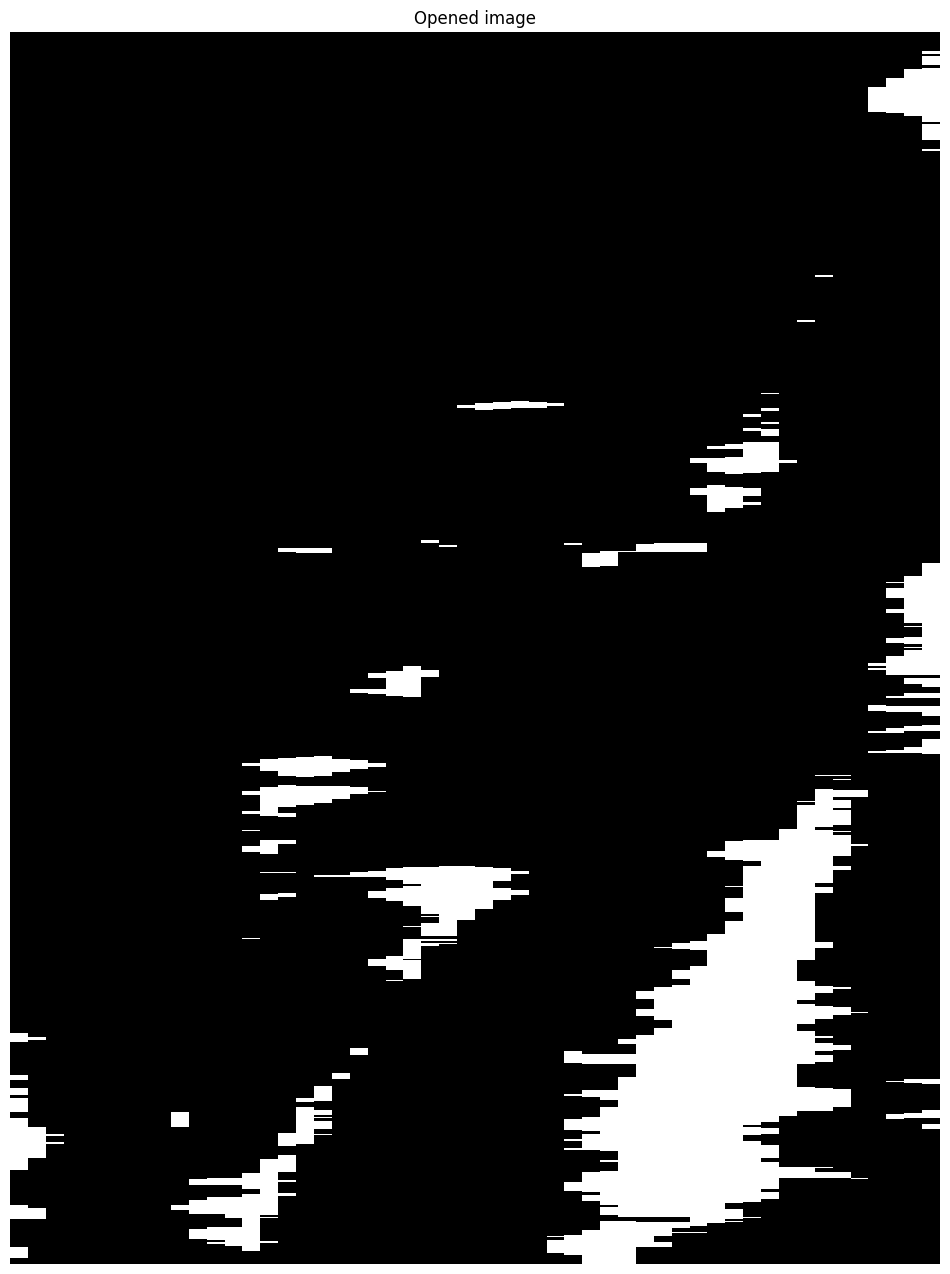

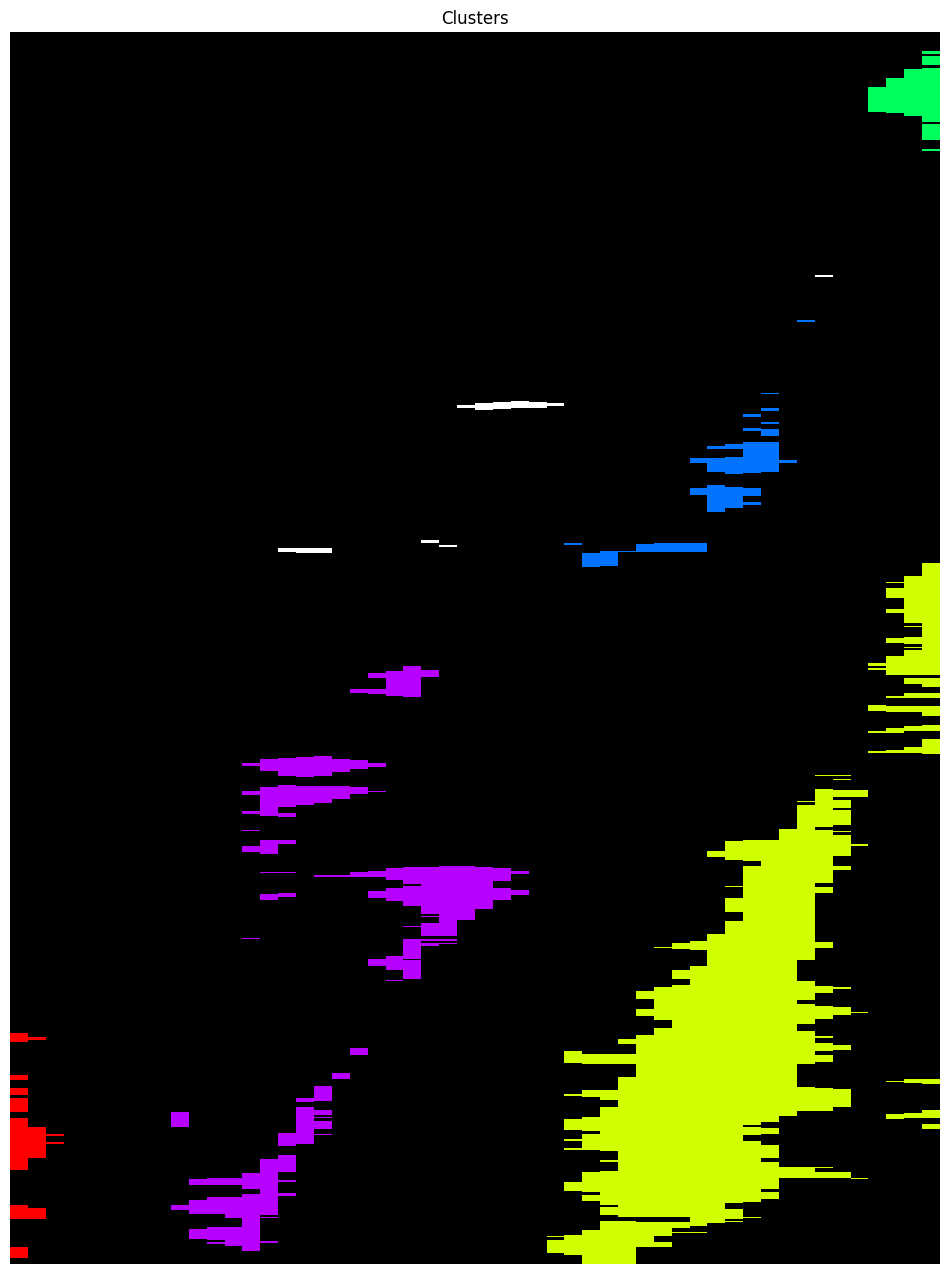

Discarded cluster 0 with R2=0.0001826492489108711 (<0.5)
Detected velocity: 49.56 m/s (178.42 km/h)

Detected velocity: 25.42 m/s (91.51 km/h)

Discarded cluster 3 with R2=0.3090241851816762 (<0.5)
Discarded cluster 4 with R2=0.002479534454820631 (<0.5)


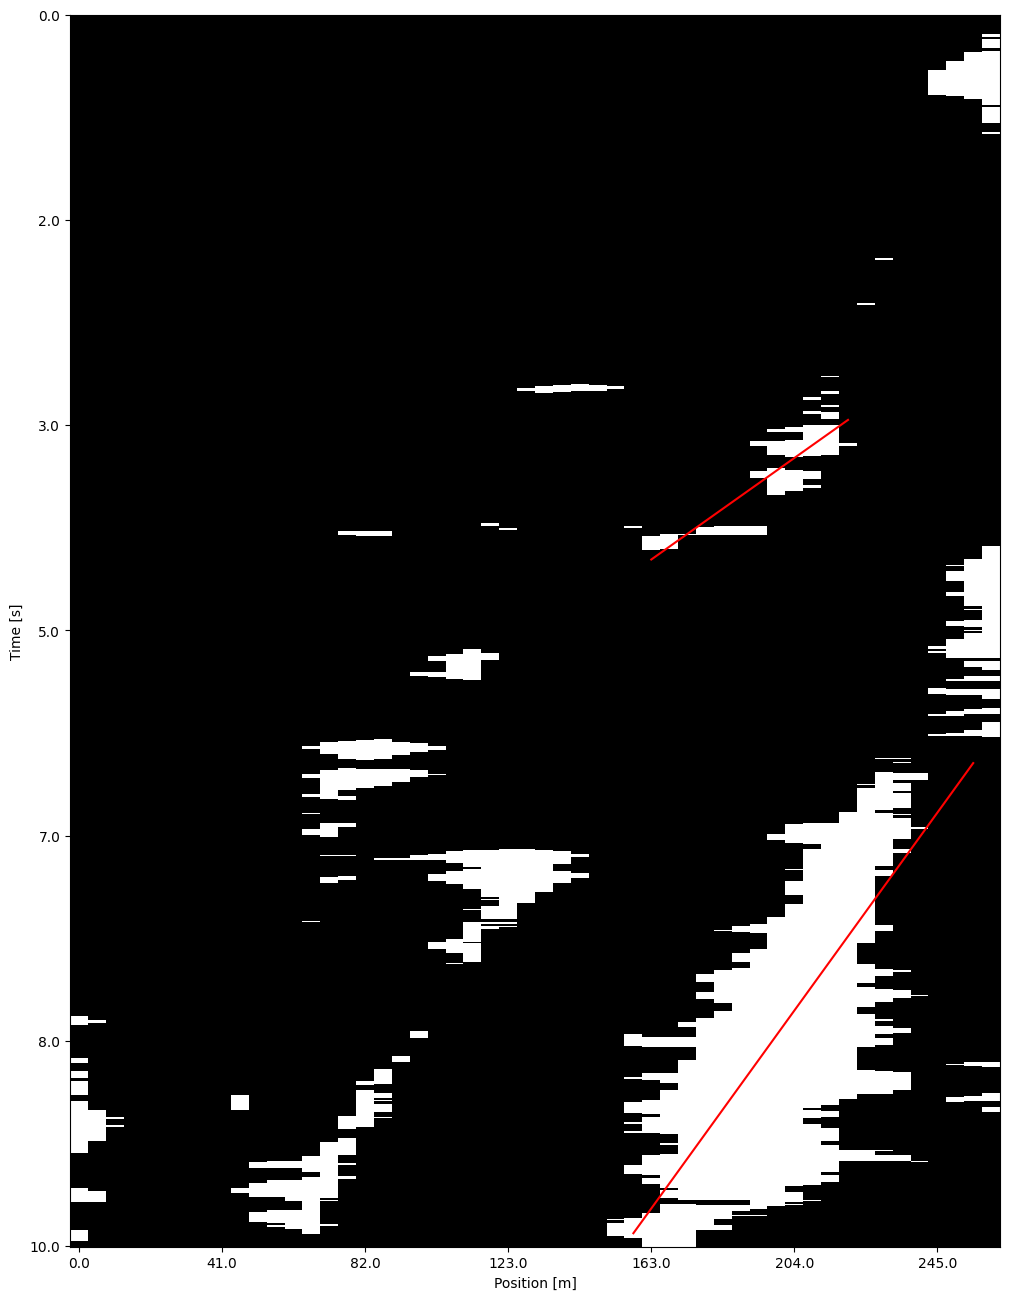

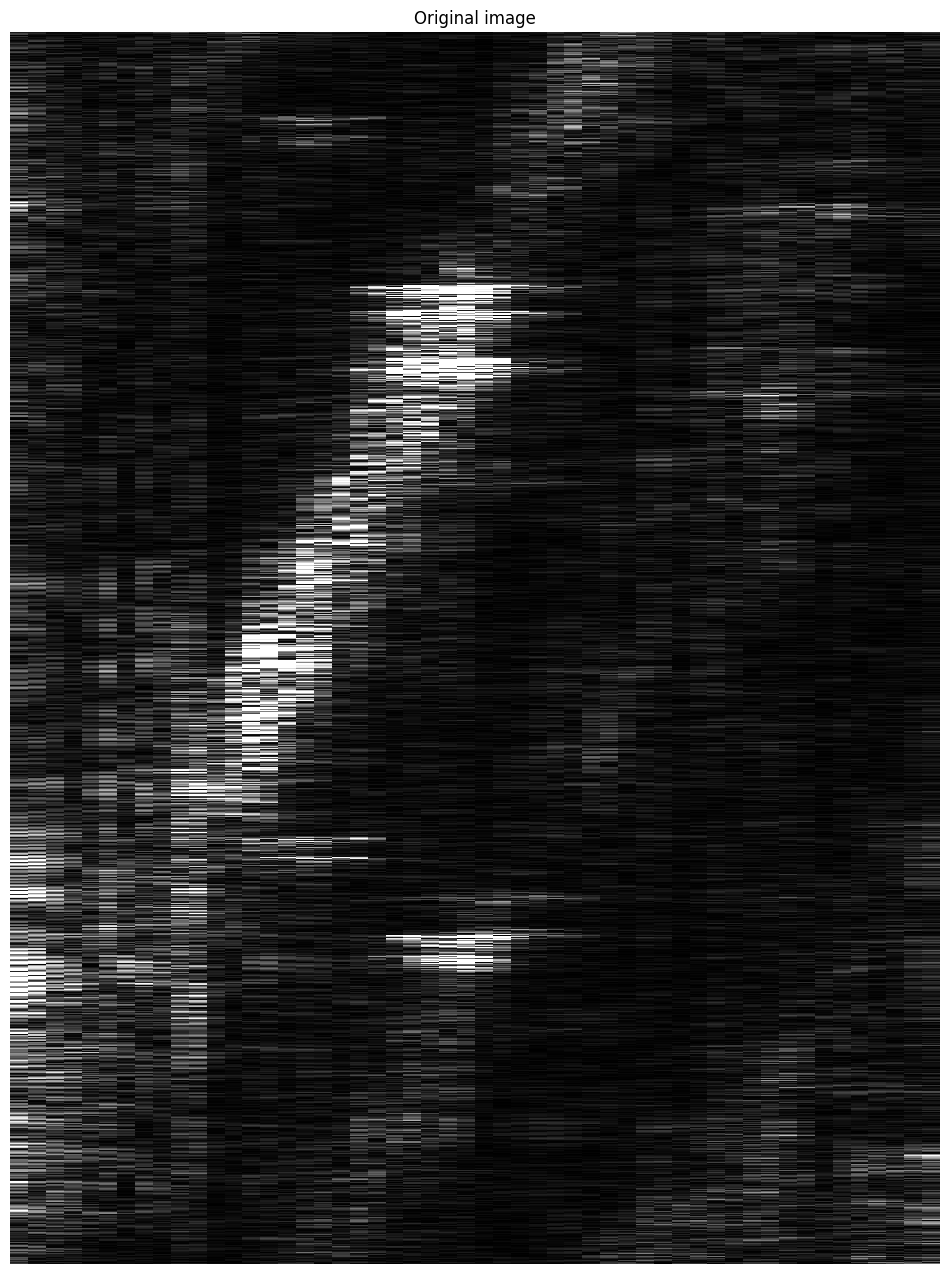

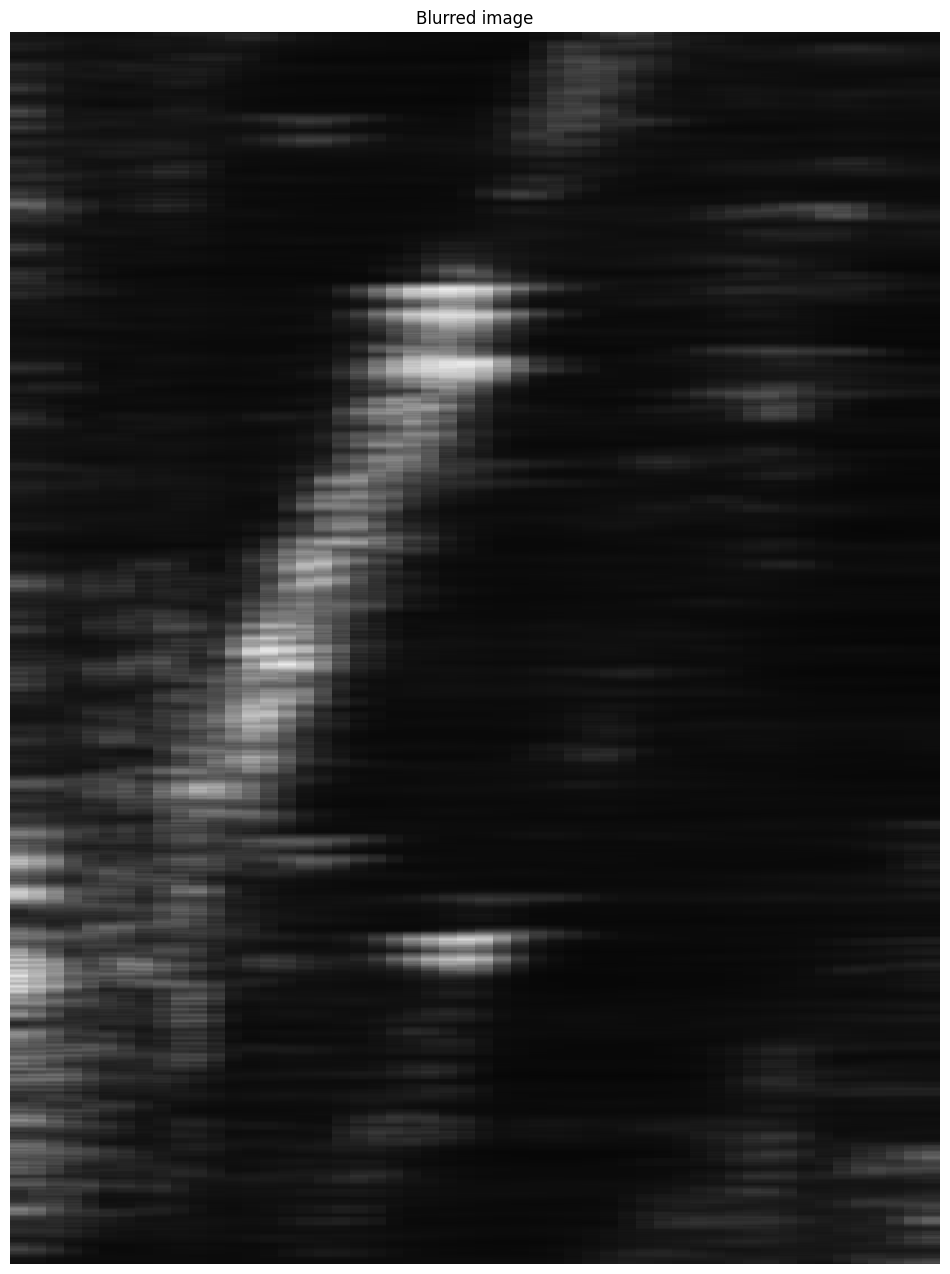

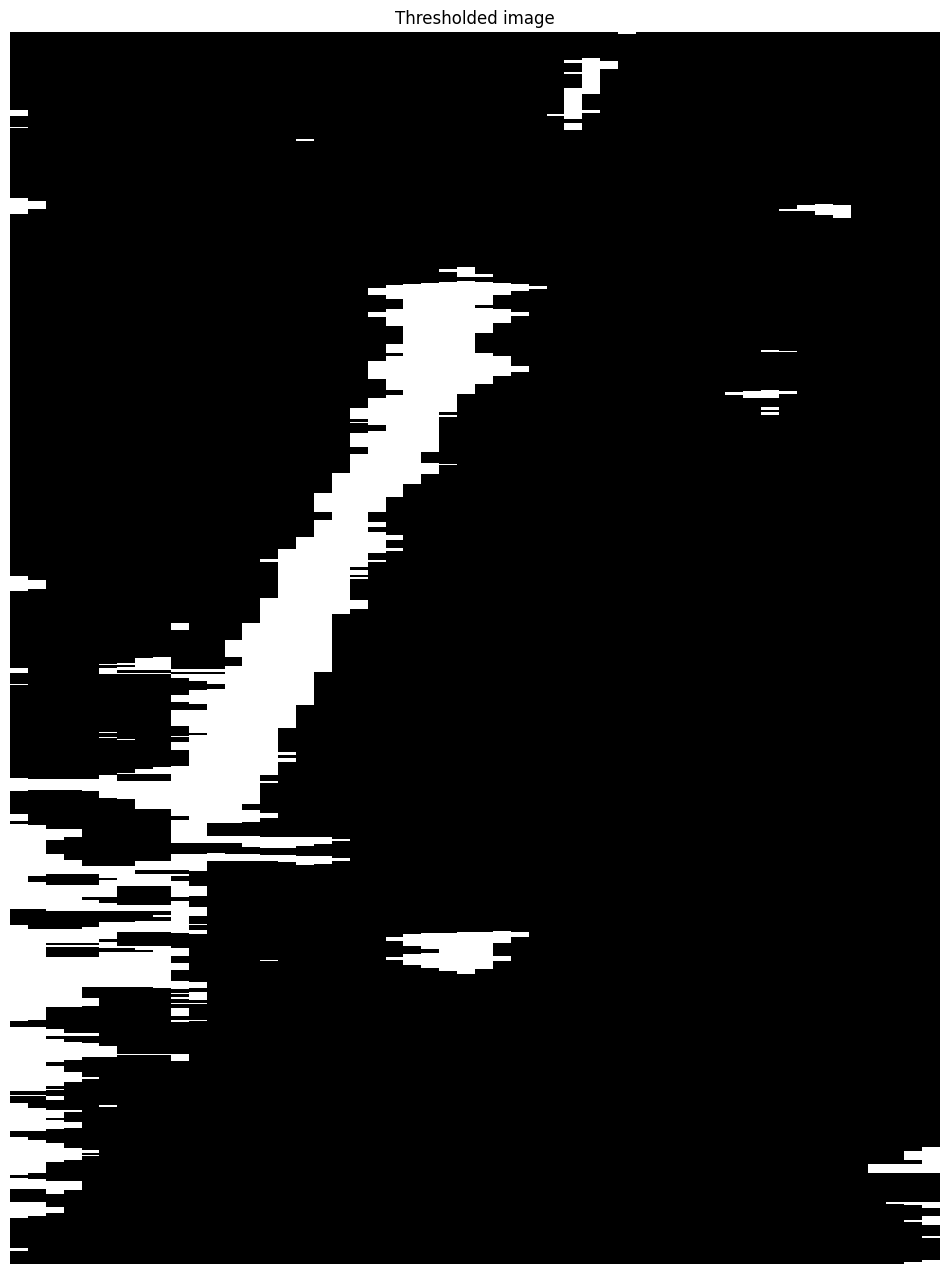

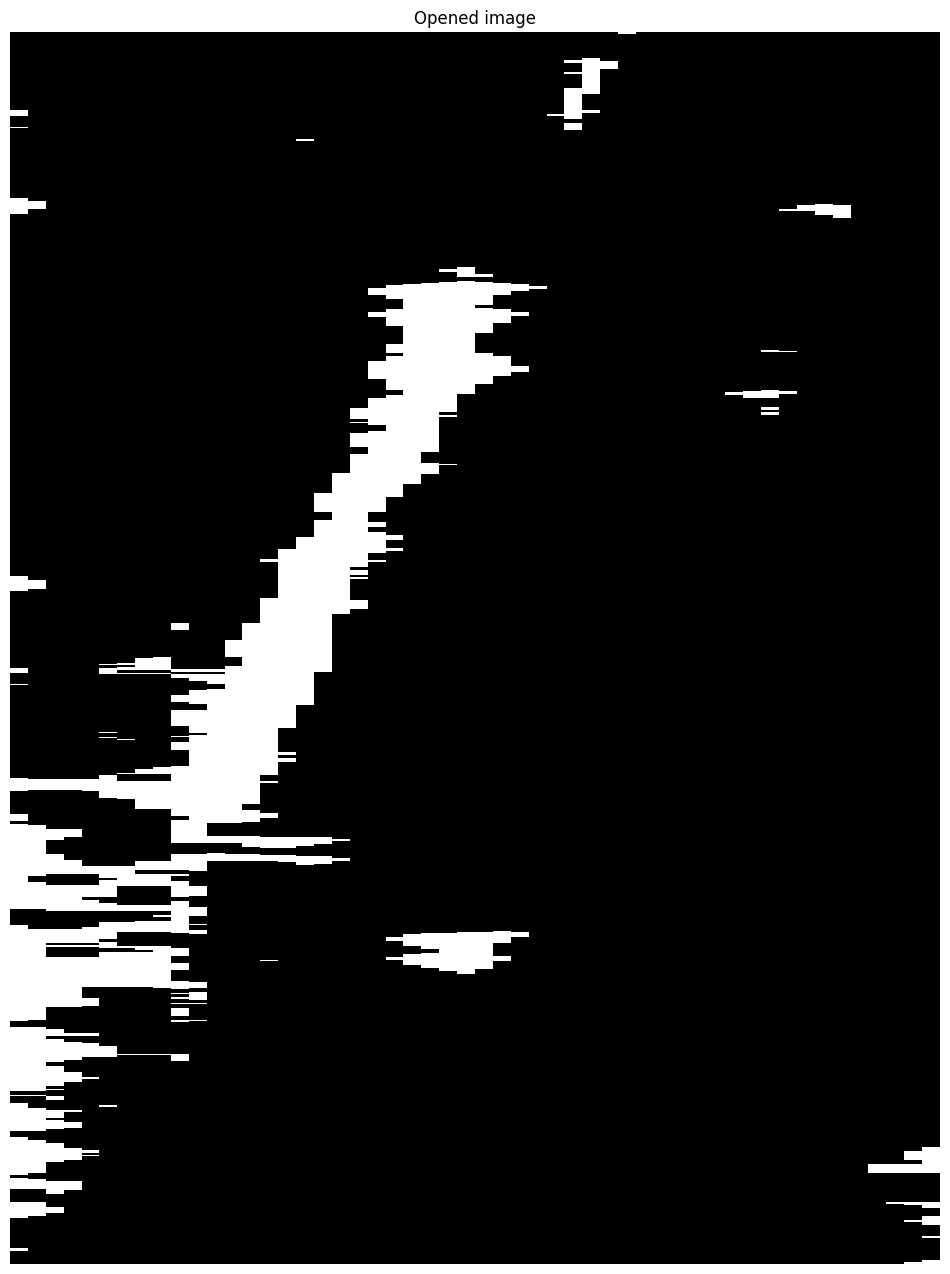

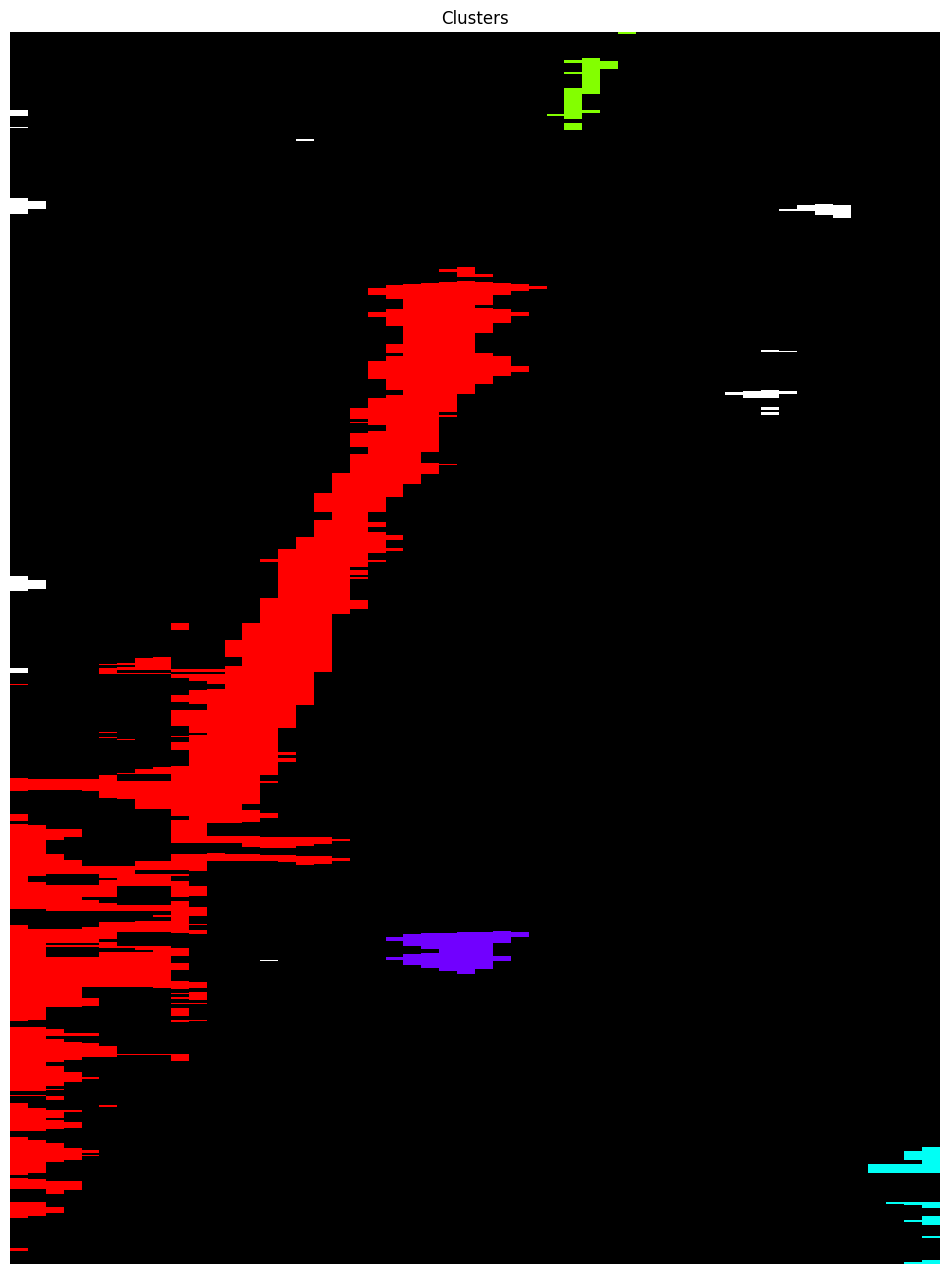

Detected velocity: 29.61 m/s (106.6 km/h)

Detected velocity: 22.27 m/s (80.17 km/h)

Discarded cluster 2 with R2=0.01454593470021559 (<0.5)
Discarded cluster 3 with R2=0.05154415008192659 (<0.5)


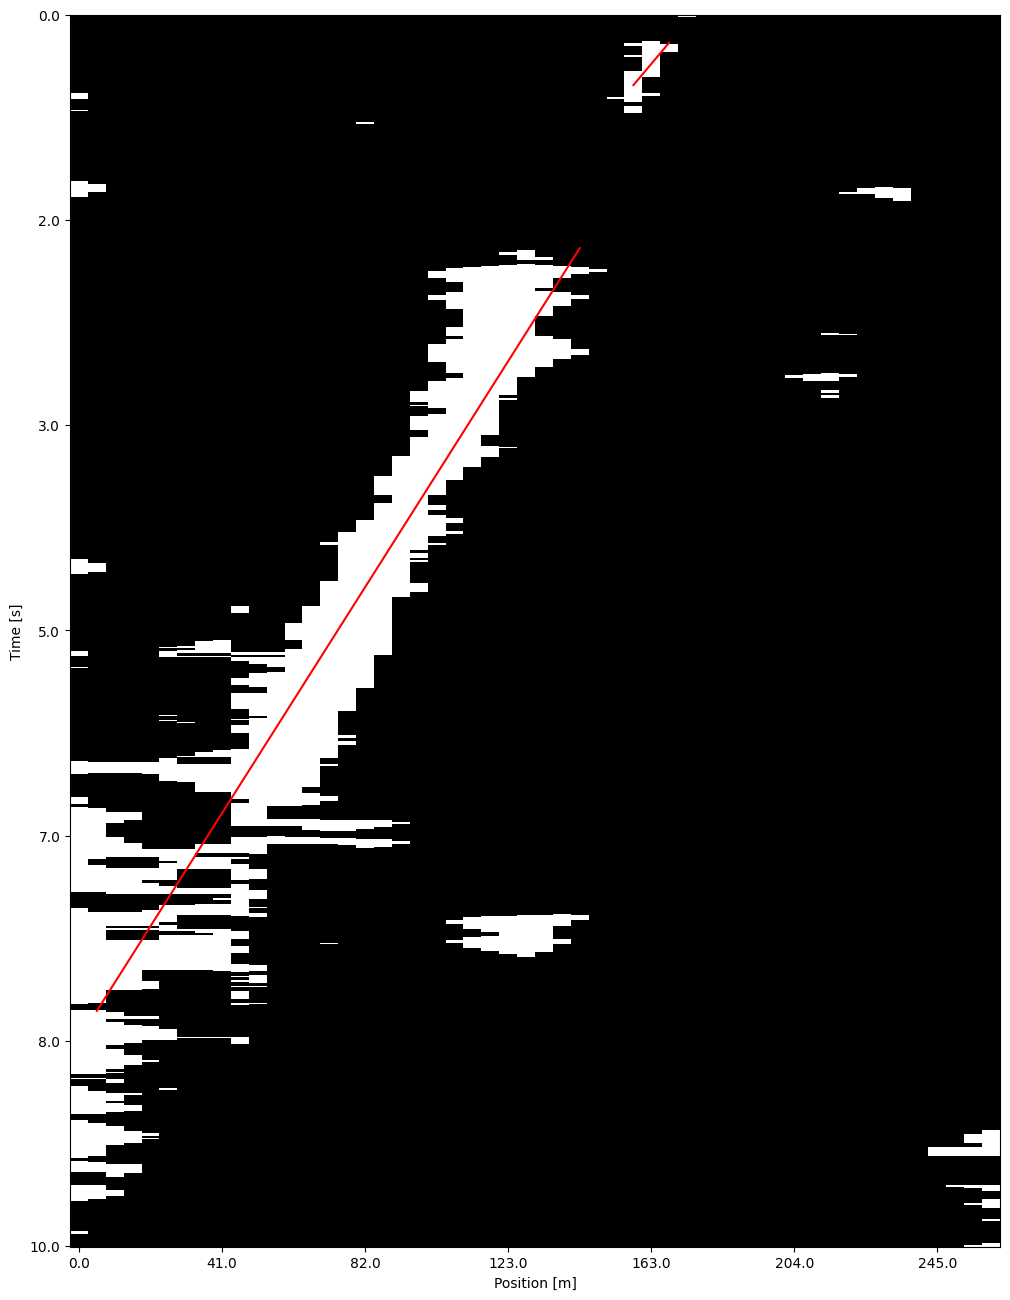

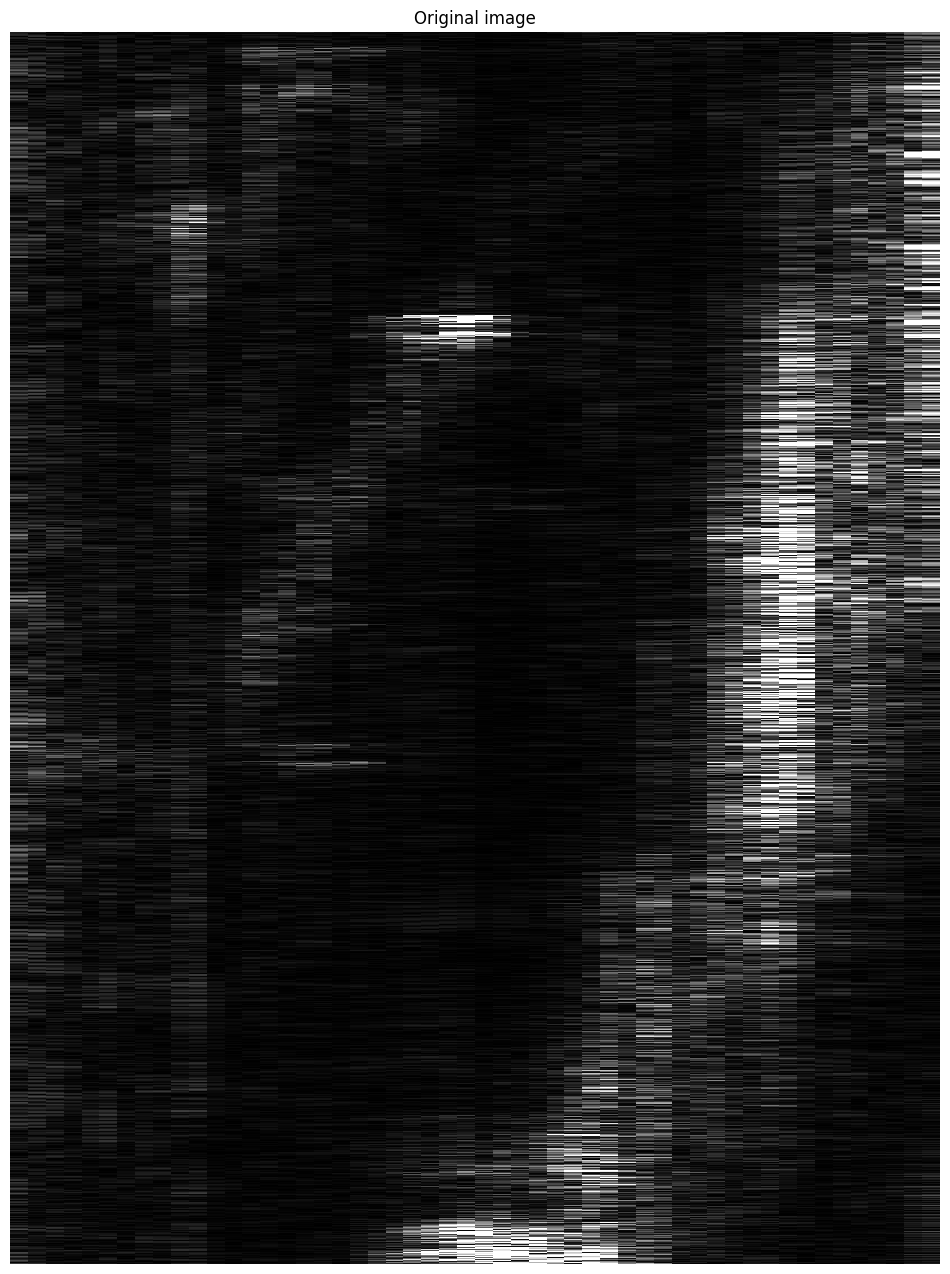

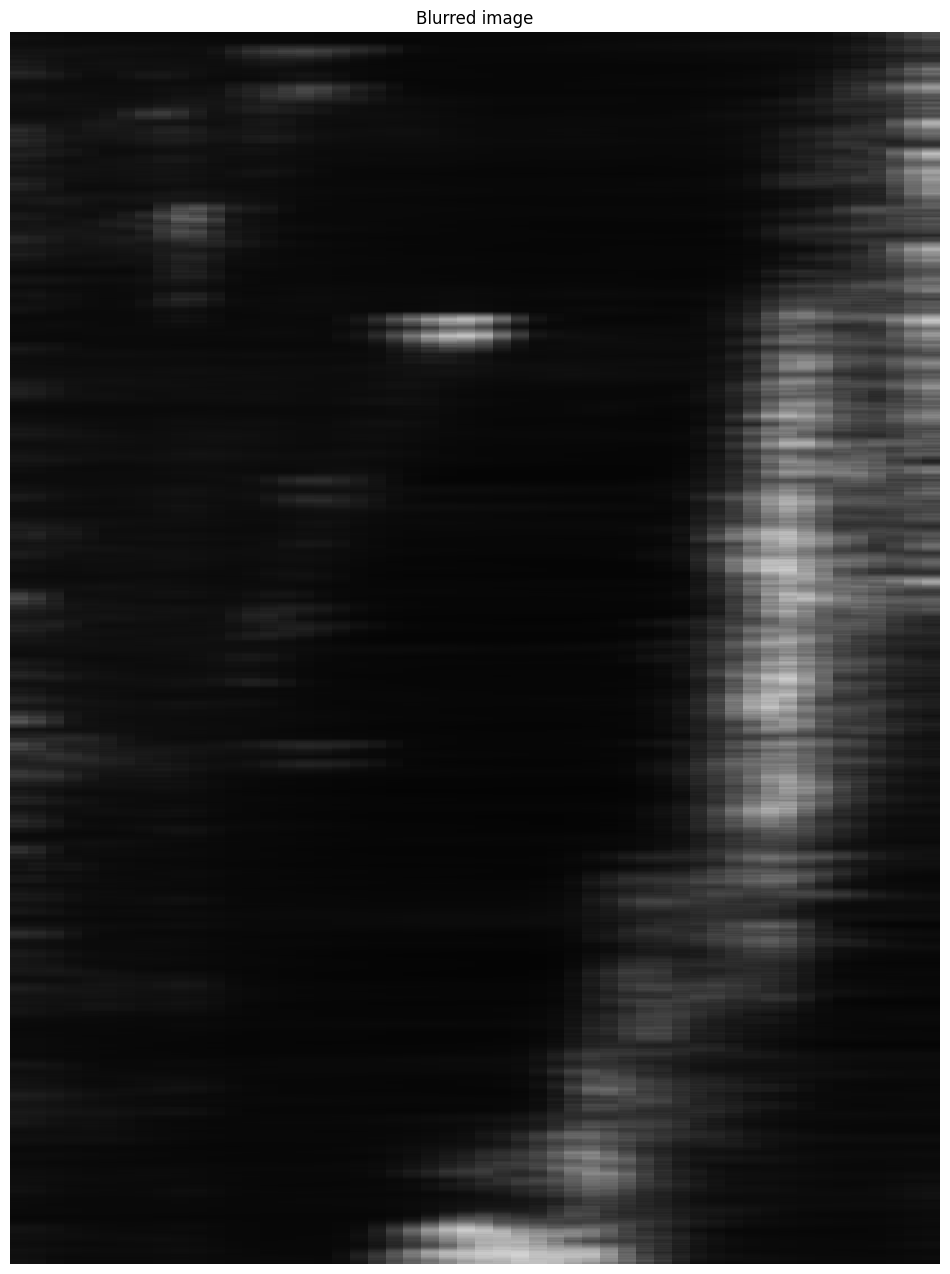

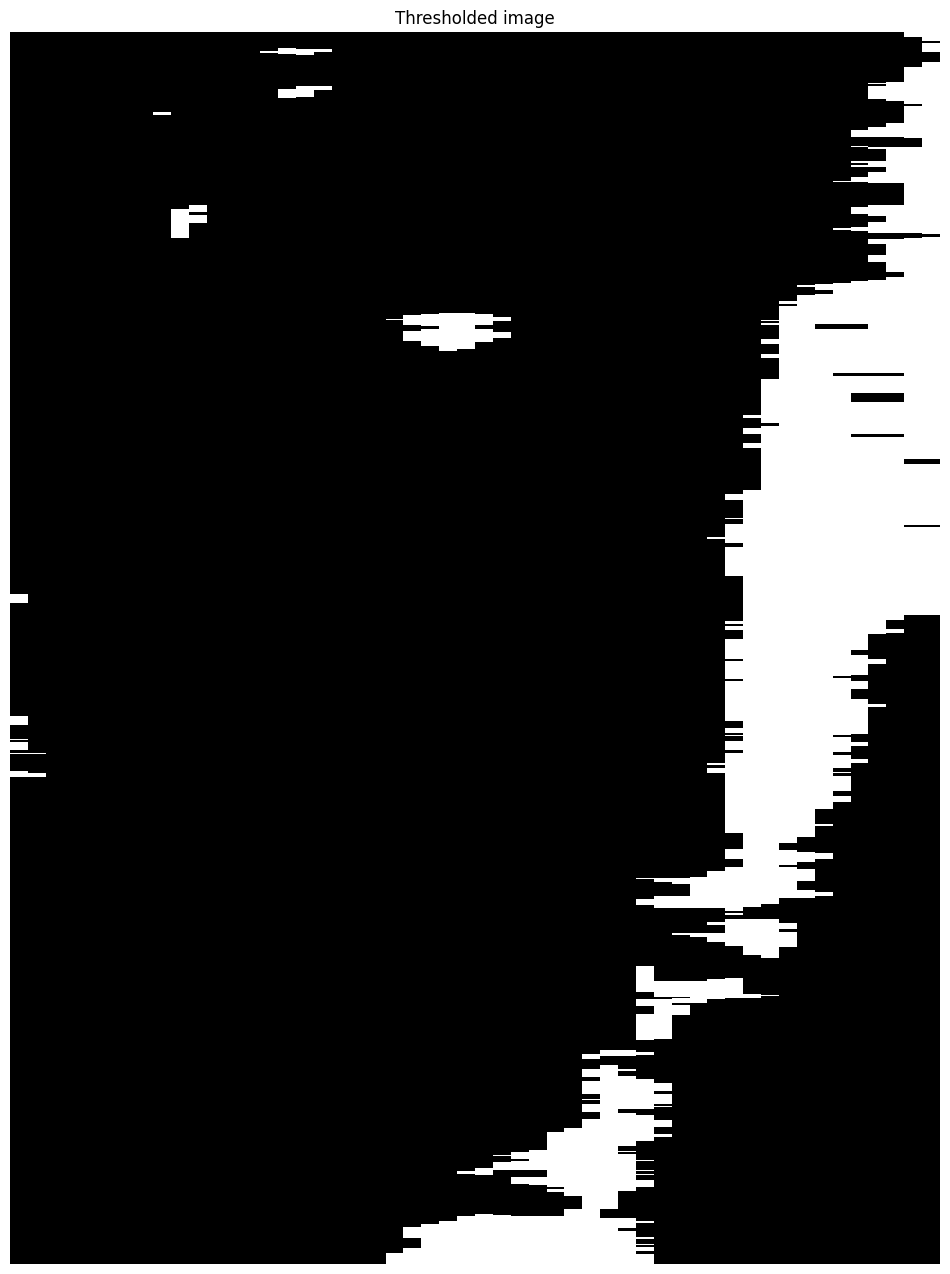

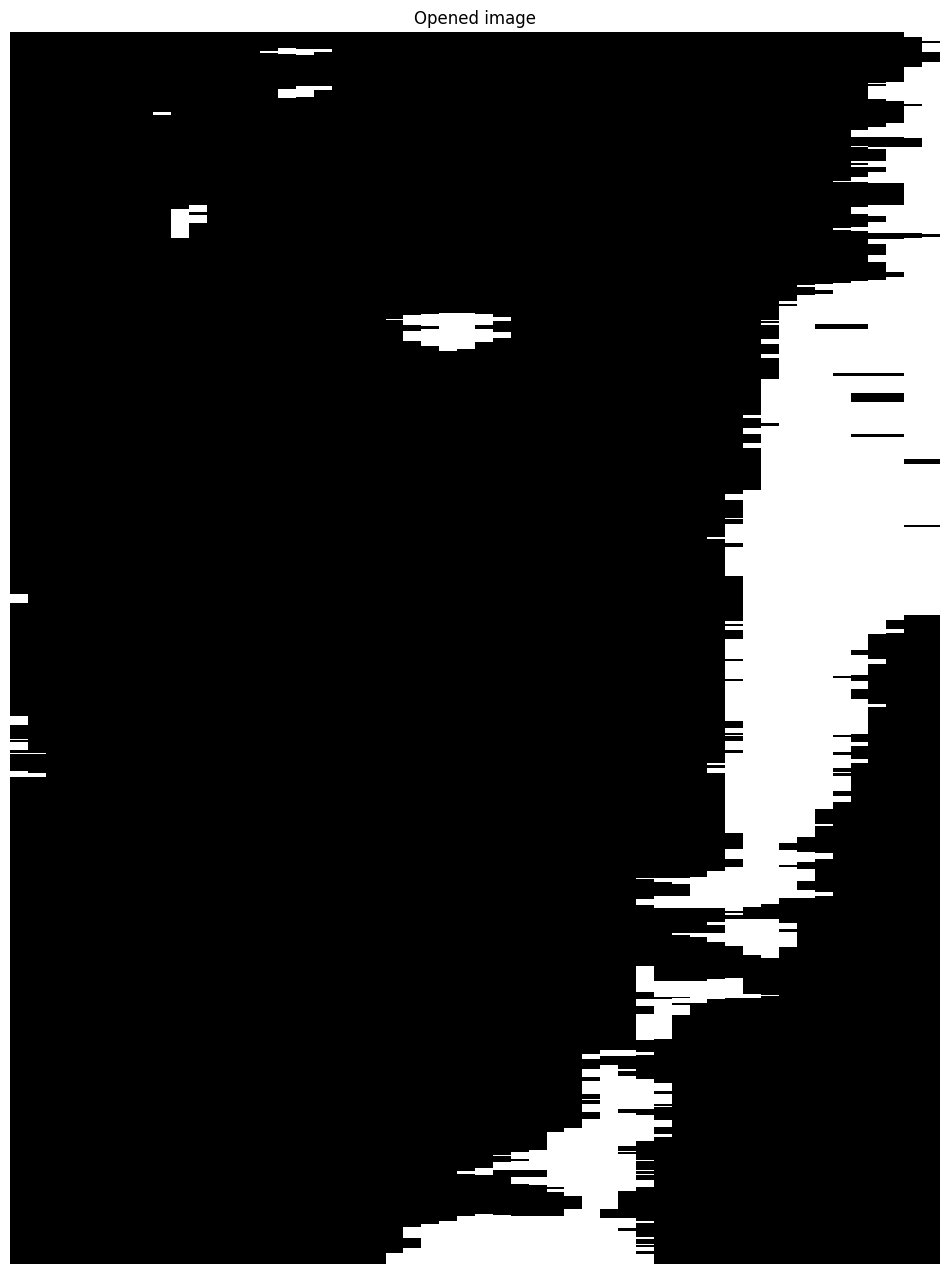

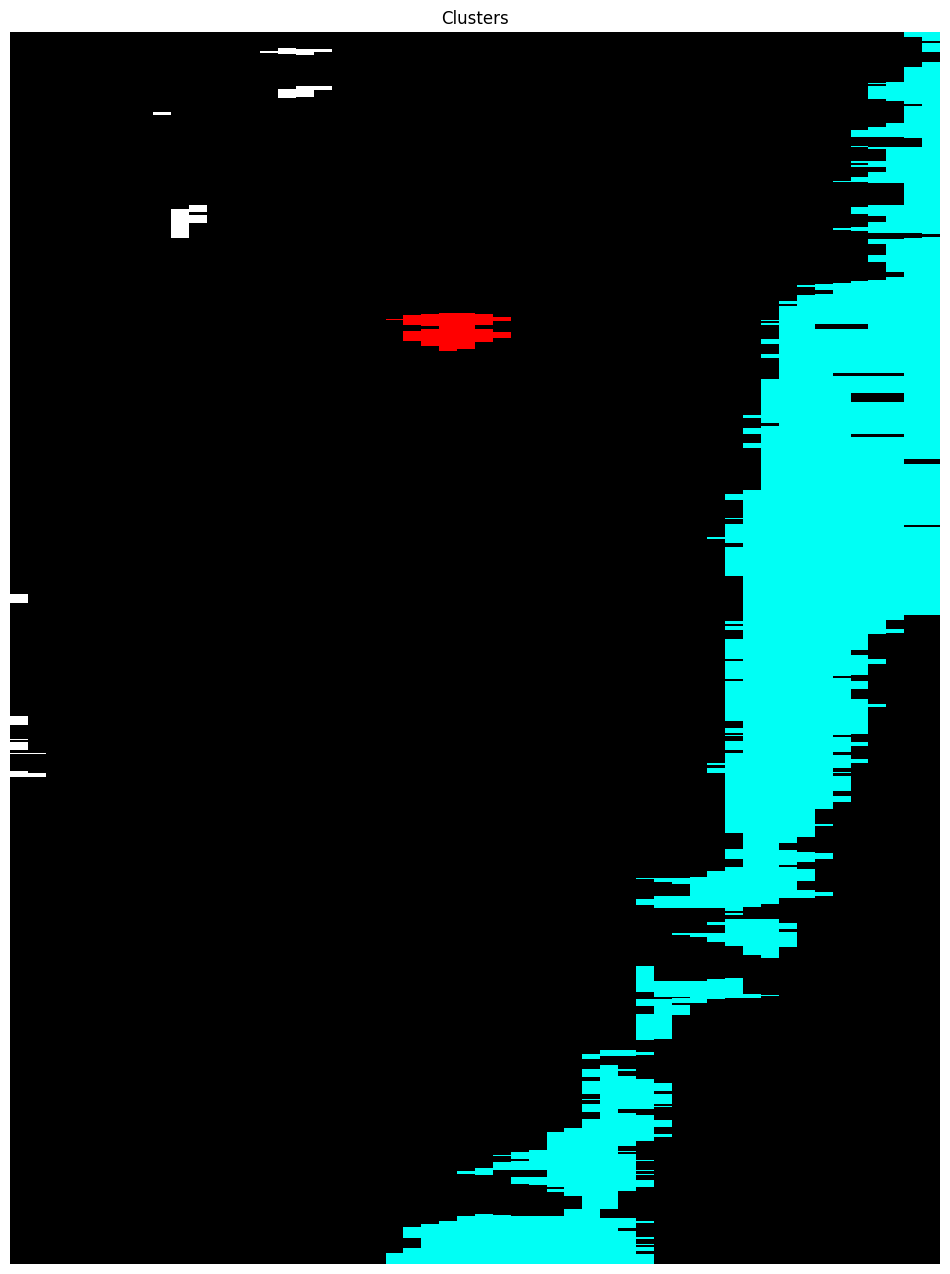

Detected velocity: 15.23 m/s (54.83 km/h)

Discarded cluster 1 with R2=9.324531762611166e-06 (<0.5)


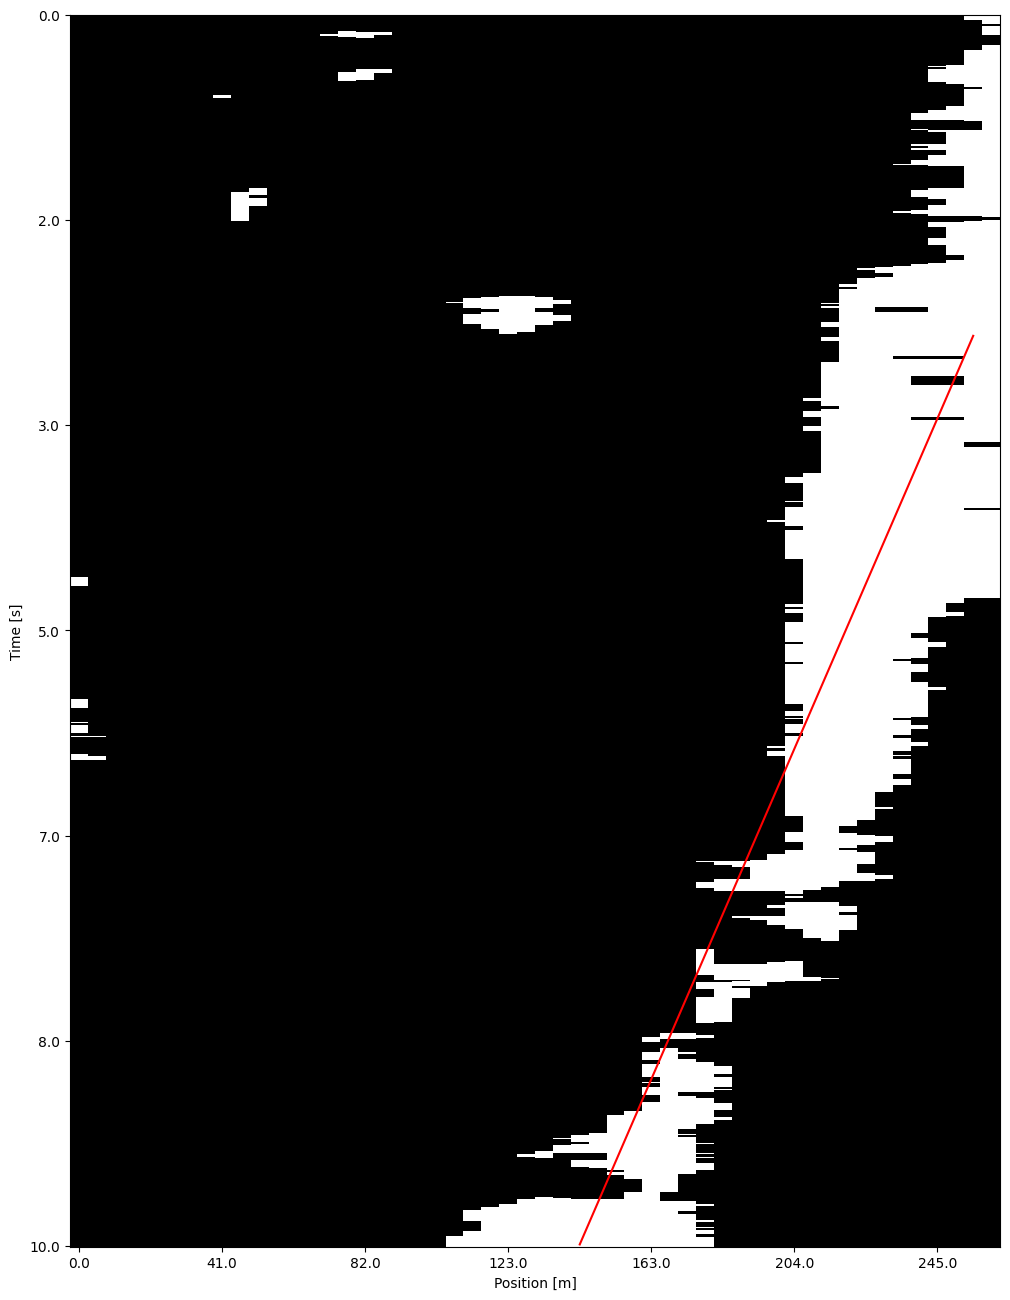

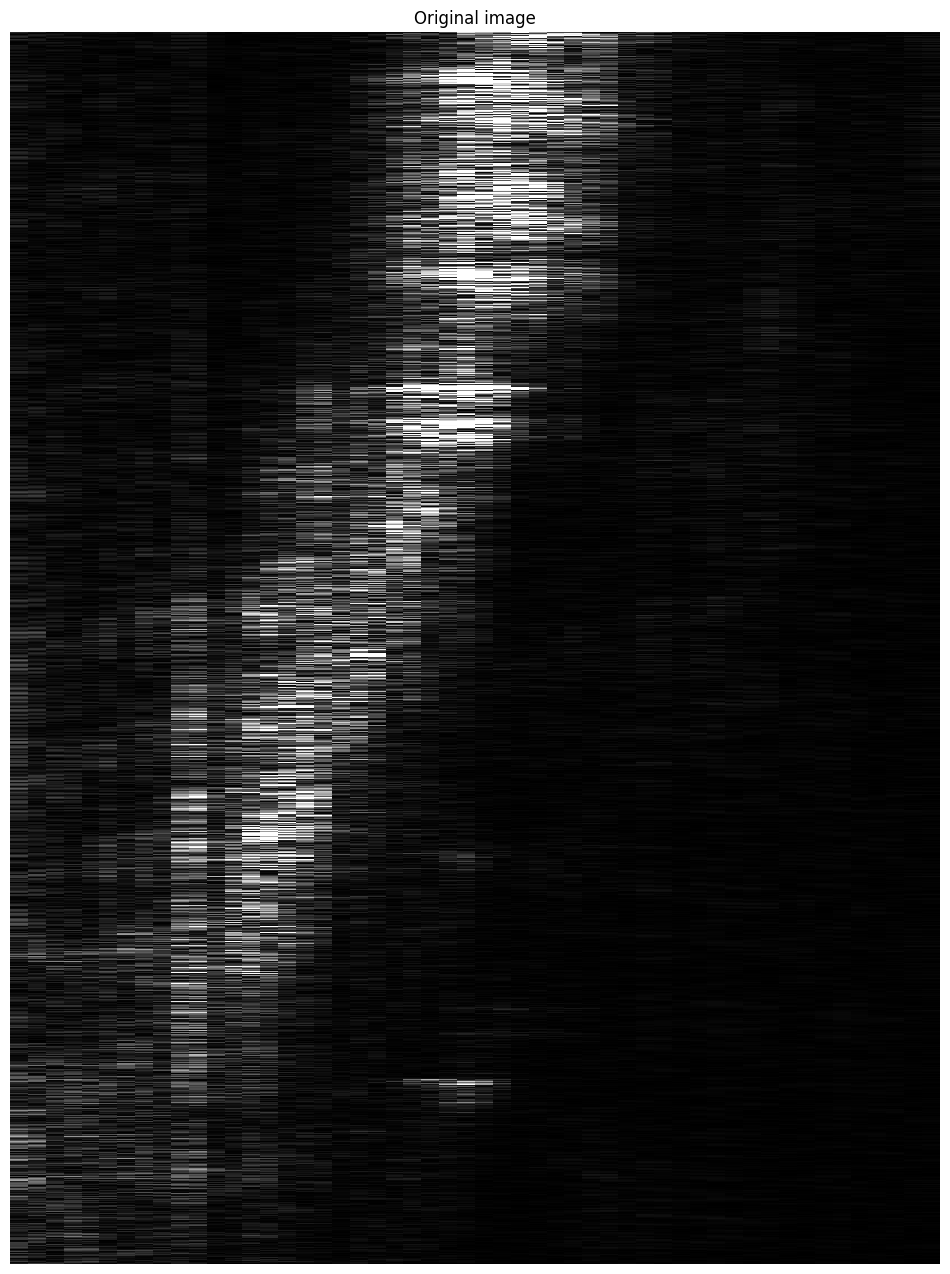

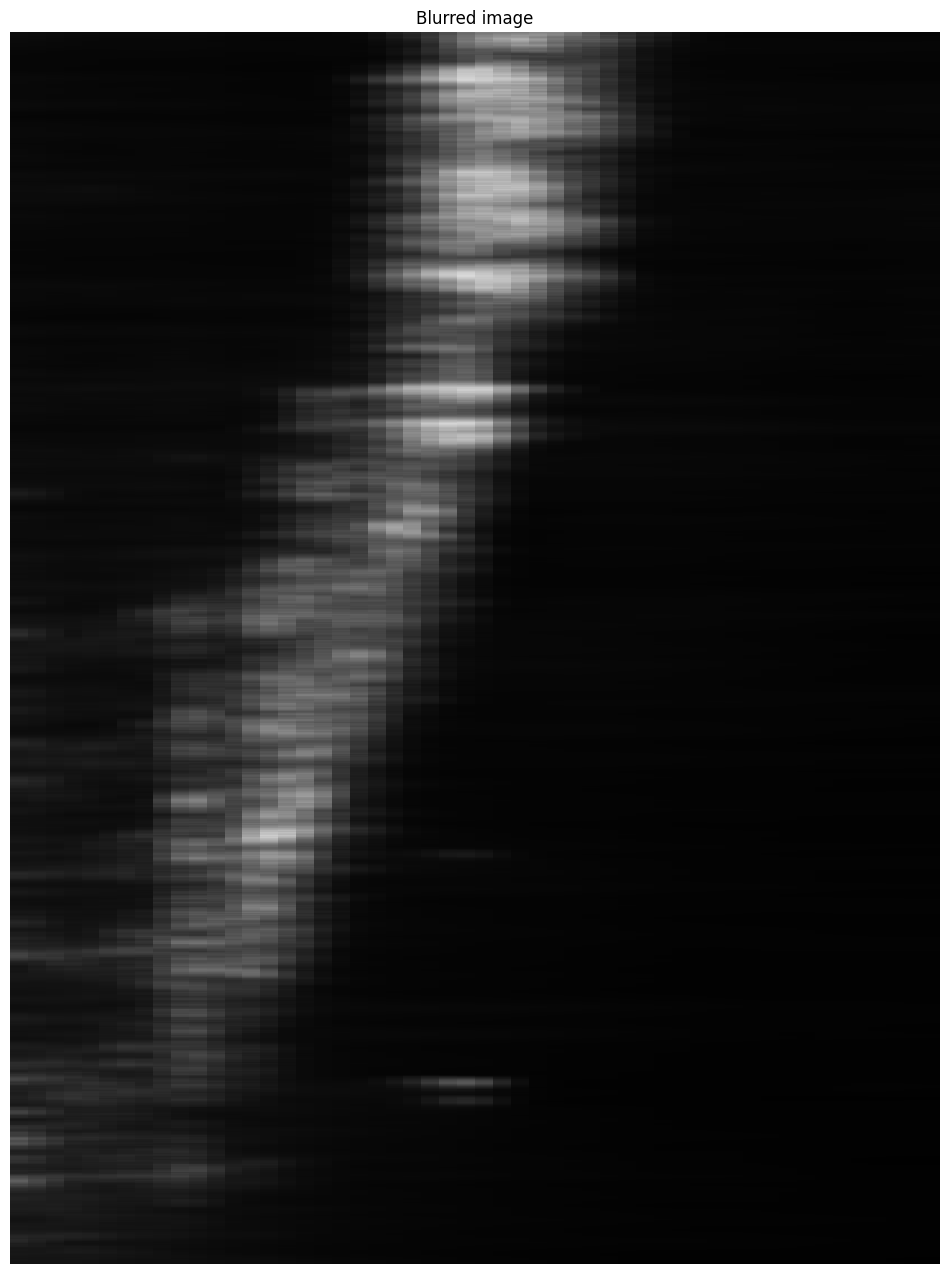

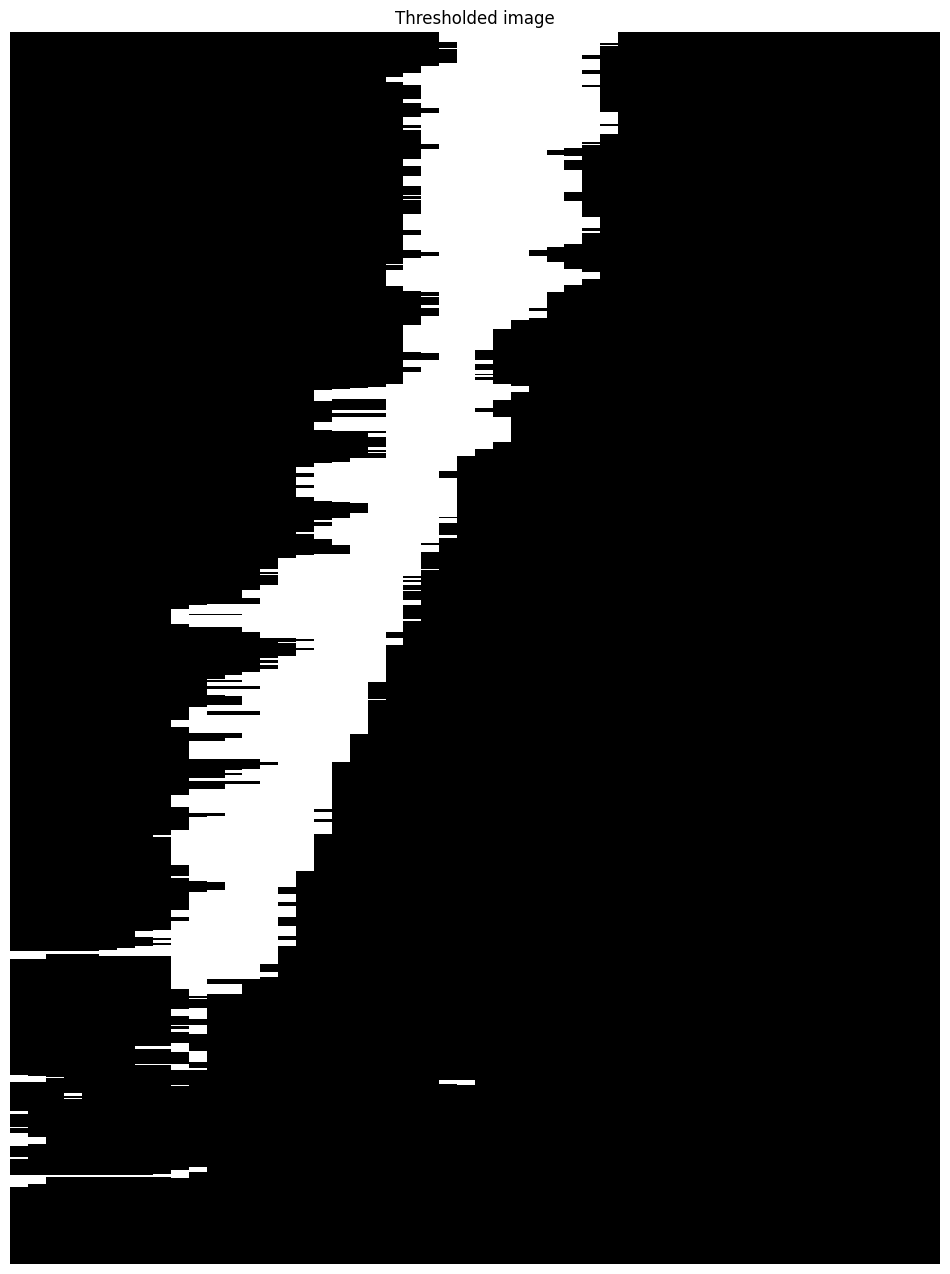

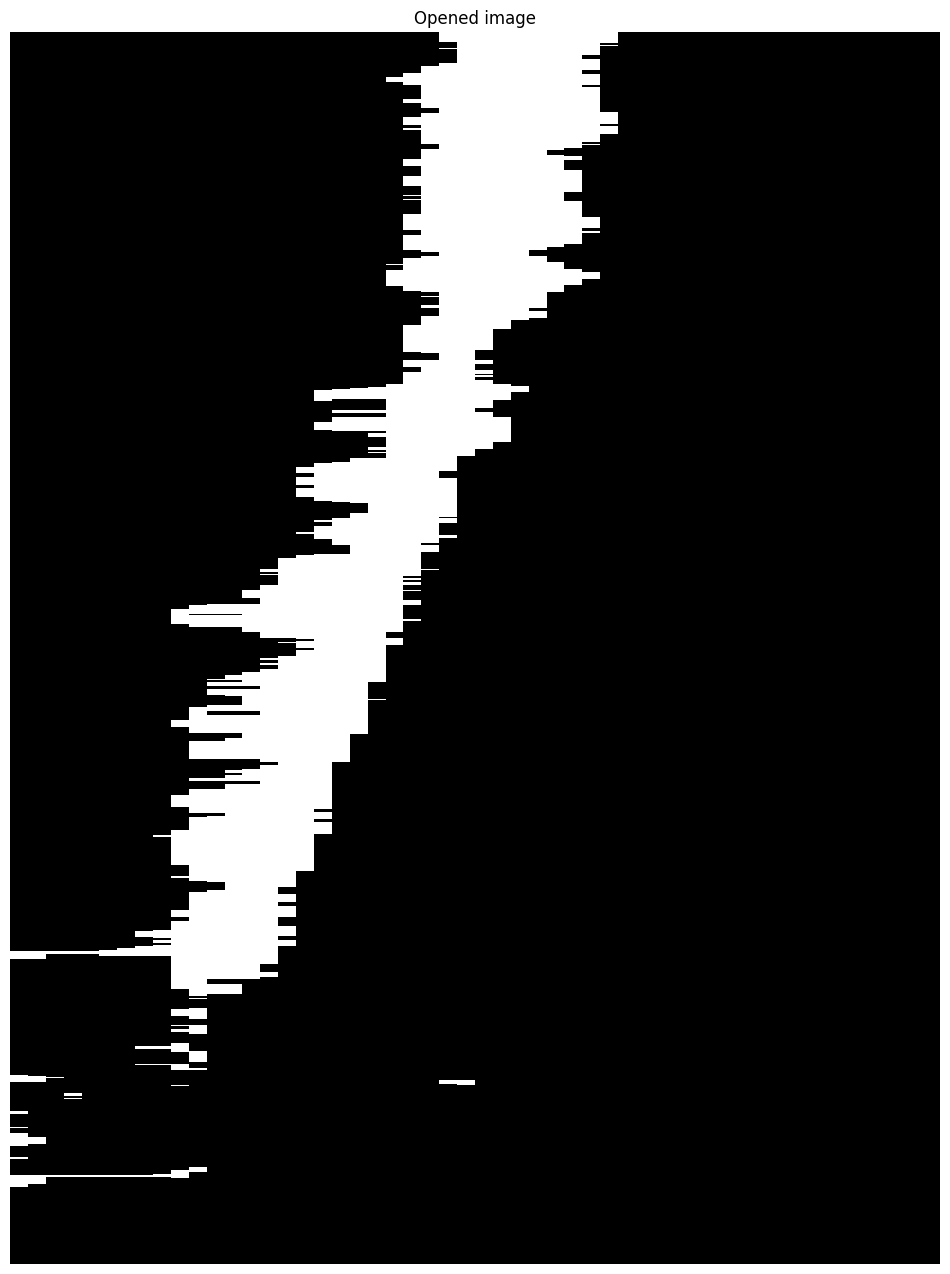

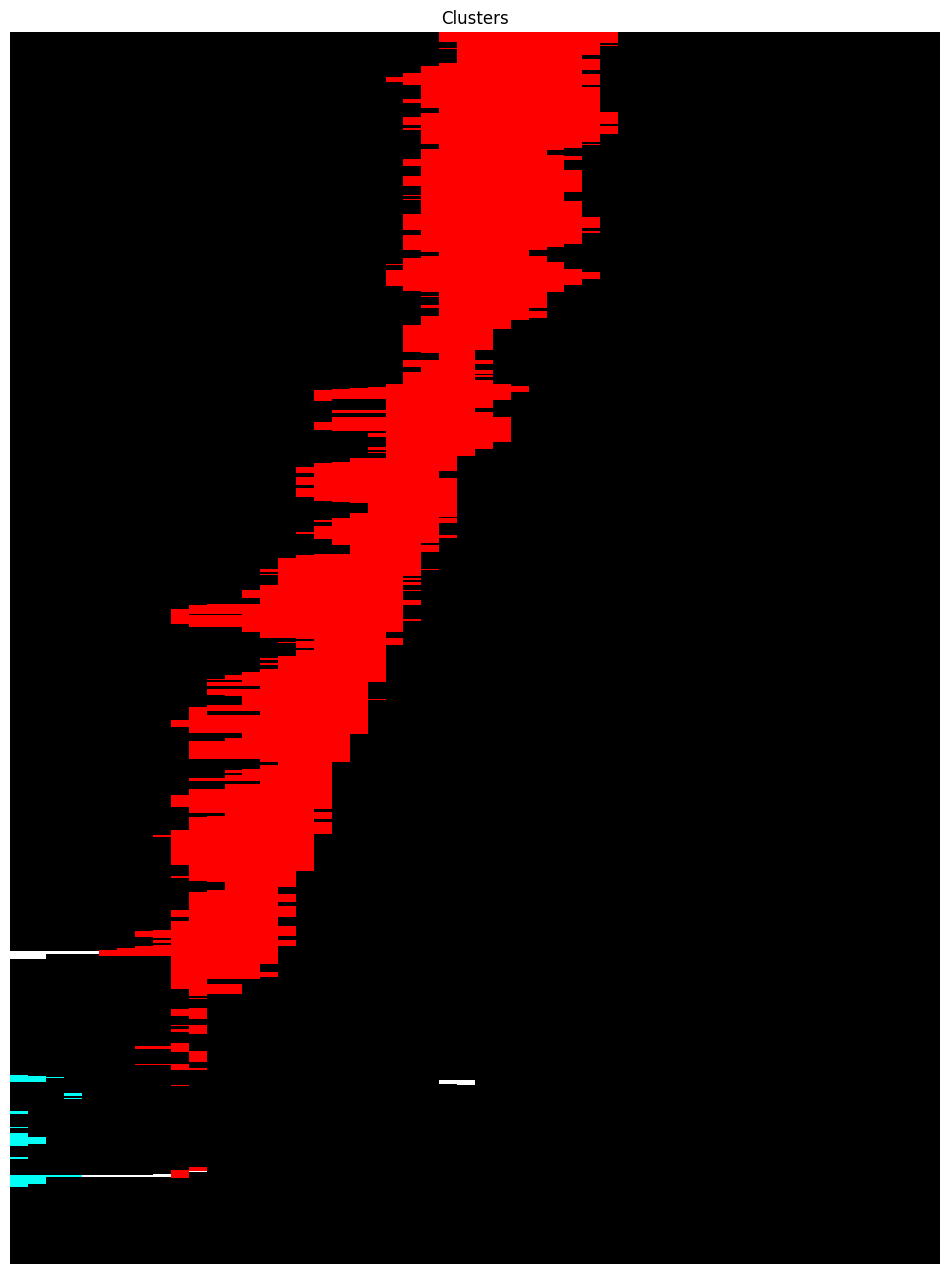

Detected velocity: 15.8 m/s (56.88 km/h)

Discarded cluster 1 with R2=0.01213268972527859 (<0.5)


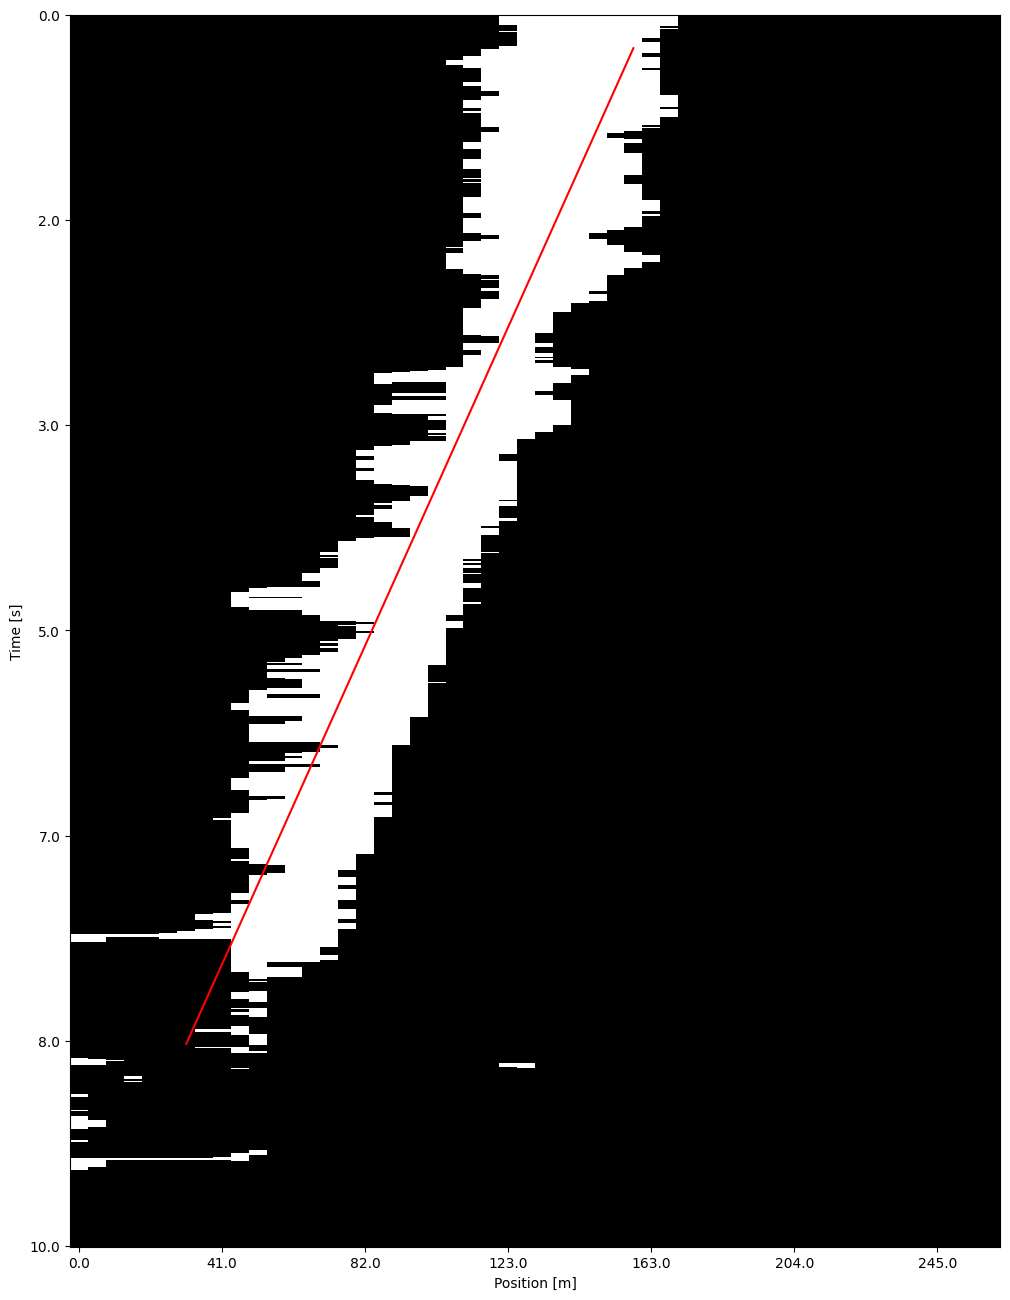

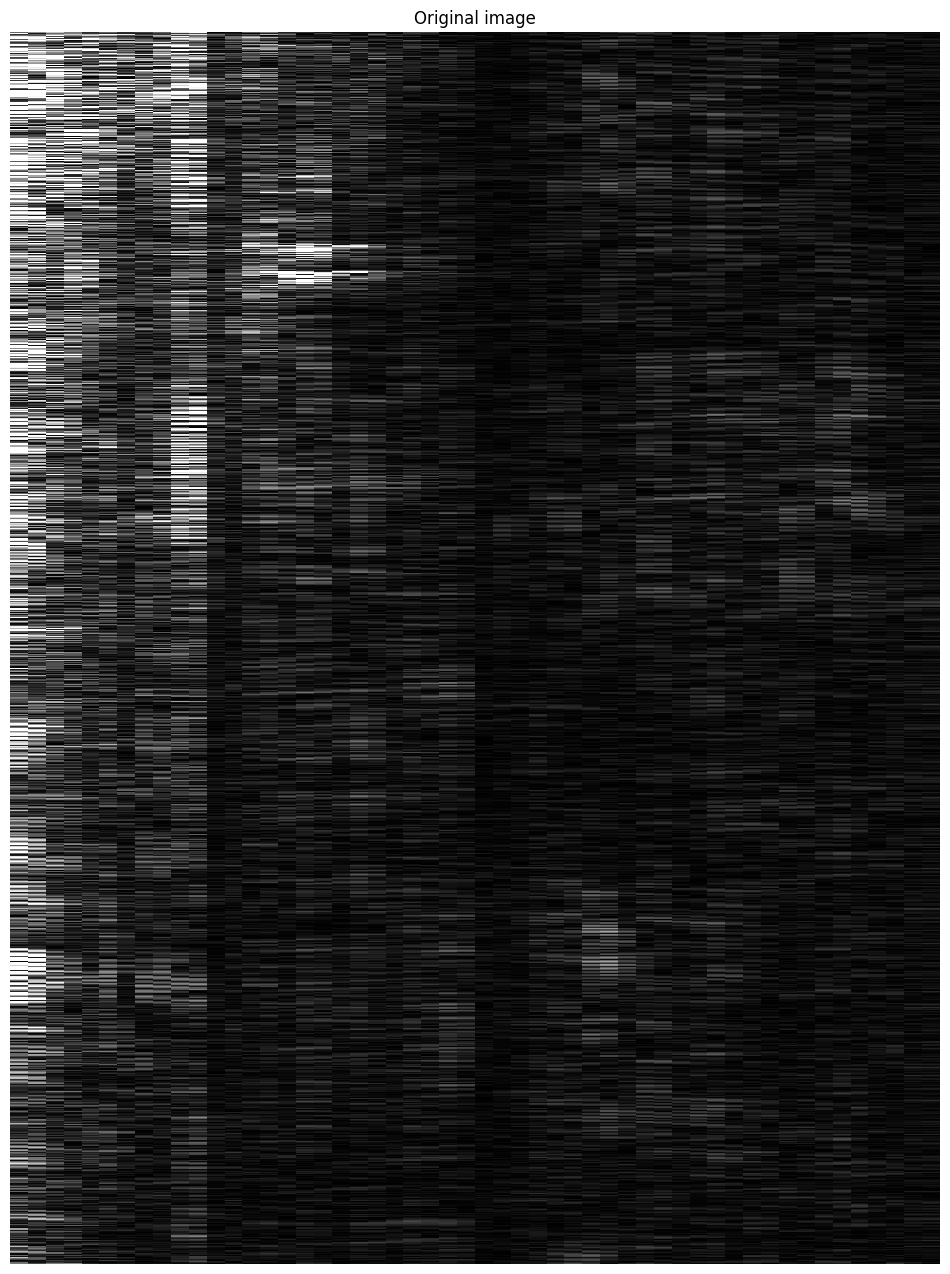

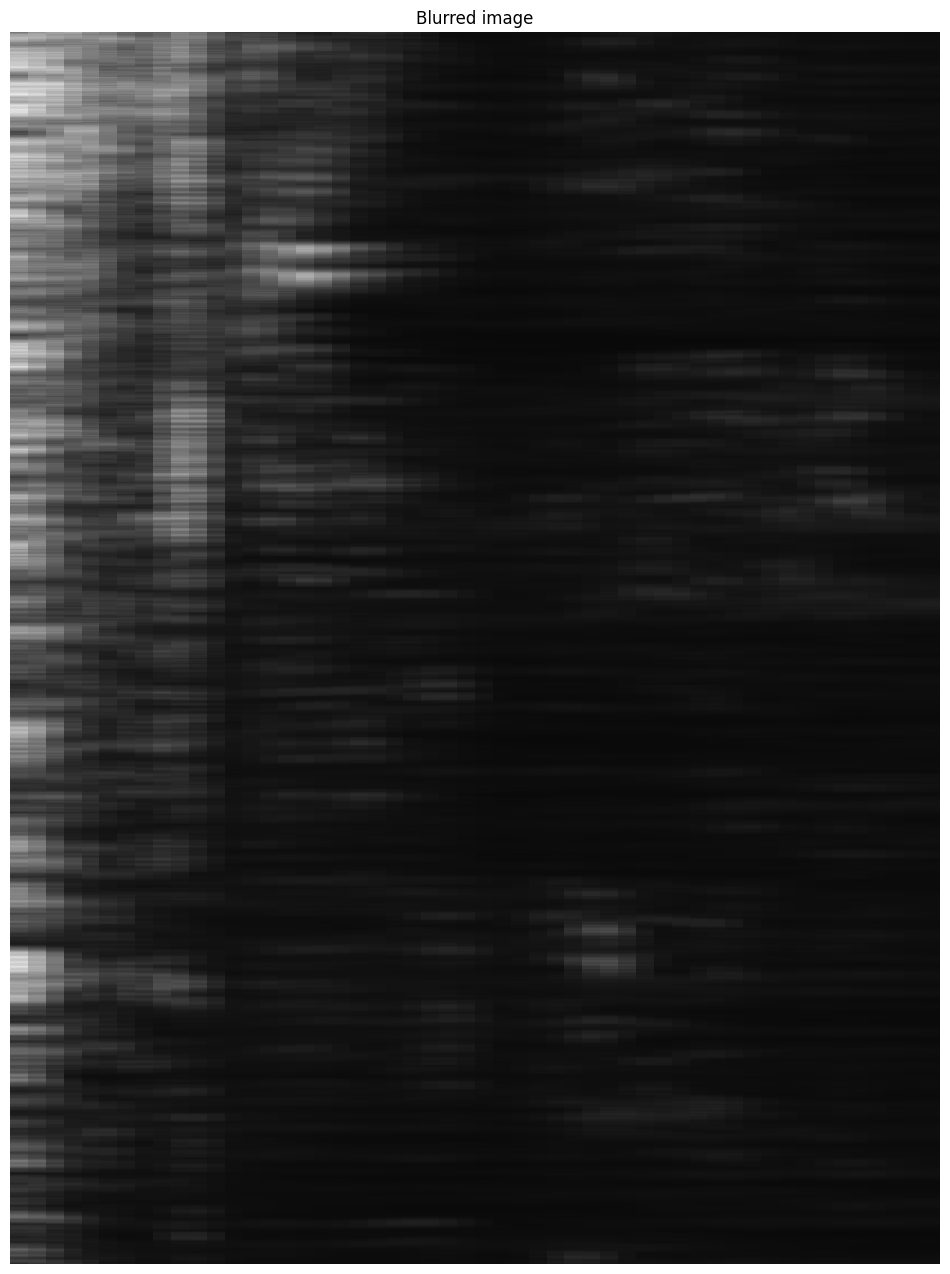

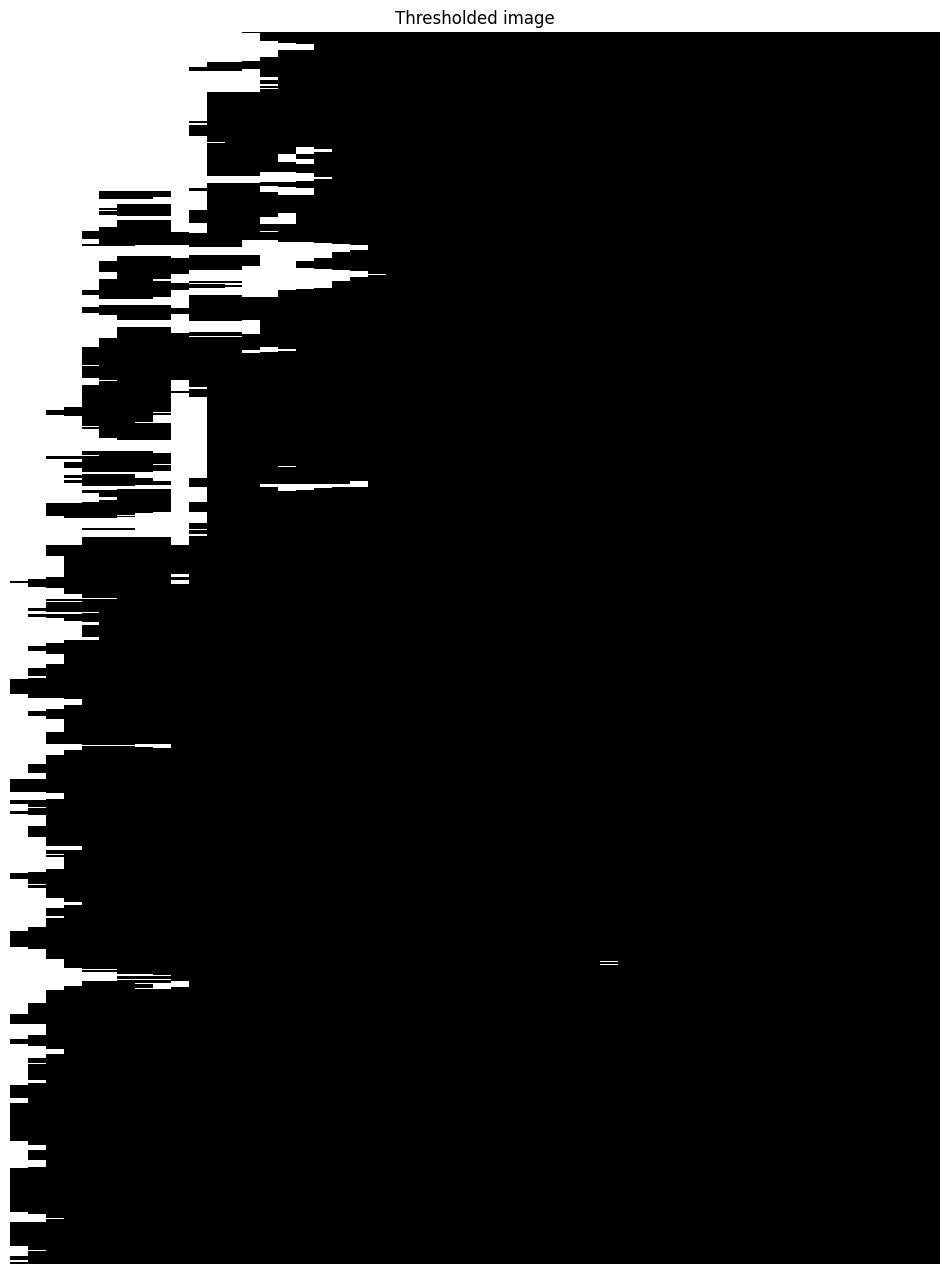

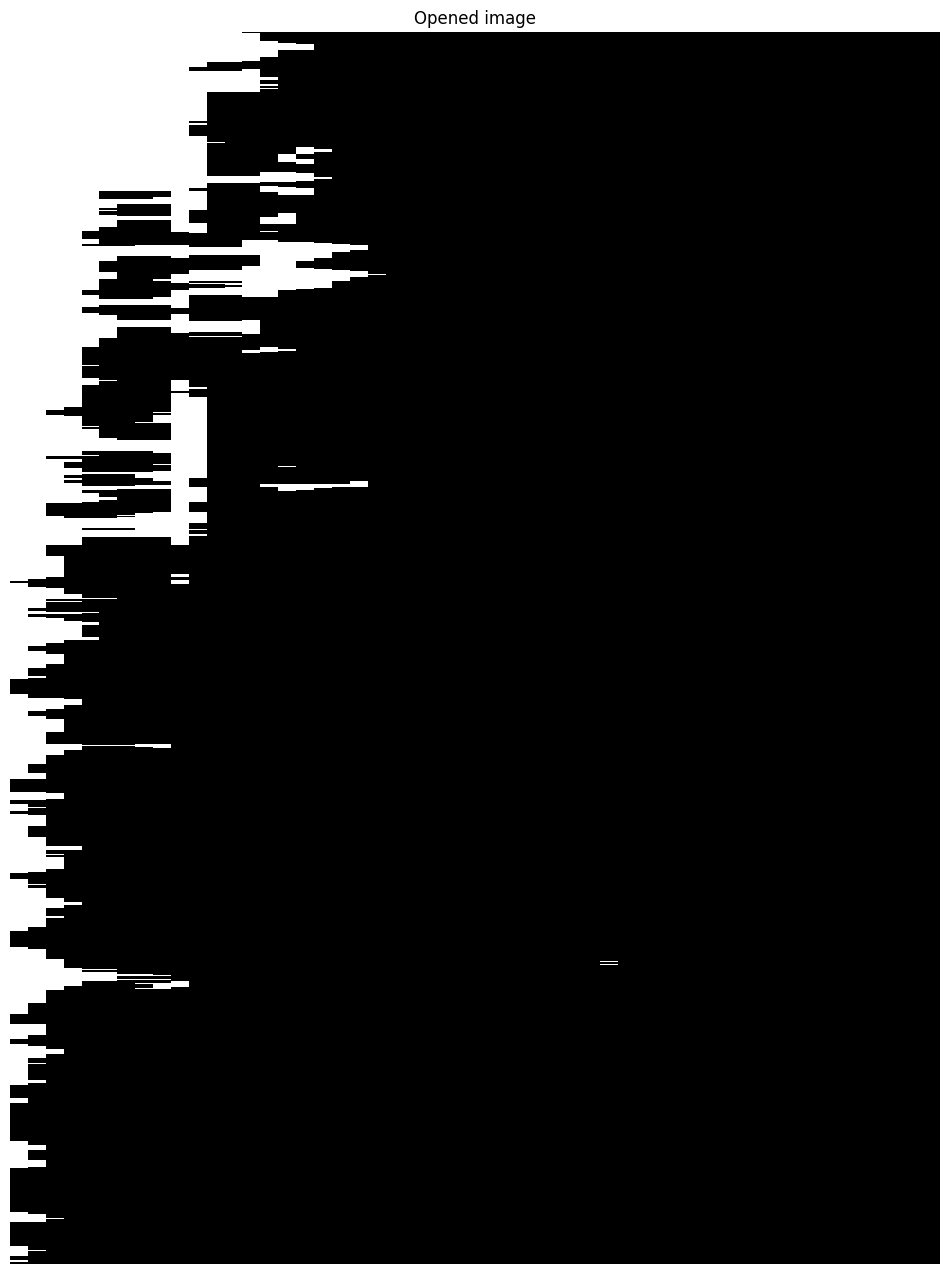

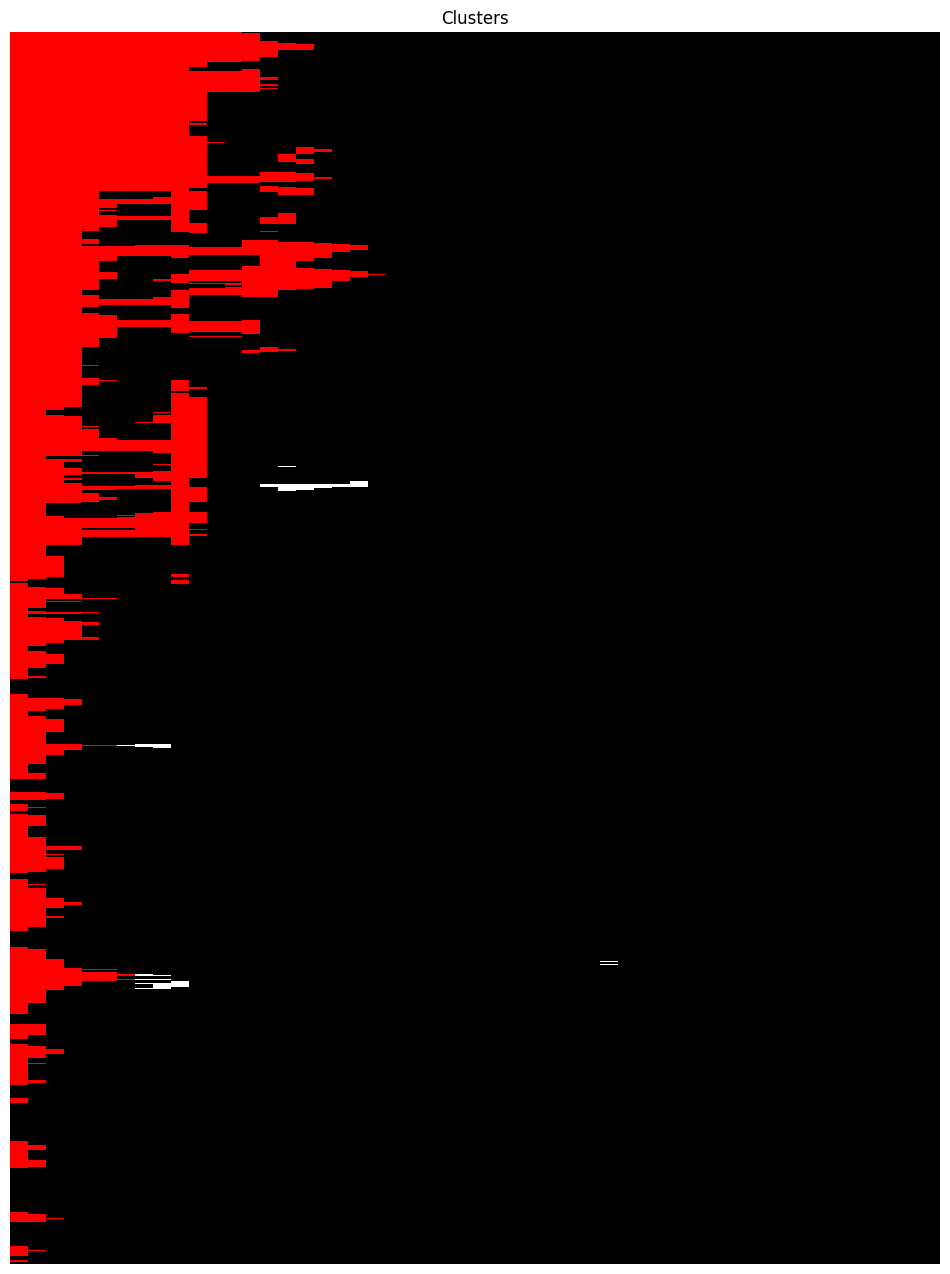

Discarded cluster 0 with R2=0.1715937918258551 (<0.5)


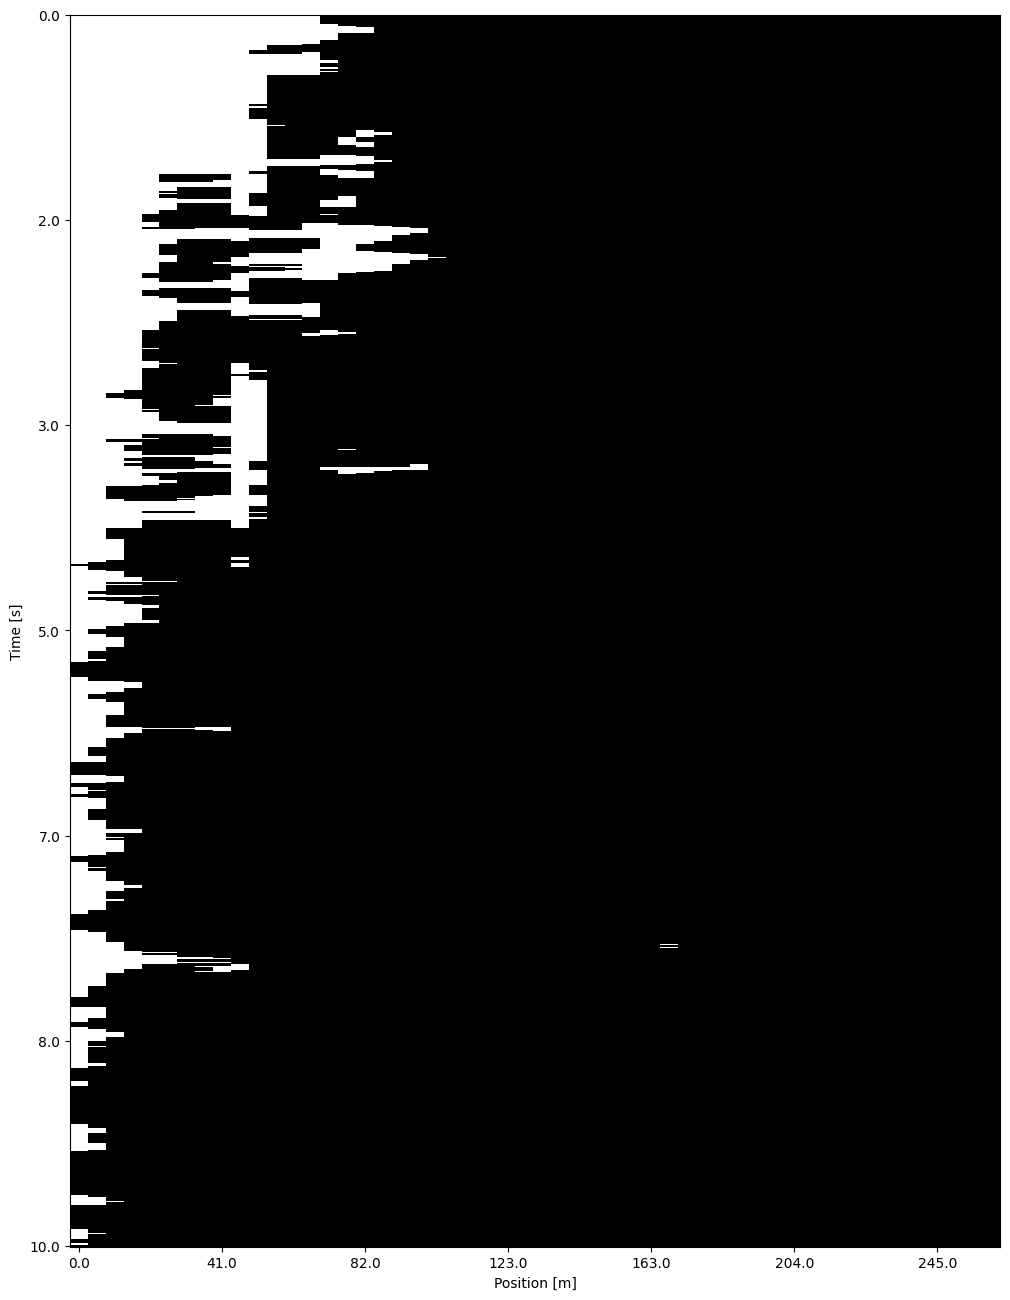

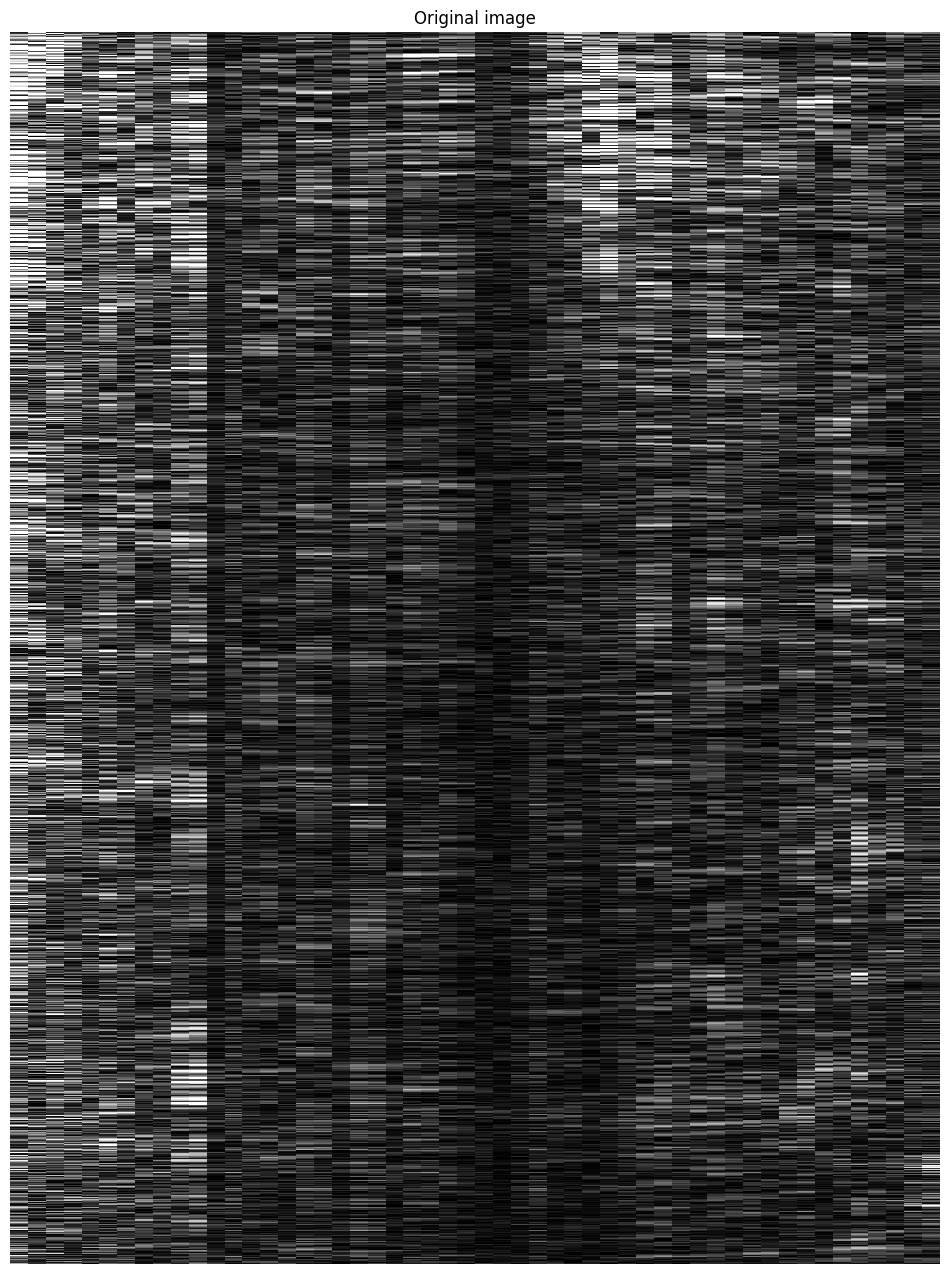

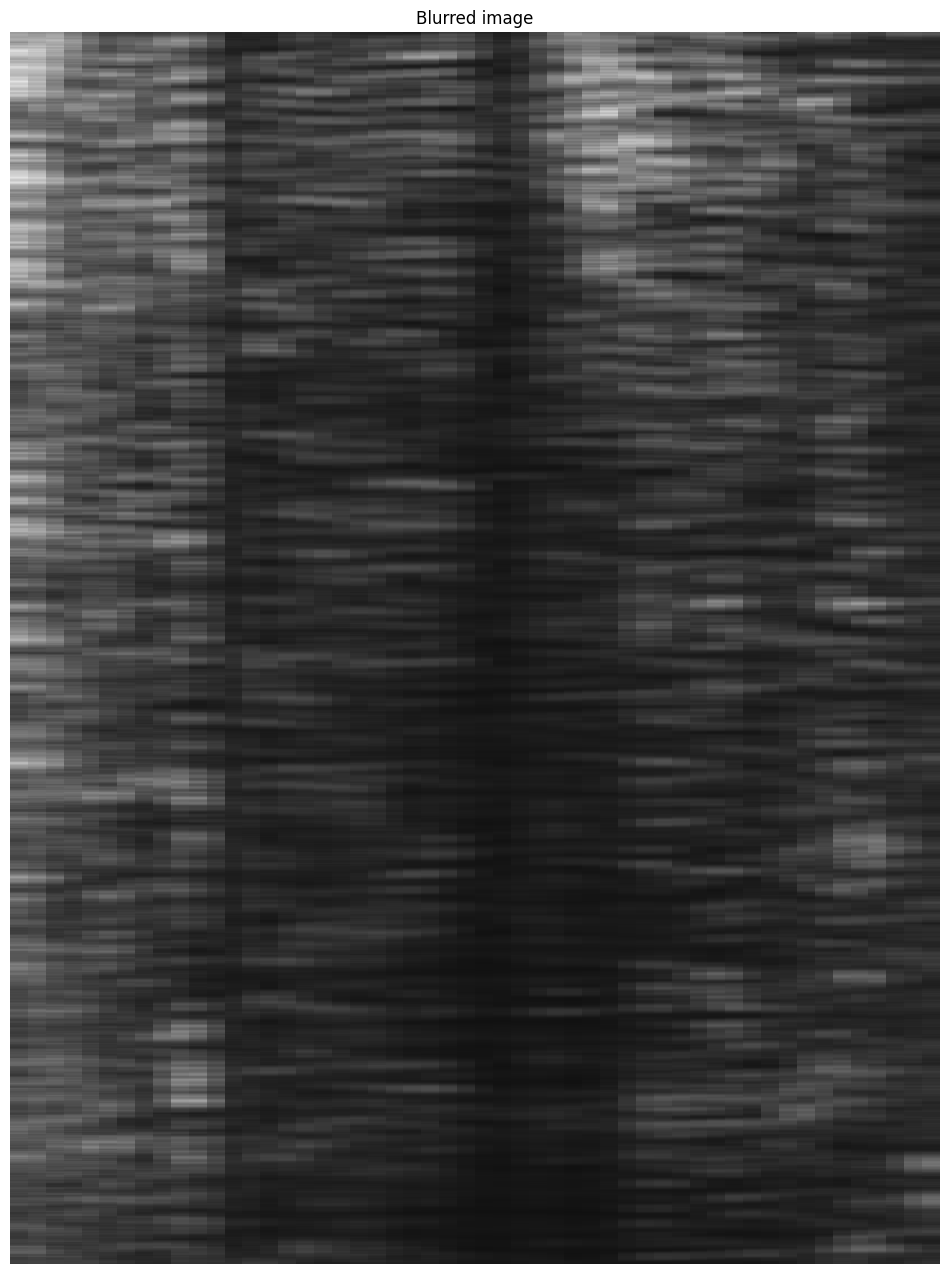

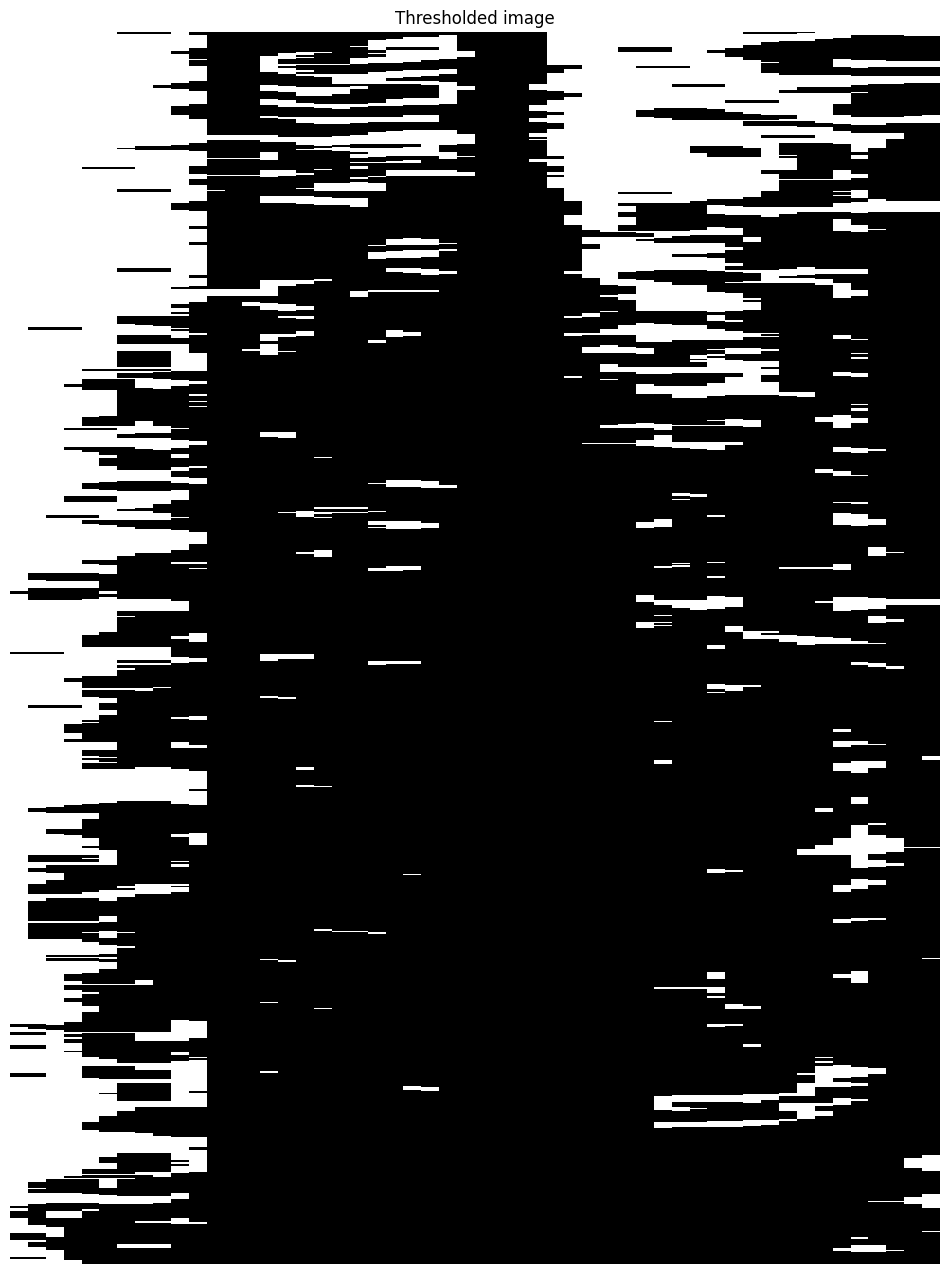

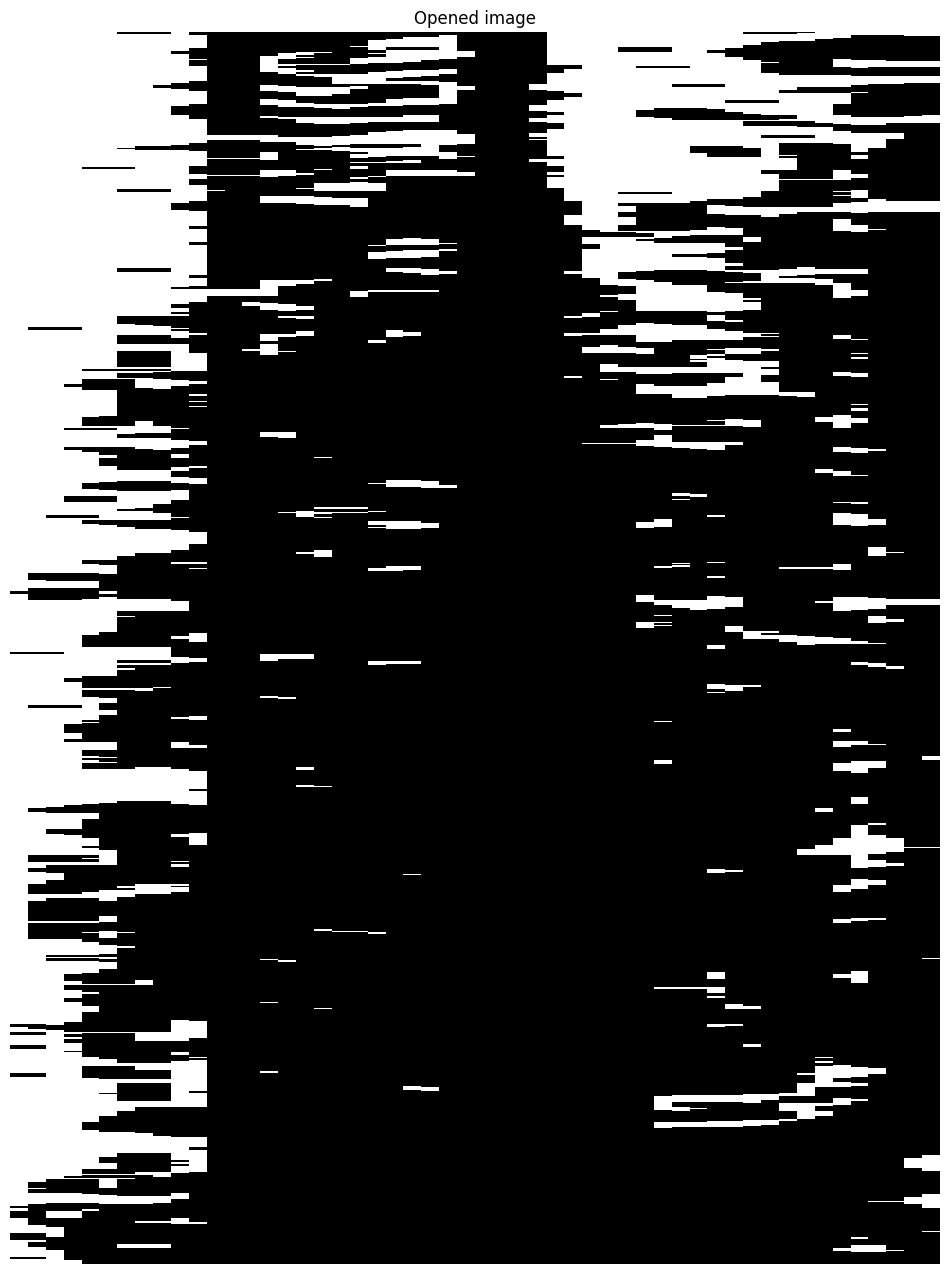

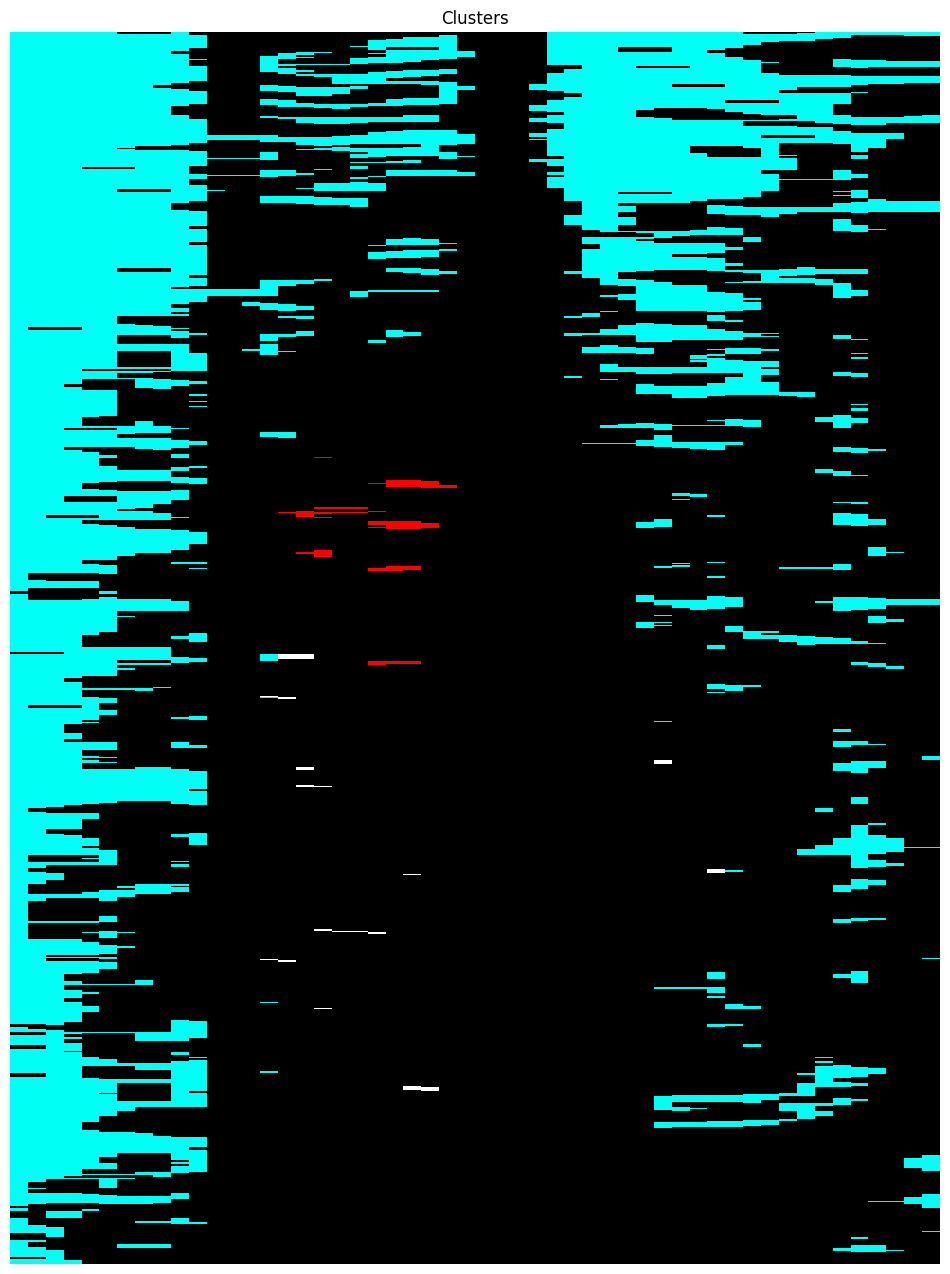

Discarded cluster 0 with R2=0.08252522020360908 (<0.5)
Discarded cluster 1 with R2=0.0031562405938296845 (<0.5)


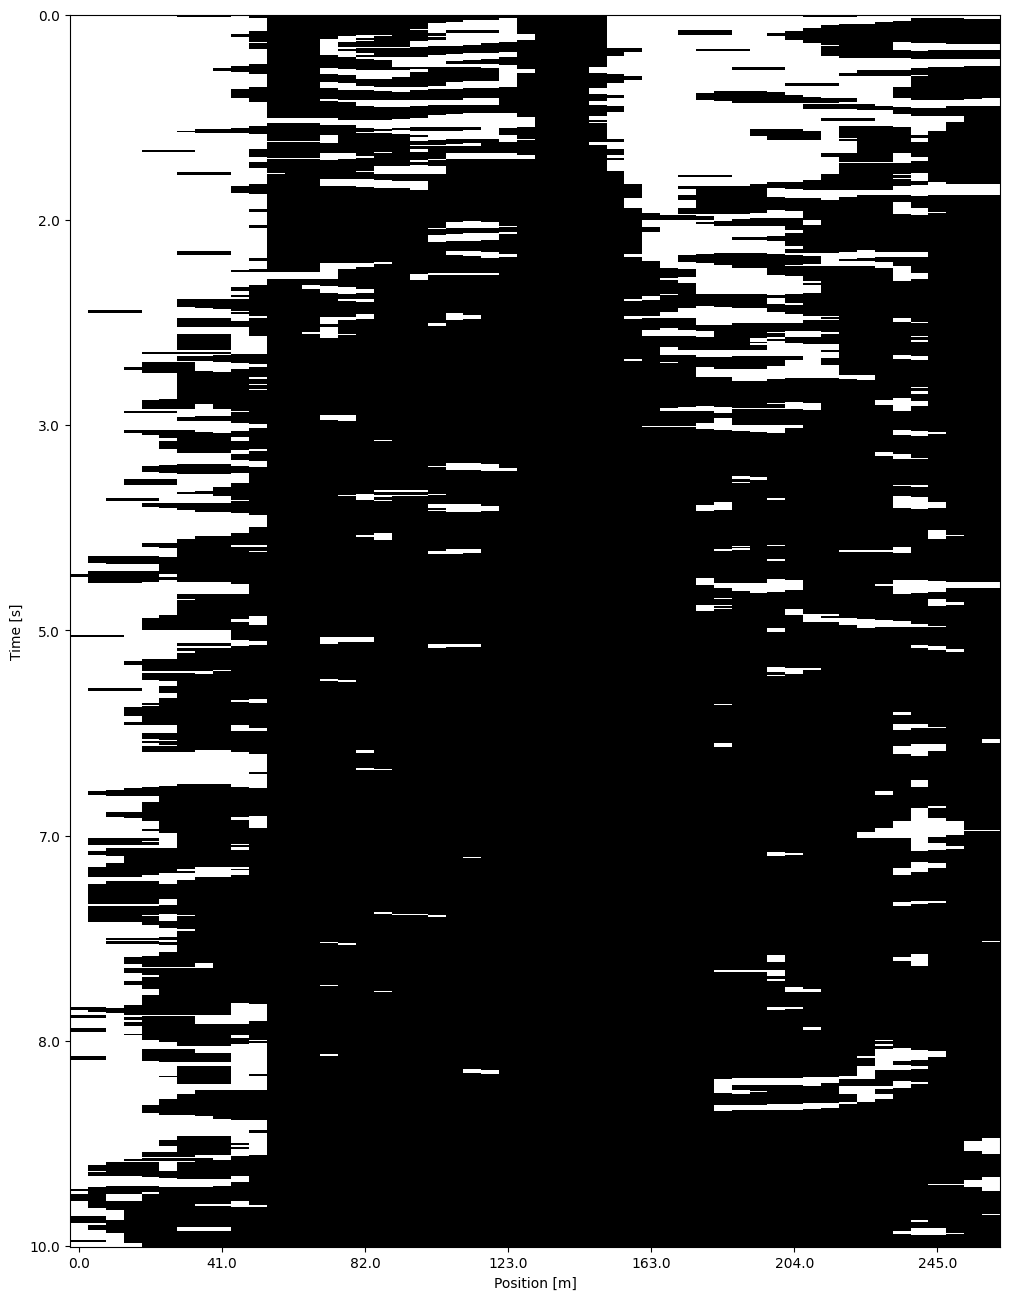

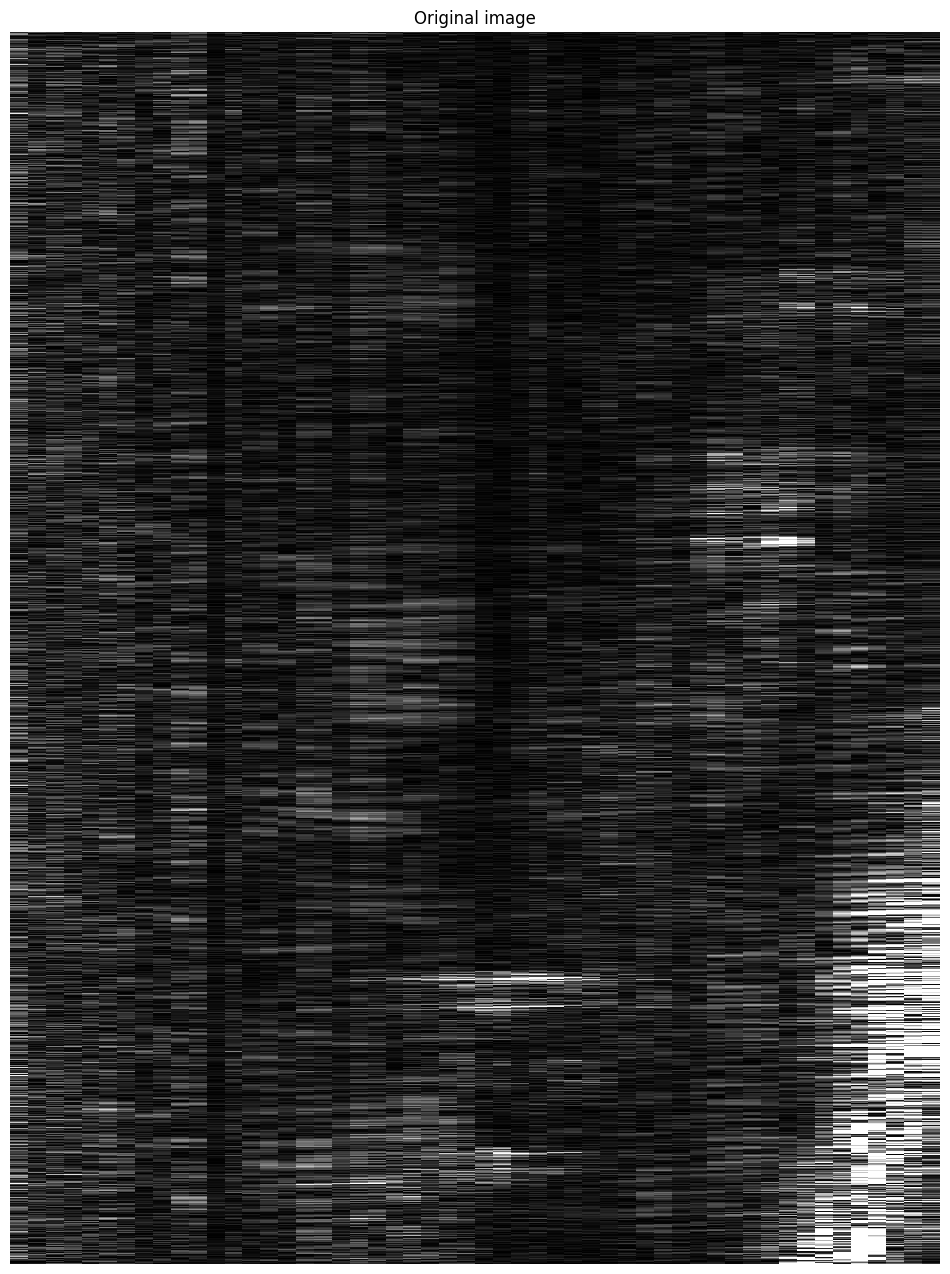

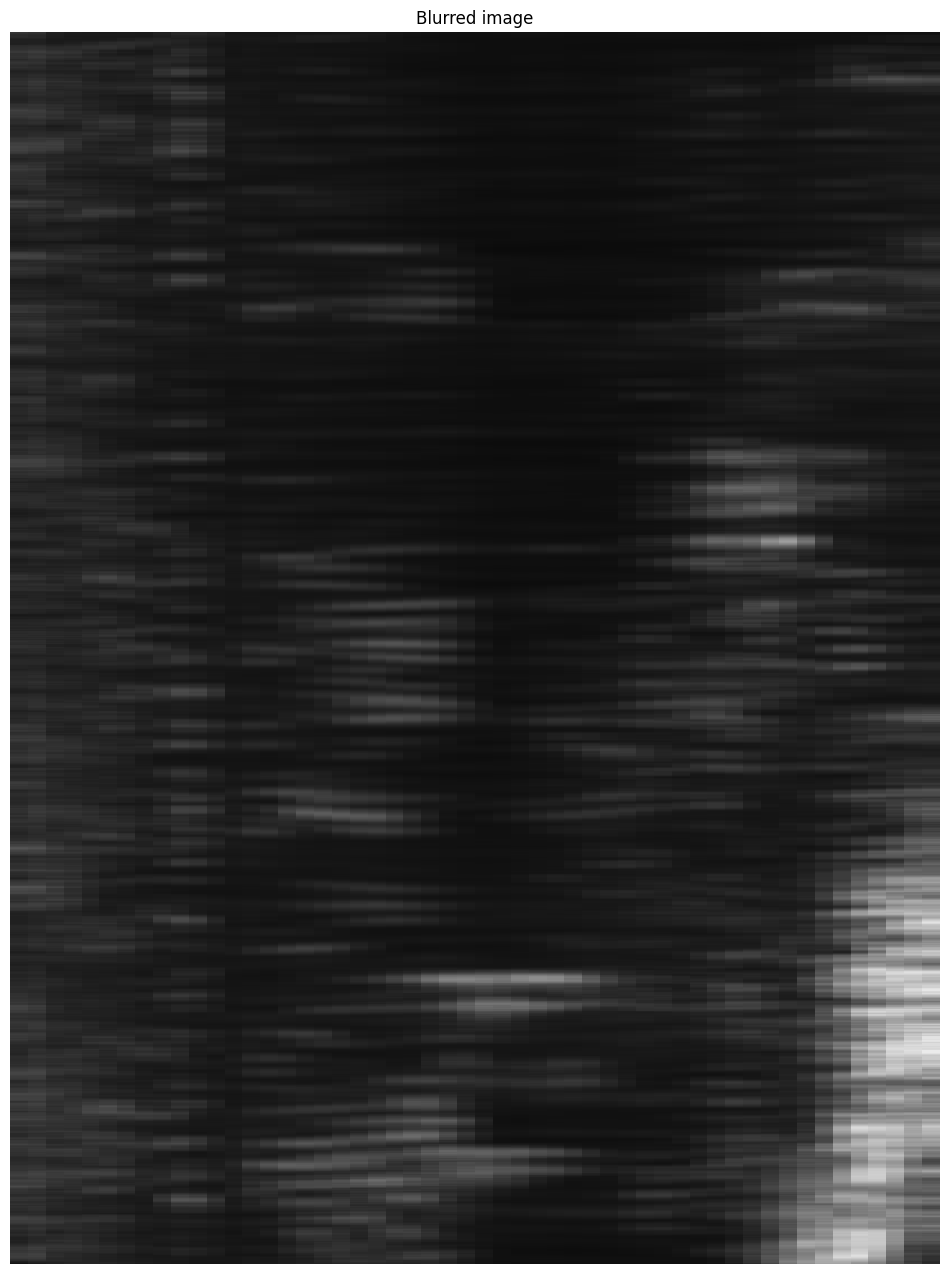

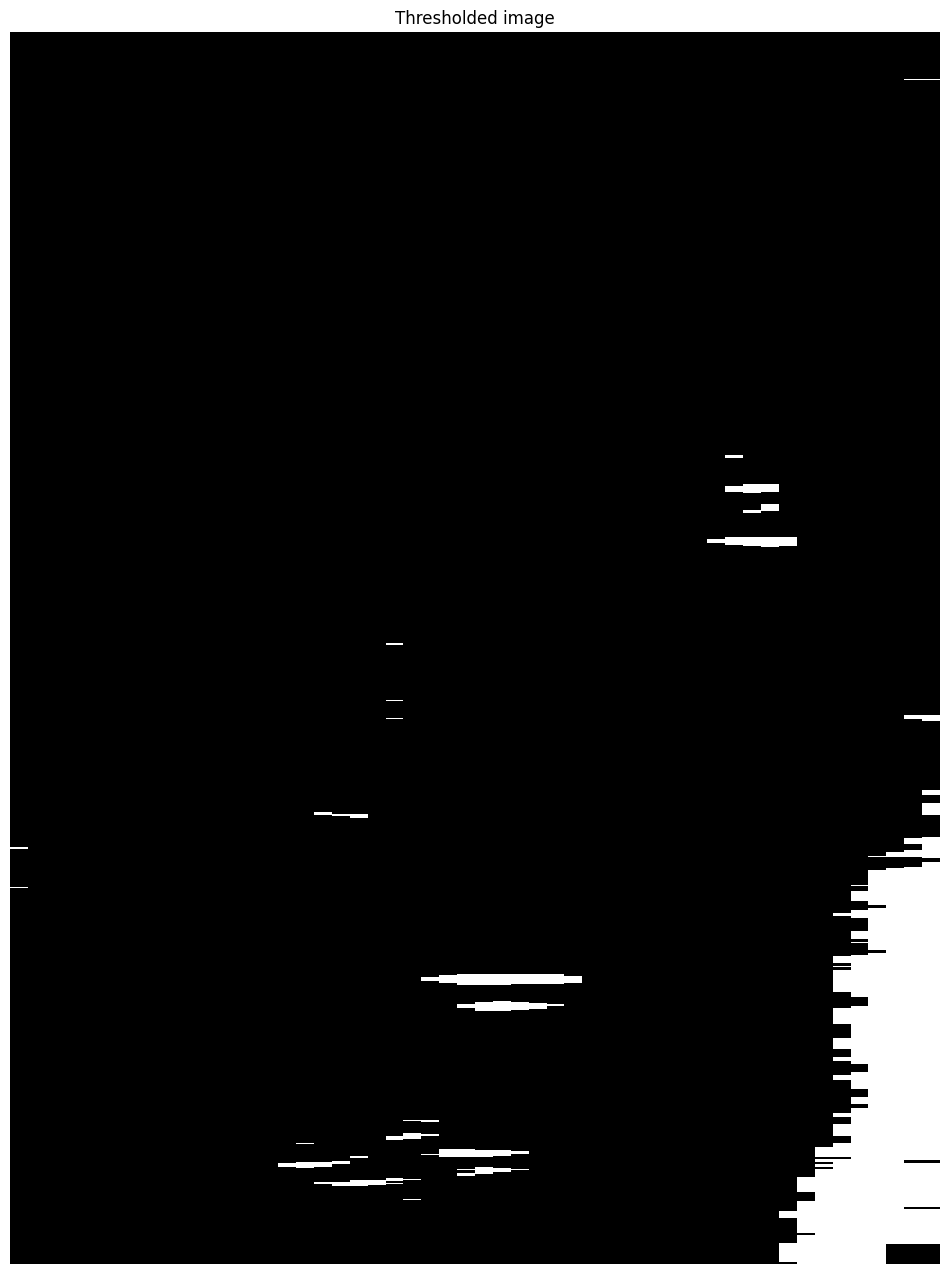

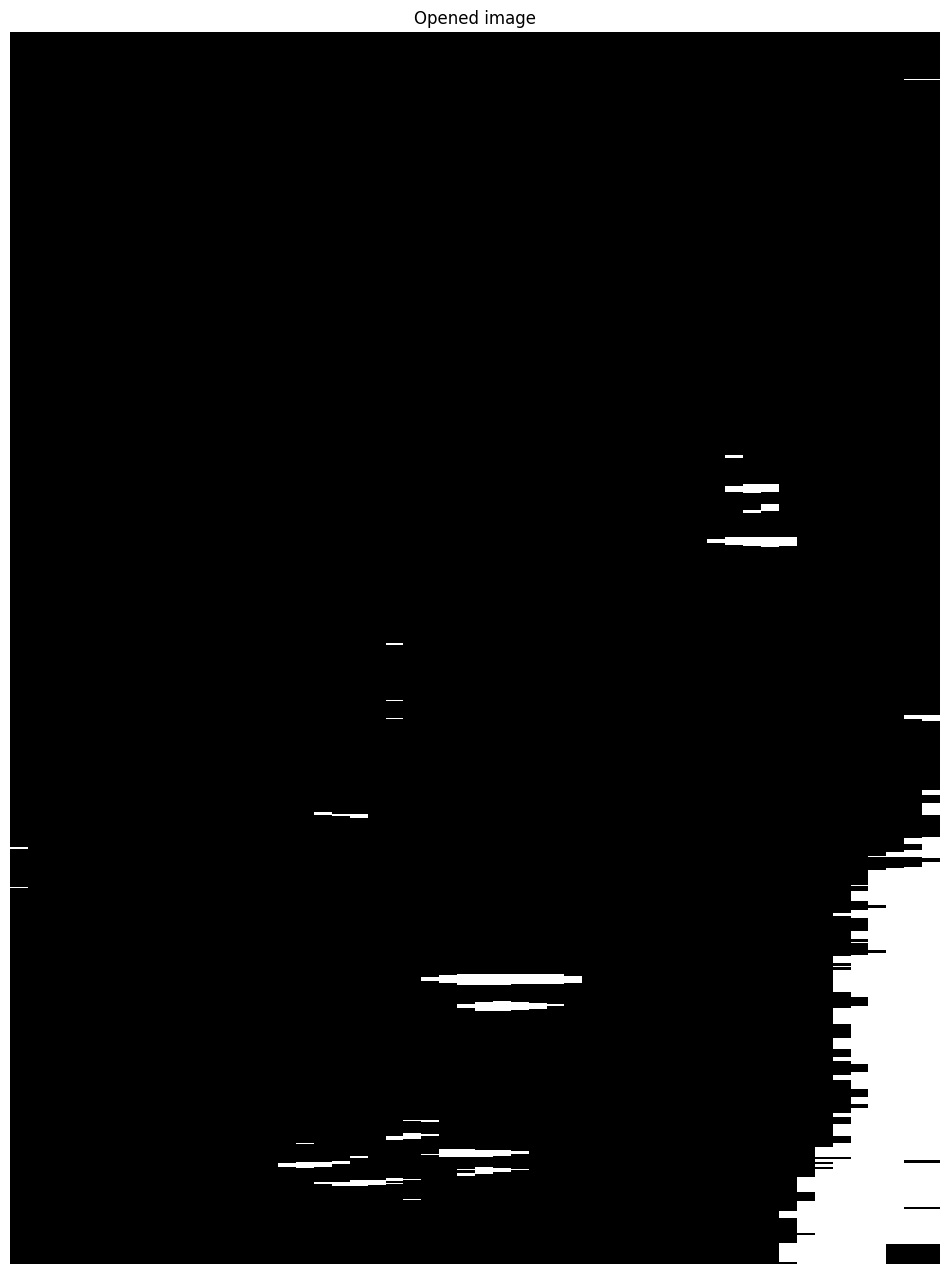

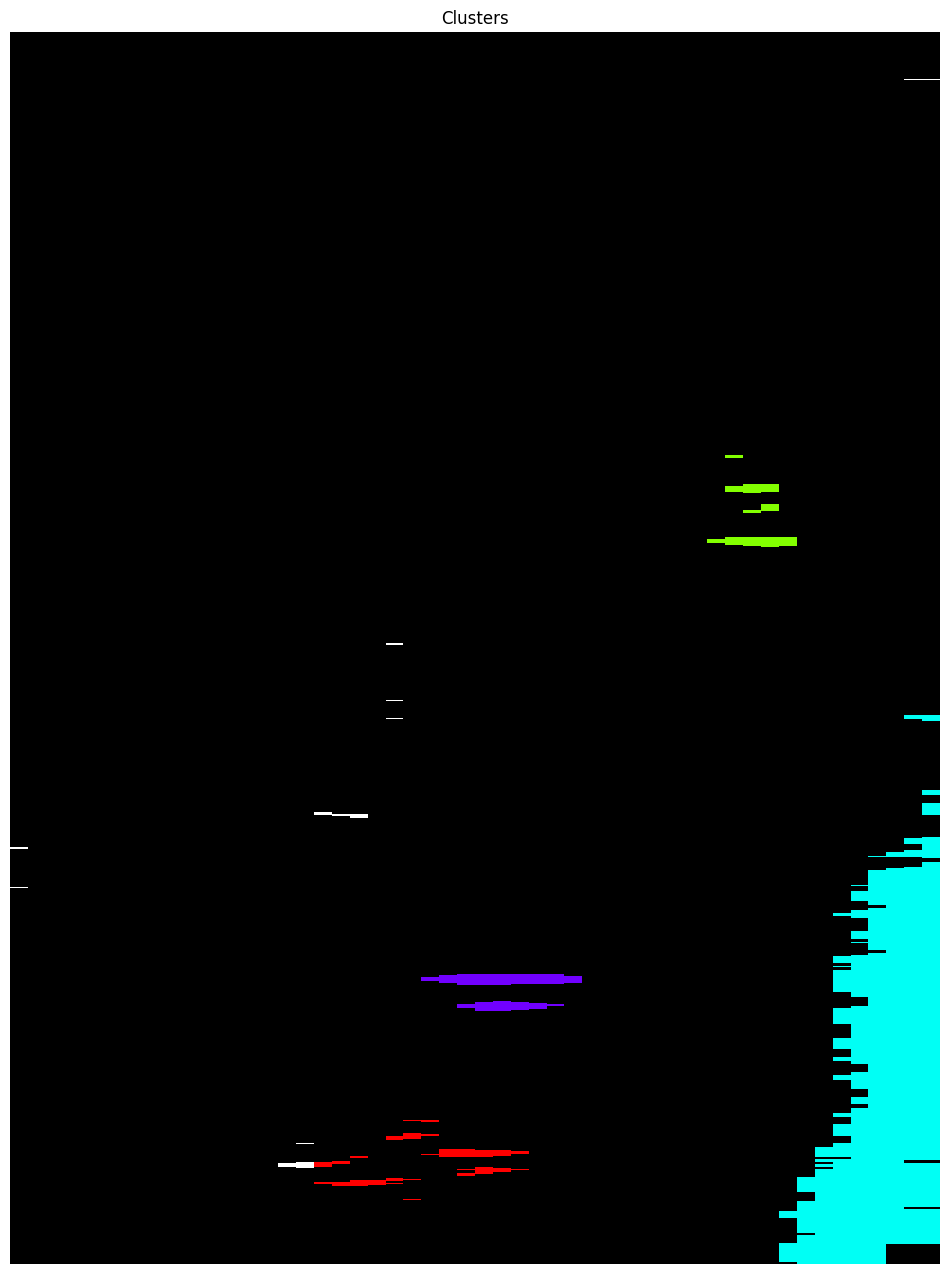

Discarded cluster 0 with R2=0.02324994293651972 (<0.5)
Discarded cluster 1 with R2=0.17680751192853117 (<0.5)
Discarded cluster 2 with R2=7.436075978306533e-07 (<0.5)
Discarded cluster 3 with R2=0.08647111758773074 (<0.5)


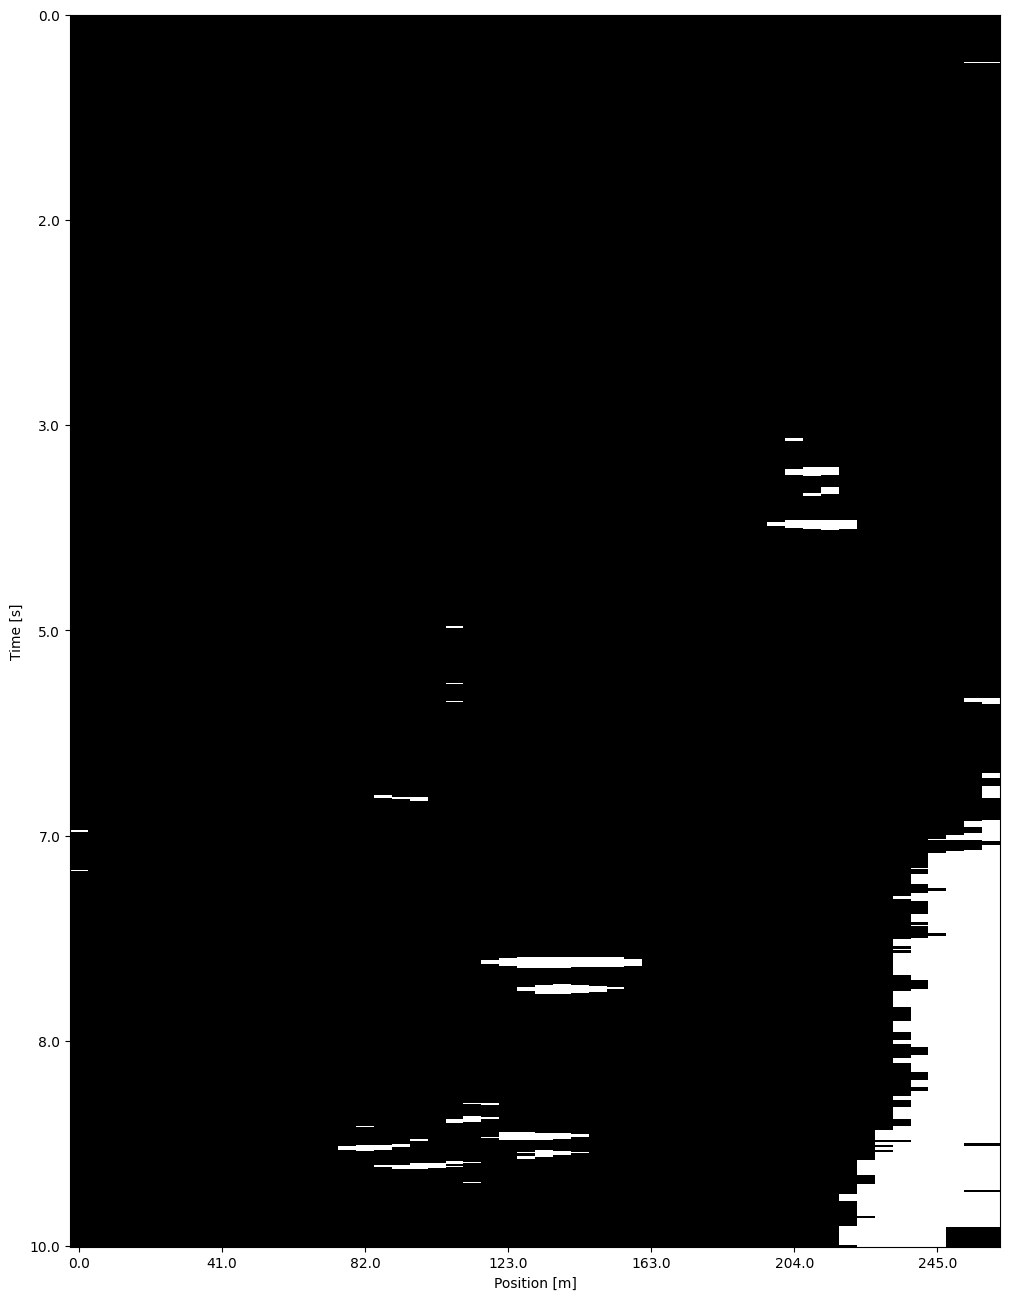

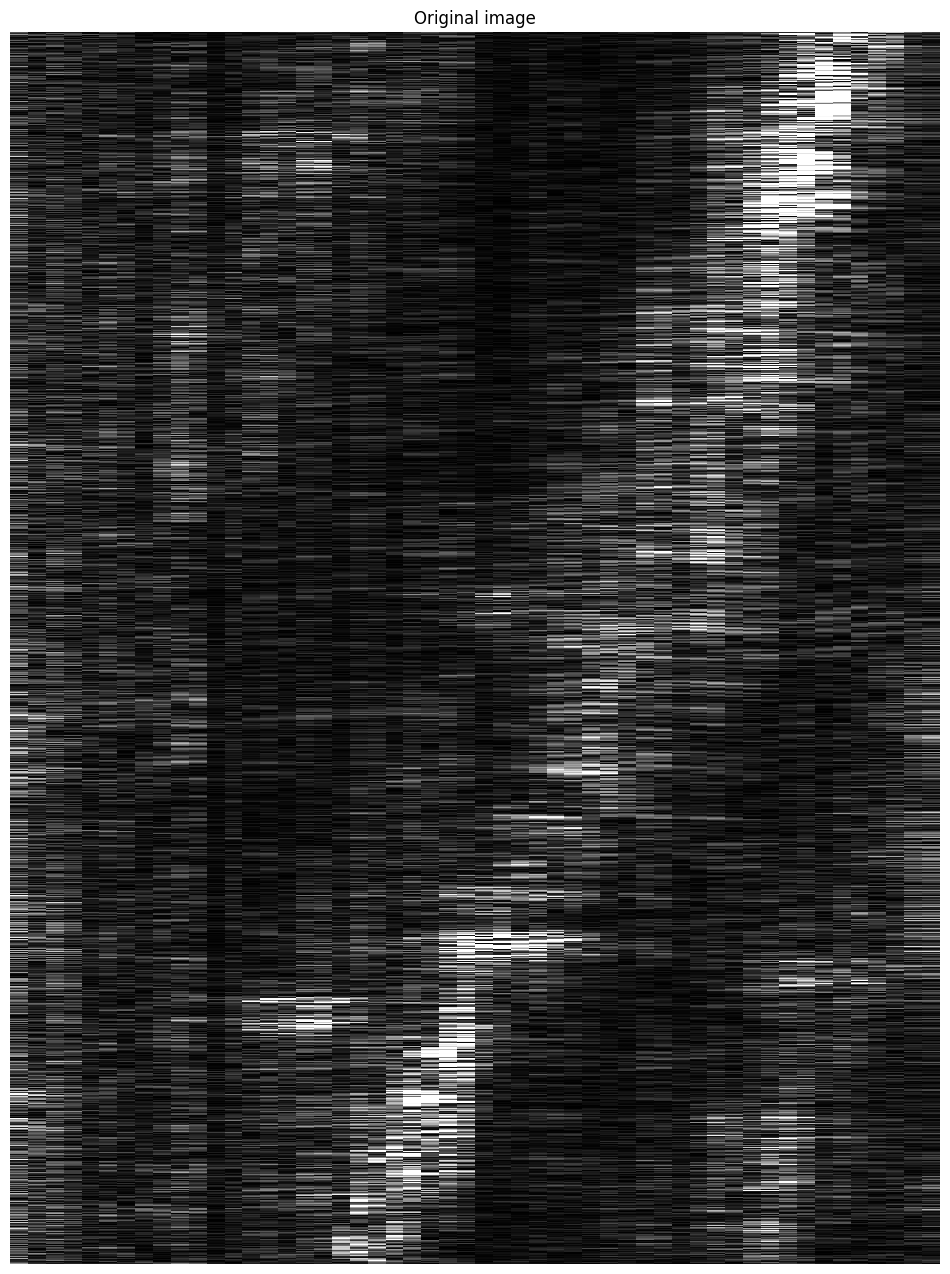

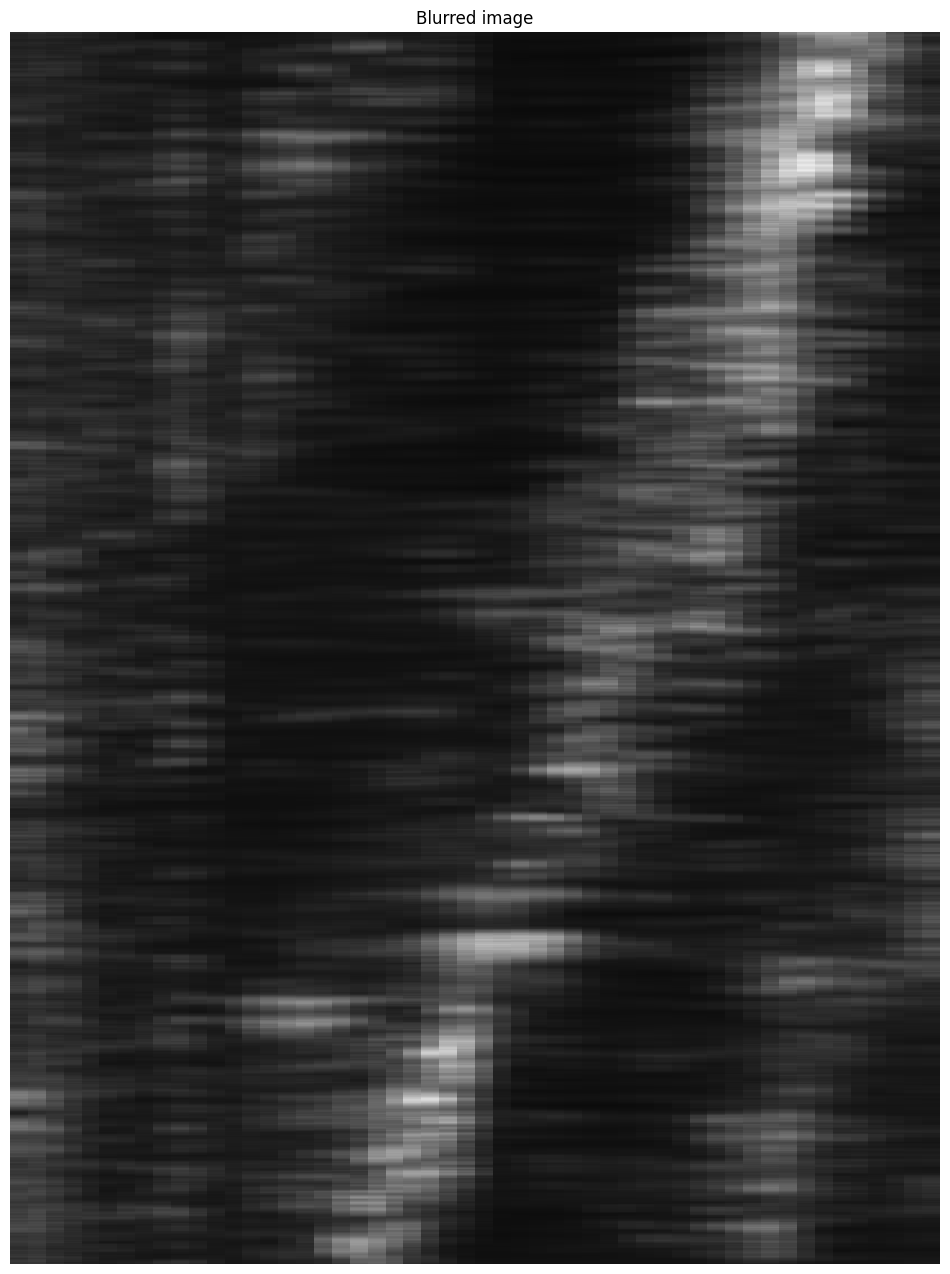

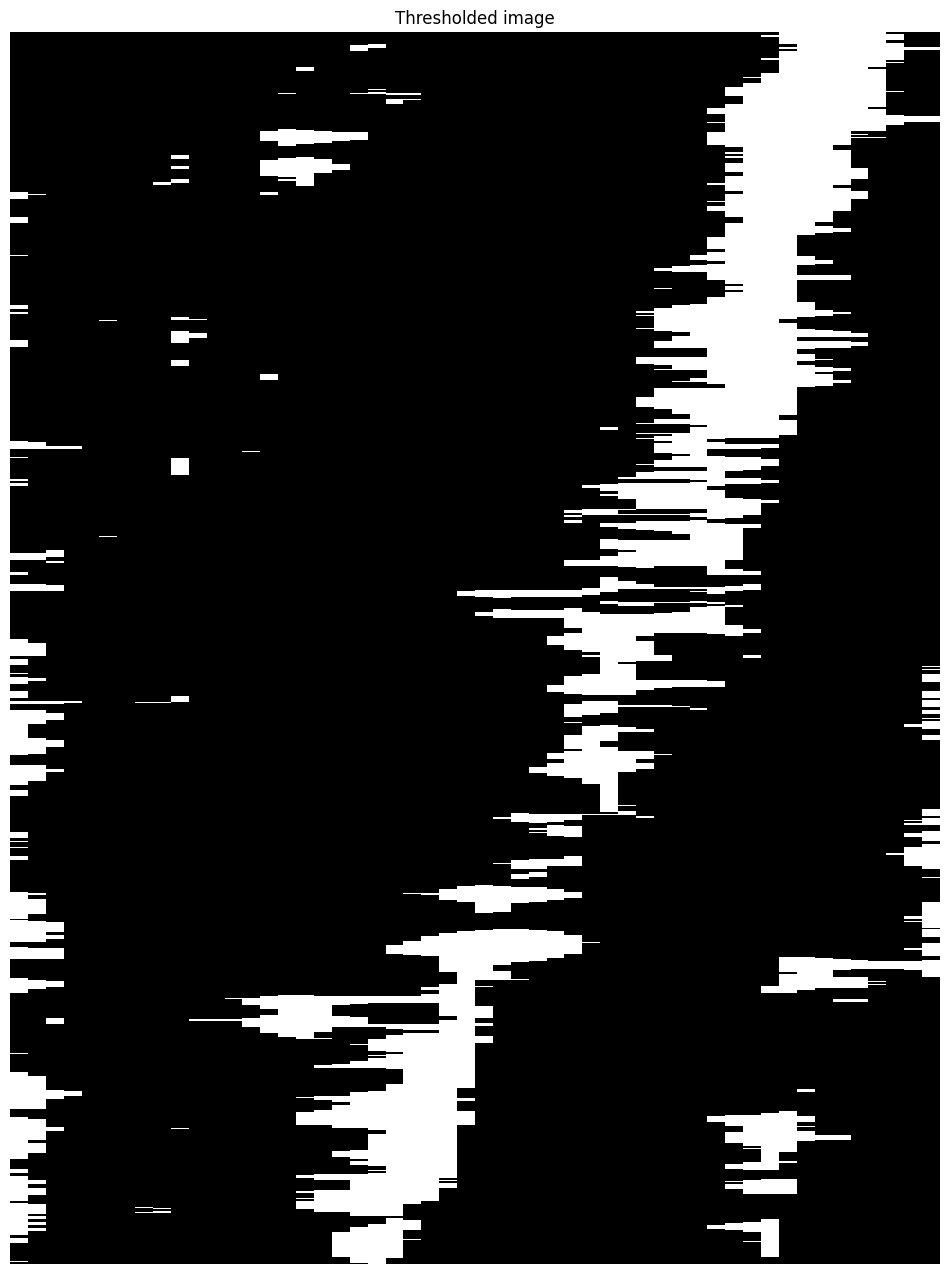

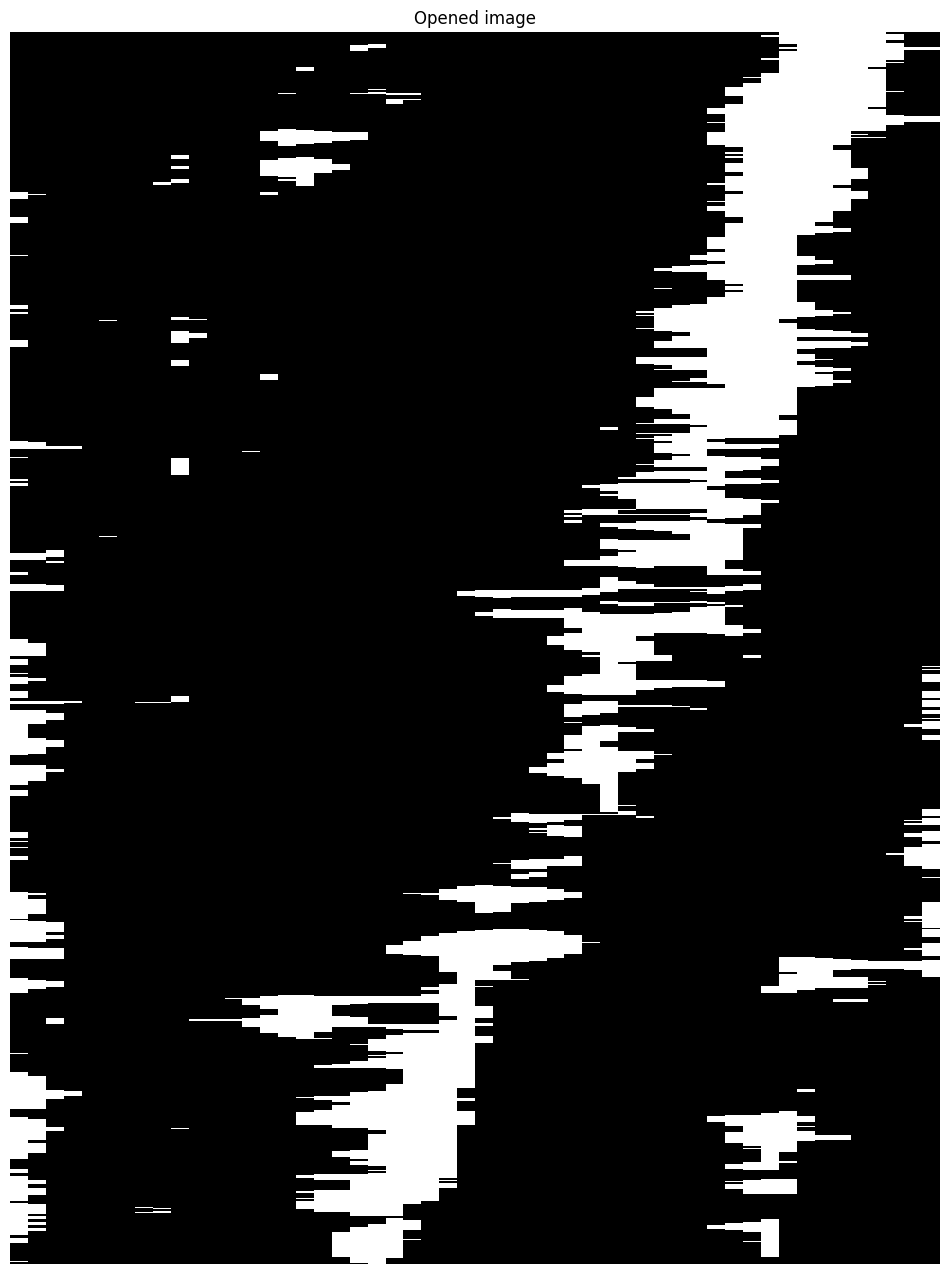

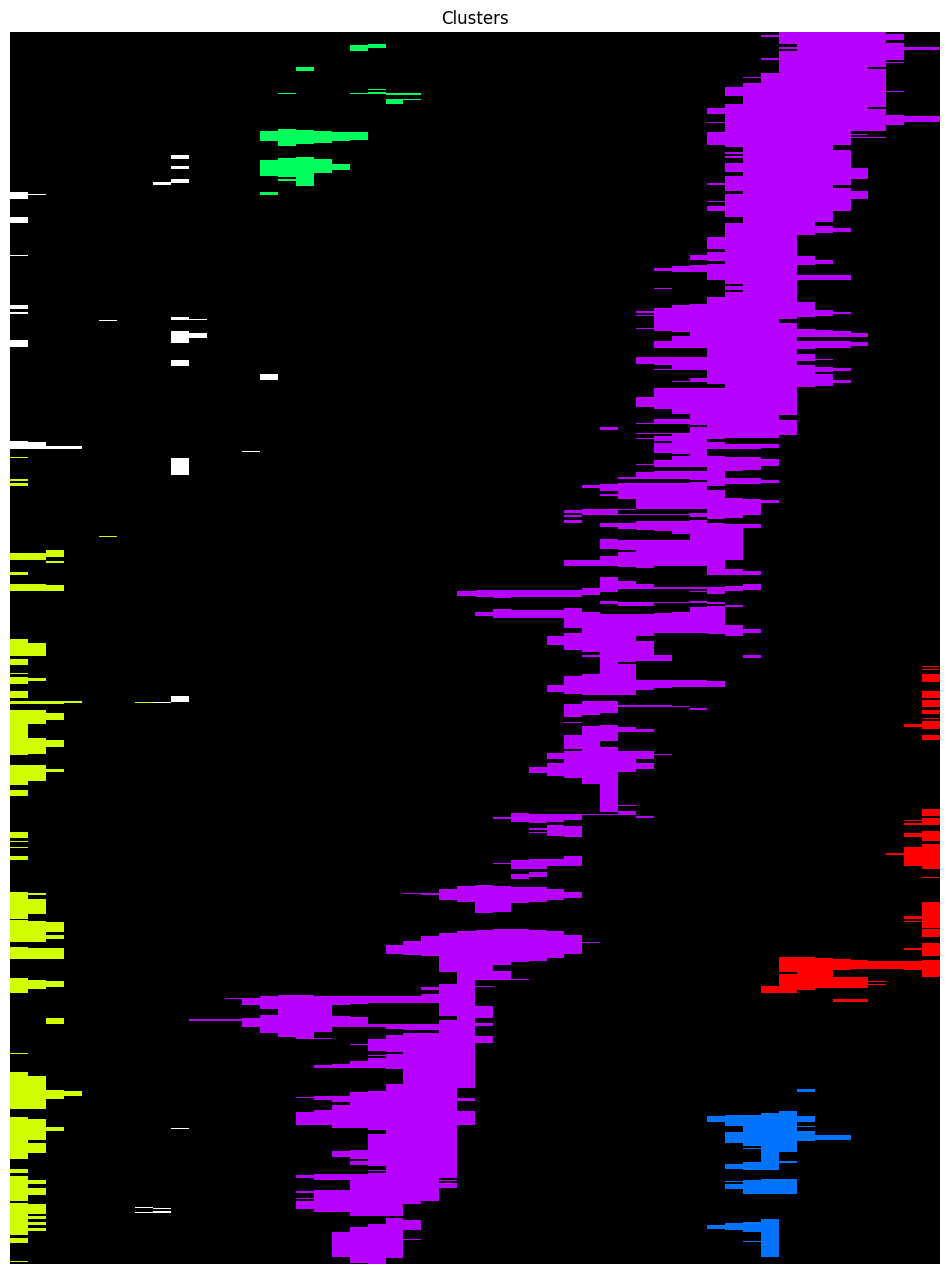

Detected velocity: 16.59 m/s (59.72 km/h)

Discarded cluster 1 with R2=0.3727113307480935 (<0.5)
Discarded cluster 2 with R2=0.0077392014169482826 (<0.5)
Discarded cluster 3 with R2=0.3954894811759 (<0.5)
Discarded cluster 4 with R2=0.034604721969102914 (<0.5)


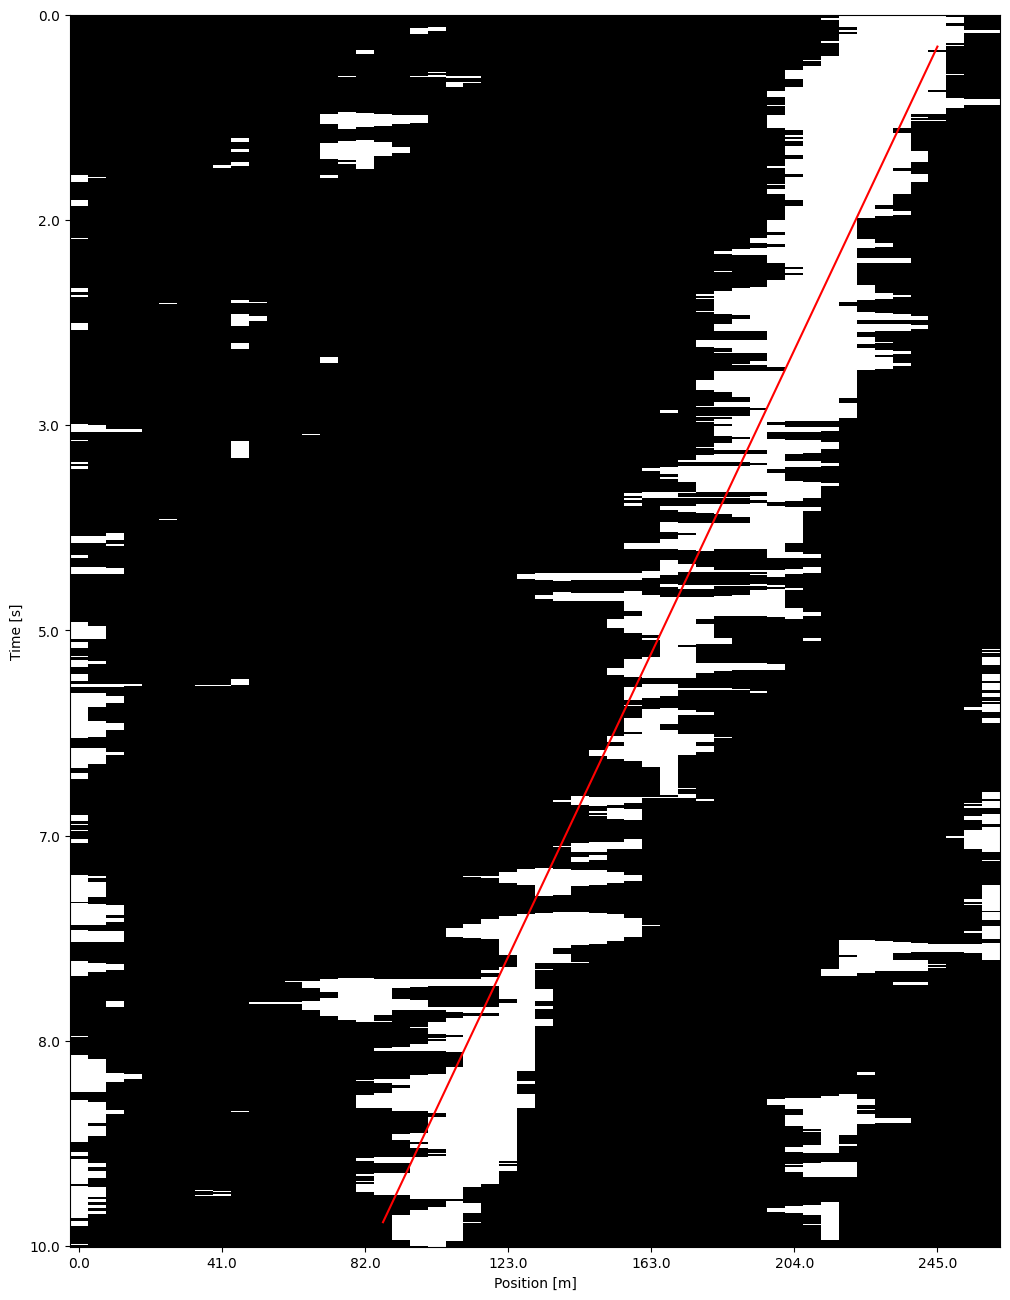

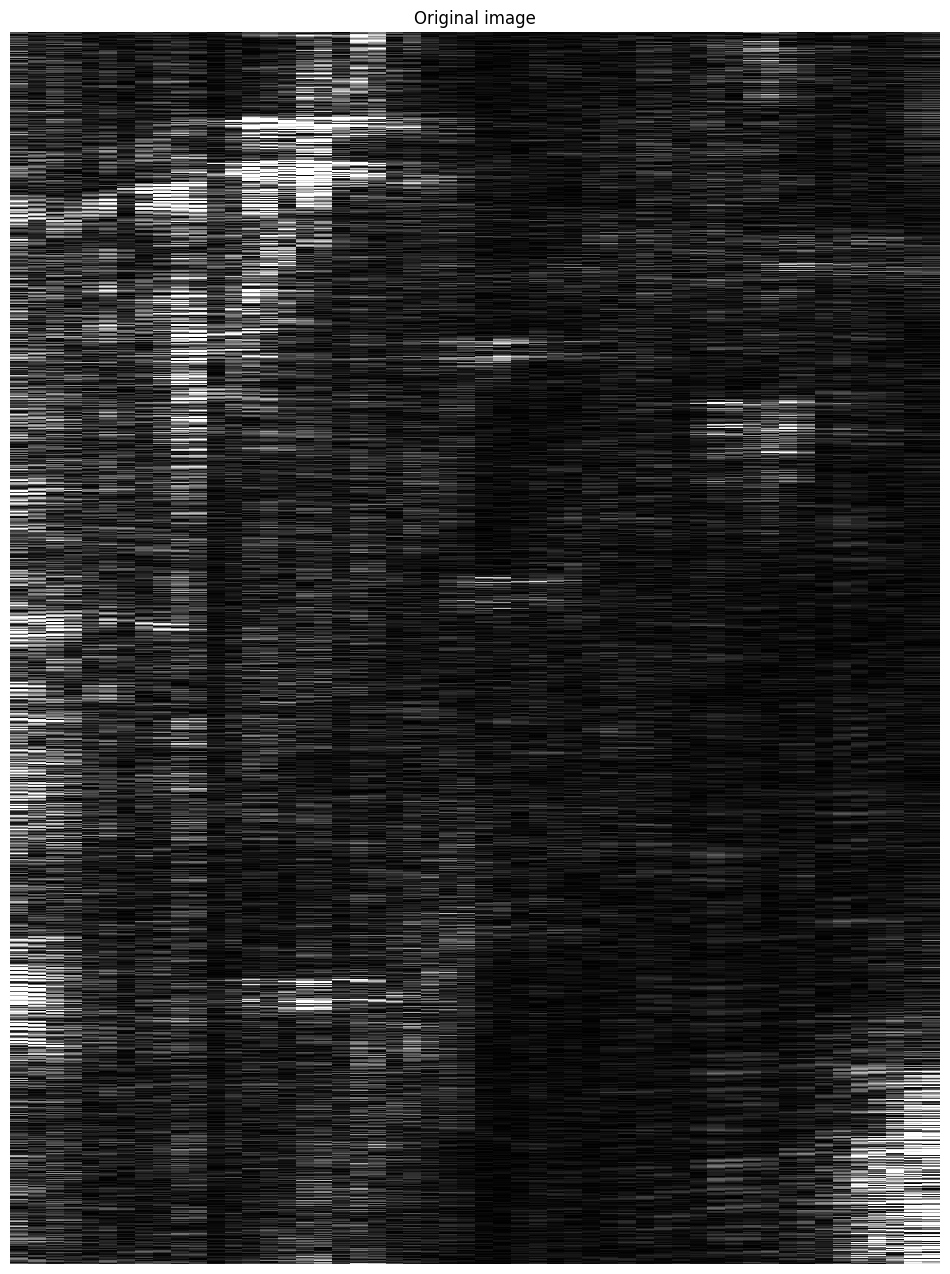

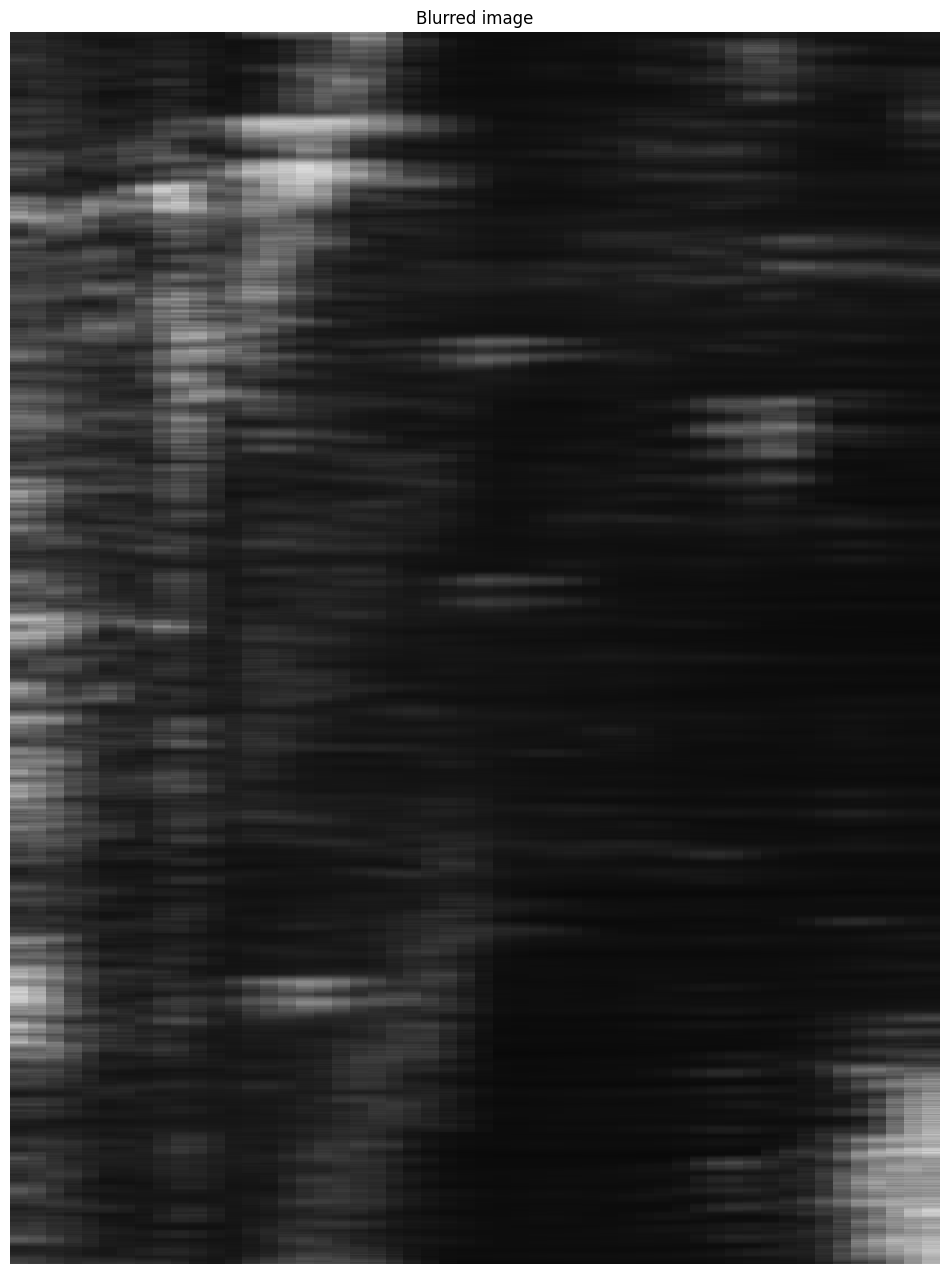

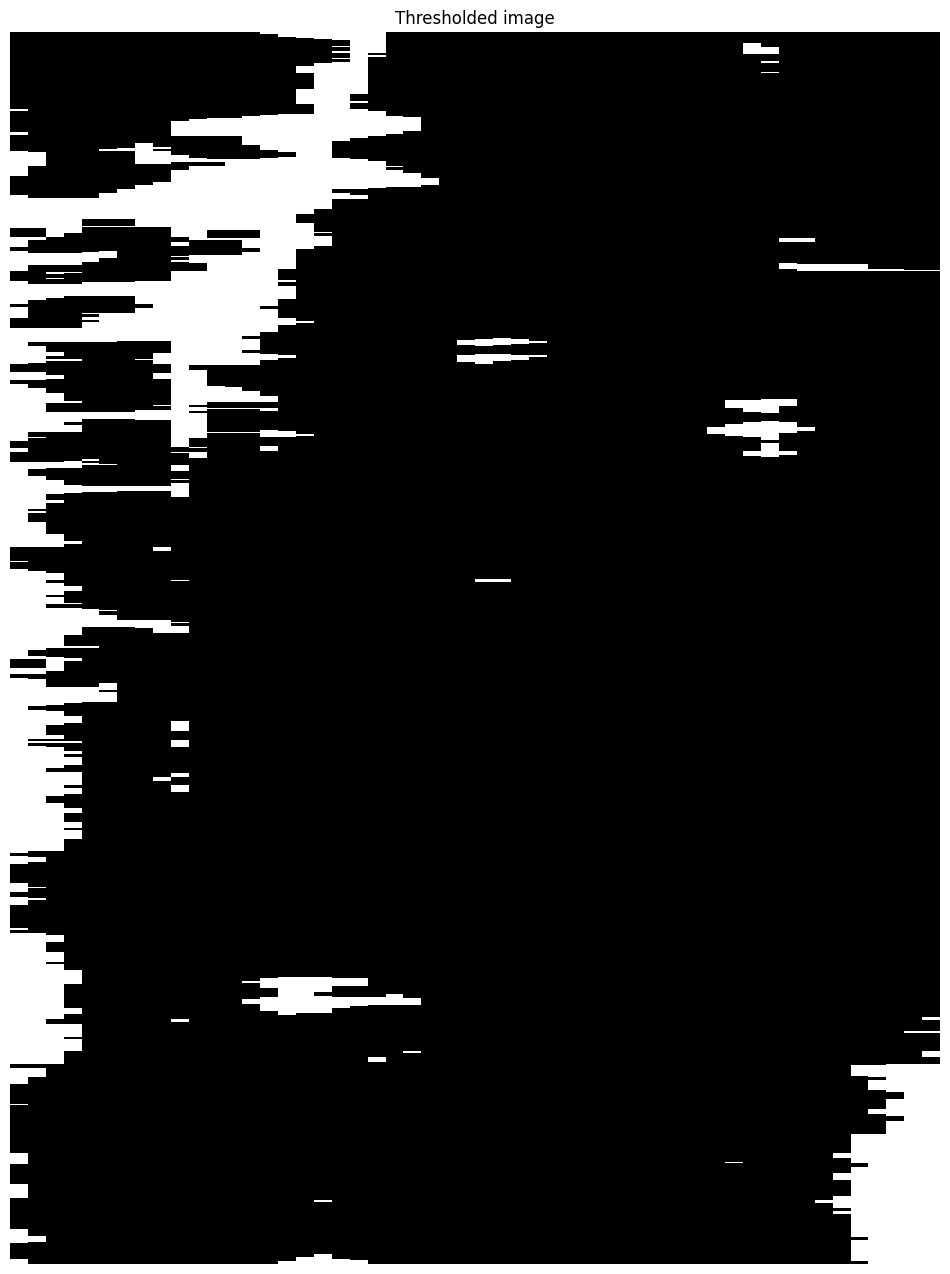

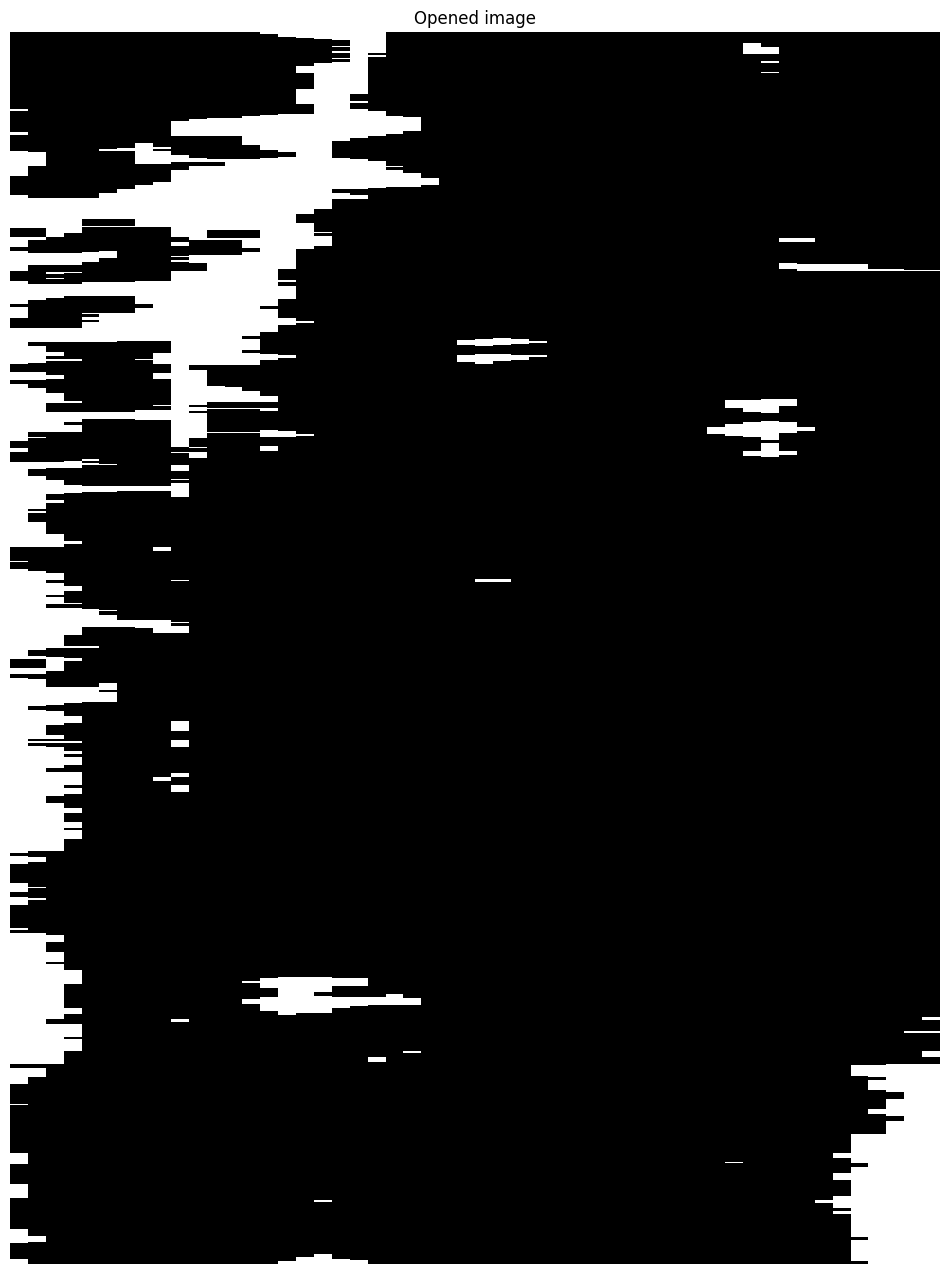

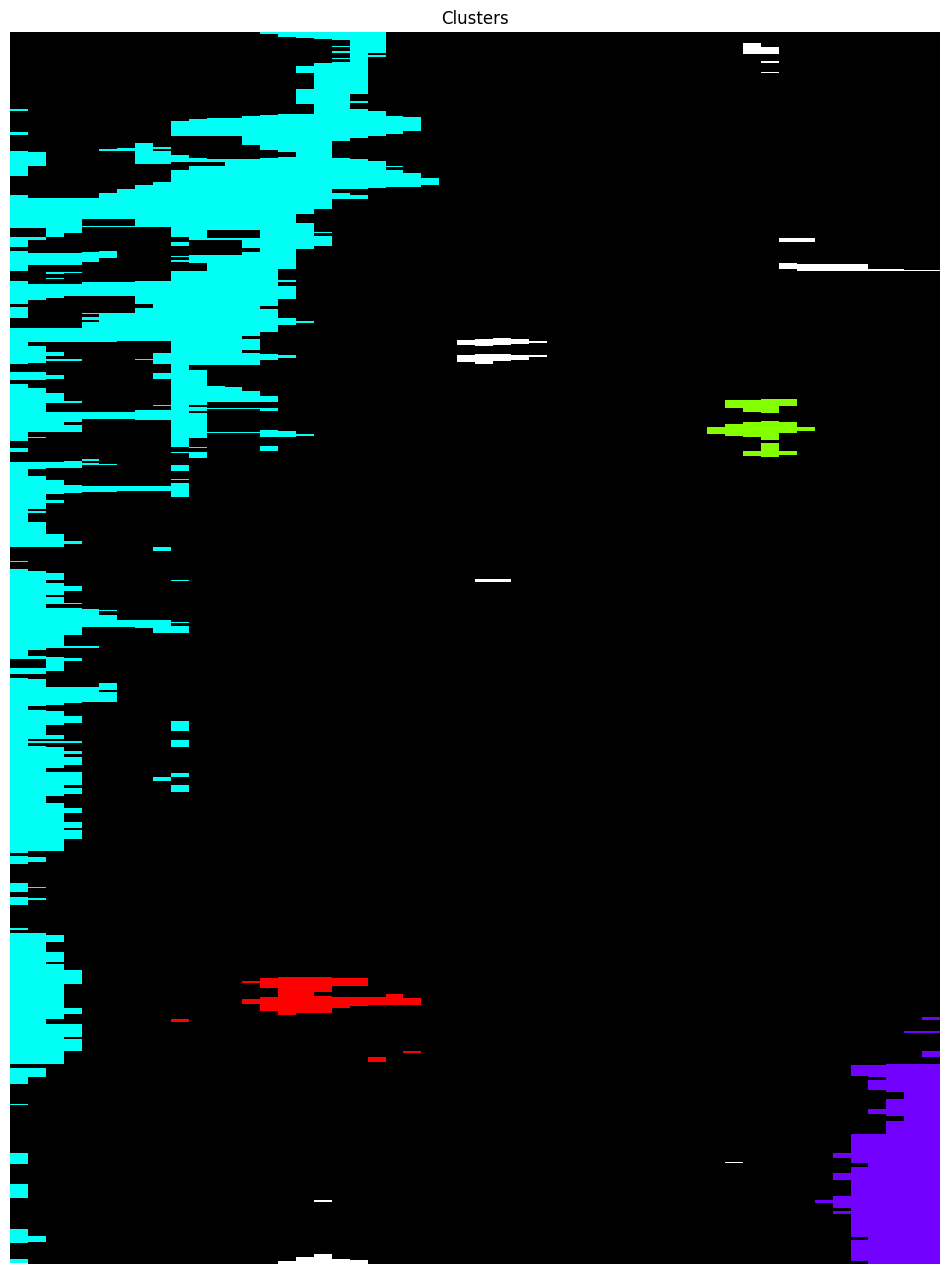

Discarded cluster 0 with R2=0.48443860288027574 (<0.5)
Discarded cluster 1 with R2=0.006729421690021775 (<0.5)
Discarded cluster 2 with R2=0.03677904221068251 (<0.5)
Discarded cluster 3 with R2=0.034174480086752945 (<0.5)


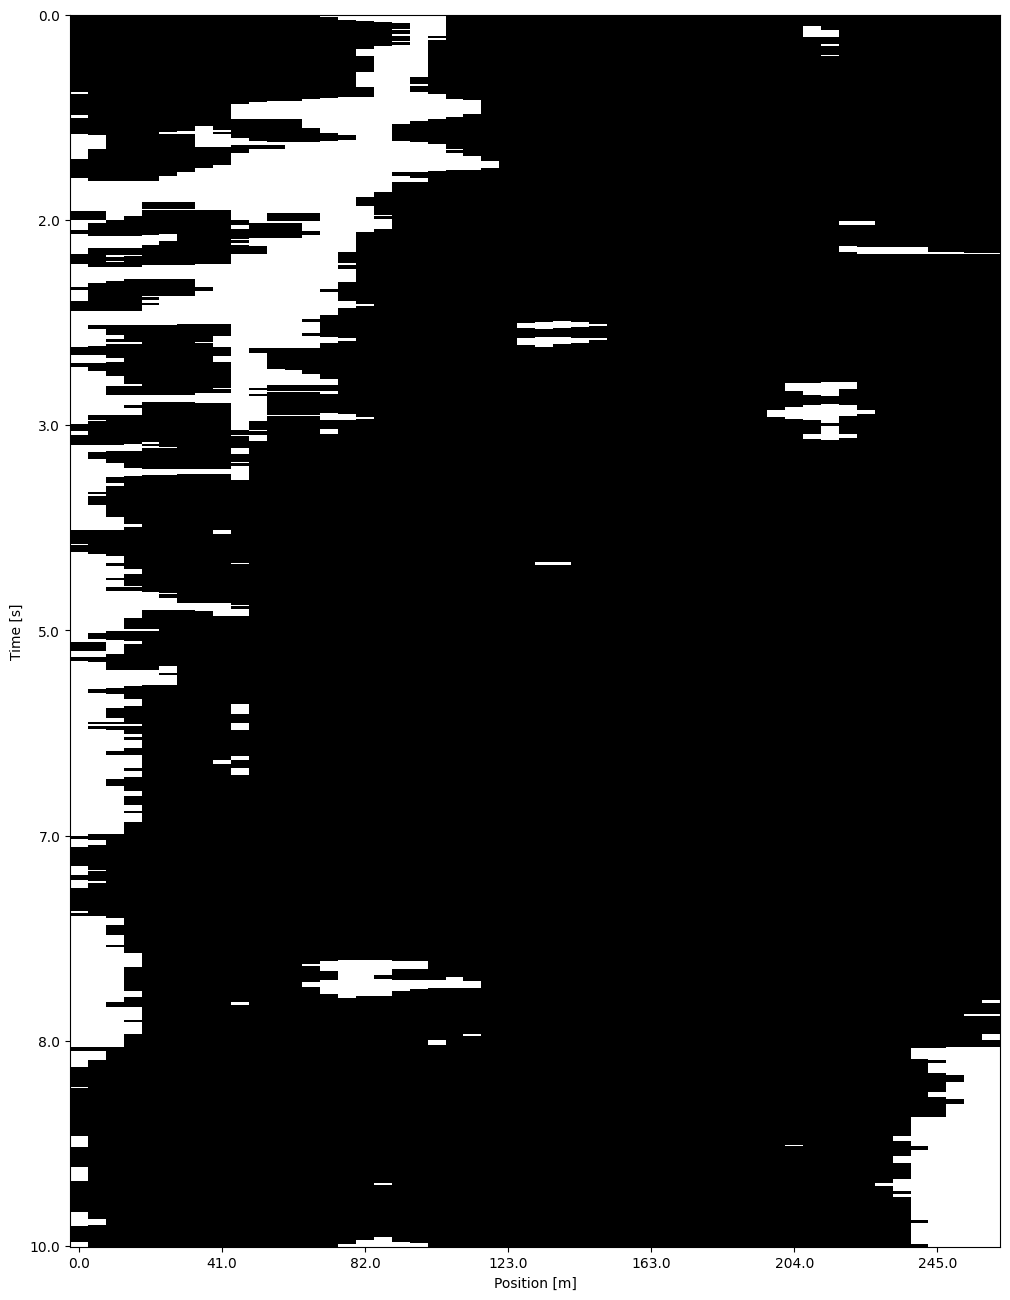

In [5]:
for data in load_all_files():
    detect_velocities(data)